In [1]:
import os
import pandas as pd
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
full_metabric_data = pd.read_csv("/kaggle/input/breast-cancer-gene-expression-profiles-metabric/METABRIC_RNA_Mutation.csv", low_memory=False)

# Eliminar datos de mutación
metabric_data = full_metabric_data.iloc[:, :520]


# Imprimir nombres de las columnas
num_col = metabric_data.shape[1]
print("Number of Columns:", num_col)

# Obtener el número de filas
num_rows = metabric_data.shape[0]
print("Number of Rows:", num_rows)


Number of Columns: 520
Number of Rows: 1904


In [2]:
# Mostrar las primeras 10 filas de las primeras 31 columnas
metabric_data.head(10)

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,-0.3910,0.0395,0.8191,0.1977,-0.2302,-0.5092,-0.3021,0.9357,-0.4217,0.5340
6,14,56.45,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,1,LumB,1.0,Positve,...,-1.3151,0.0917,1.6814,2.2495,-1.6522,-3.4775,-0.4892,1.1938,-0.1027,0.4331
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,-0.7775,-0.3588,2.4959,0.3744,-0.7101,-2.1453,-1.3027,-0.2308,-0.3450,-0.2023
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,-0.3917,-0.1405,-0.9780,-0.3030,-0.1640,1.0783,1.8263,-0.5965,0.1502,-0.8837
9,35,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Negative,...,-0.3020,-0.4788,3.6125,1.9925,0.2253,-0.8414,1.7093,-0.6921,0.6906,-0.8006


In [3]:
# Contar la cantidad de valores NaN o vacíos en cada columna
missing_values_count = metabric_data.isnull().sum()

# Filtrar las columnas con valores NaN o vacíos que no sean cero
non_zero_missing_values = missing_values_count[missing_values_count != 0]

# Imprimir los nombres de las columnas y la cantidad de valores NaN o vacíos que no sean cero
print("Column Name\t\tMissing Values Count")
for column_name, missing_count in non_zero_missing_values.items():
    print(f"{column_name}: {missing_count}")


Column Name		Missing Values Count
type_of_breast_surgery: 22
cancer_type_detailed: 15
cellularity: 54
er_status_measured_by_ihc: 30
neoplasm_histologic_grade: 72
tumor_other_histologic_subtype: 15
primary_tumor_laterality: 106
mutation_count: 45
oncotree_code: 15
3-gene_classifier_subtype: 204
tumor_size: 20
tumor_stage: 501
death_from_cancer: 1


In [4]:
# Imprimir el tipo de dato de las primeras 31 columnas que corresponden a datos clinicos
data_types = metabric_data.iloc[:, :31].dtypes
print("Data Types of the First 31 Columns:")
print(data_types)

Data Types of the First 31 Columns:
patient_id                          int64
age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type                        object
cancer_type_detailed               object
cellularity                        object
chemotherapy                        int64
pam50_+_claudin-low_subtype        object
cohort                            float64
er_status_measured_by_ihc          object
er_status                          object
neoplasm_histologic_grade         float64
her2_status_measured_by_snp6       object
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                     int64
inferred_menopausal_state          object
integrative_cluster                object
primary_tumor_laterality           object
lymph_nodes_examined_positive     float64
mutation_count                    float64
nottingham_prognostic_index       float64
oncotree_code                      objec

**A continuación se analiza cada variable en detalle:**

#### Defino funciones

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

def create_histogram(data, bins=20, title='Histogram',percentage_font_size=10, ax=None):
    """
    Create a histogram from a list of data.

    Parameters:
    data (list): List of numerical data.
    bins (int): Number of bins for the histogram.
    title (str): Title of the histogram.
    ax (matplotlib.axes.Axes): Axis object to draw the histogram.

    Returns:
    None
    """
    data_int = data.round(2).astype(int)  # Redondea y convierte a entero
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    n, bins, patches = ax.hist(data_int, bins=bins, edgecolor='black', color='thistle')  # Utiliza un bin por cada valor único
    
    # Calcula los porcentajes para cada bin
    bin_centers = 0.5 * np.diff(bins) + bins[:-1]
    bin_values = n / sum(n) * 100
    
    # Agrega los porcentajes encima de las barras solo si es mayor que 0.5
    for percentage, x, patch in zip(bin_values, bin_centers, patches):
        if percentage > 0.5:
            ax.text(x, patch.get_height() + 0.01, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=percentage_font_size)
    
    ax.set_title(title, fontsize=15)  
    ax.set_xlabel('Value', fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    
    
def summary_statistics(data, ax):
    """
    Calculate summary statistics for a numerical variable.

    Parameters:
    data (pandas.Series): Numerical data.
    ax (matplotlib.axes.Axes): Axis object to draw the summary.

    Returns:
    None
    """
    summary = data.describe().round(2)
    ax.axis('off')
    ax.text(0.5, 0.5, f'Resumen:\n{summary}', ha='center', va='center', fontsize=15)


def normalize_with_zscore(data):
    """
    Normalize data using Z-score.

    Parameters:
    data (pandas.Series): Numerical data.

    Returns:
    pandas.Series: Normalized data.
    """
    normalized_data = zscore(data.to_numpy())  # Convertir la Serie a un array de NumPy
    return pd.Series(normalized_data, index=data.index)



def category_summary(data):
    """
    Create a summary table for a categorical variable.

    Parameters:
    data (pandas.DataFrame): DataFrame containing the categorical variable.
    col (str): Name of the categorical variable column.

    Returns:
    pandas.DataFrame: Summary table with categories, counts, and percentages.
    """
    # Contar la frecuencia de cada categoría
    category_counts = data.value_counts(dropna=False)
    
    # Calcular el porcentaje de cada categoría respecto al total
    category_percentages = (category_counts / len(data)) * 100
    
    # Crear un DataFrame con las categorías, conteos y porcentajes
    summary_df = pd.DataFrame({'Category': category_counts.index, 
                               'Count': category_counts.values,
                               'Percentage': category_percentages.values.round(2)})
    
    return summary_df

    
def plot_category_bar(data, percentage_font_size=12):
    """
    Create a bar plot for a categorical variable showing percentages.

    Parameters:
    data (pandas.DataFrame): DataFrame containing the categorical variable.

    Returns:
    None
    """
    # Obtener el resumen de la categoría
    category_summary_table = category_summary(data)
    
    # Eliminar la fila correspondiente a los valores nulos o NaN, si existe
    category_summary_table = category_summary_table[category_summary_table['Category'].notna()]
    
    # Convertir los valores numéricos a cadenas de texto
    category_summary_table['Category'] = category_summary_table['Category'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) else str(x))
       
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(category_summary_table)), category_summary_table['Percentage'], color='lightsteelblue', edgecolor='black')
    
    # Agregar los porcentajes encima de las barras si superan el umbral
    for bar, percentage in zip(bars, category_summary_table['Percentage']):
        height = bar.get_height()
        if percentage > 2:
            plt.text(bar.get_x() + bar.get_width()/2, height / 2, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=percentage_font_size)
        else:
            plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=percentage_font_size)
    
    # Configurar etiquetas y título
    plt.ylabel('Percentage', fontsize=12)
    plt.title(f'Bar Plot of {data.name}', fontsize=15)
    
    # Configurar etiquetas del eje X
    x_labels = category_summary_table['Category']
    if len(x_labels) > 4:
        plt.xticks(range(len(category_summary_table)), x_labels, rotation=45, ha='right', fontsize=12)
    else:
        plt.xticks(range(len(category_summary_table)), x_labels, fontsize=12)
    
    plt.tight_layout()
    
    plt.show()


def impute_missing_proportionally(data):
    """
    Impute missing values proportionally based on the distribution of existing values.

    Parameters:
    data (pandas.Series): Series containing the variable/column with missing values.

    Returns:
    pandas.Series: Series with missing values imputed proportionally.
    """
    # Hacer una copia de los datos para evitar SettingWithCopyWarning
    data = data.copy()
    
    # Reemplazar valores vacíos con NA
    data.replace("", np.nan, inplace=True)
    
    # Calcular la proporción de frecuencia de cada subtipo conocido
    subtype_counts = data.value_counts()
    subtype_proportions = subtype_counts / subtype_counts.sum()
    
    # Imputar valores faltantes proporcionalmente
    missing_count = data.isna().sum()
    if missing_count > 0:
        missing_values = subtype_proportions.idxmax()
        if missing_count > 1:
            imputed_values = np.random.choice(subtype_proportions.index, size=missing_count, replace=True, p=subtype_proportions.values)
        else:
            imputed_values = [missing_values]
        data[data.isna()] = imputed_values
    
    return data


def one_hot_encode(data, dataframe):
    """
    Perform one-hot encoding for a categorical column in a DataFrame and replace the original column with dummy columns.

    Parameters:
    data (pandas.Series): Series containing the categorical variable.
    dataframe (pandas.DataFrame): DataFrame where the original column exists.

    Returns:
    pandas.DataFrame: DataFrame with dummy columns replacing the original categorical column.
    """
    # Convertir la serie en un DataFrame temporal con columnas dummy
    df_temp = pd.get_dummies(data, prefix=data.name)
    
    # Eliminar la columna original del DataFrame original
    dataframe.drop(columns=[data.name], inplace=True)
    
    # Unir el DataFrame temporal con el DataFrame original
    dataframe = pd.concat([dataframe, df_temp], axis=1)
    
    return dataframe

### Variables numéricas: 

In [6]:
metabrics_numeric_col = ("age_at_diagnosis", "lymph_nodes_examined_positive", "nottingham_prognostic_index",
                        "overall_survival_months", "mutation_count", "tumor_size", "tumor_stage")

#### 'age_at_diagnosis'

In [7]:
col = metabrics_numeric_col[0]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna age_at_diagnosis no contiene valores nulos ni NA.


Podemos ver que el valor medio de la edad de las pacientes presentes en este dataset es de aproximadamente 61 años.
La edad de la paciente más joven es de aproximadamente 22 años y la de la mayor 96.
Si observamos el histograma se ve claramente que la concentración de las pacientes se encuentra entre los 50 y 70 años.

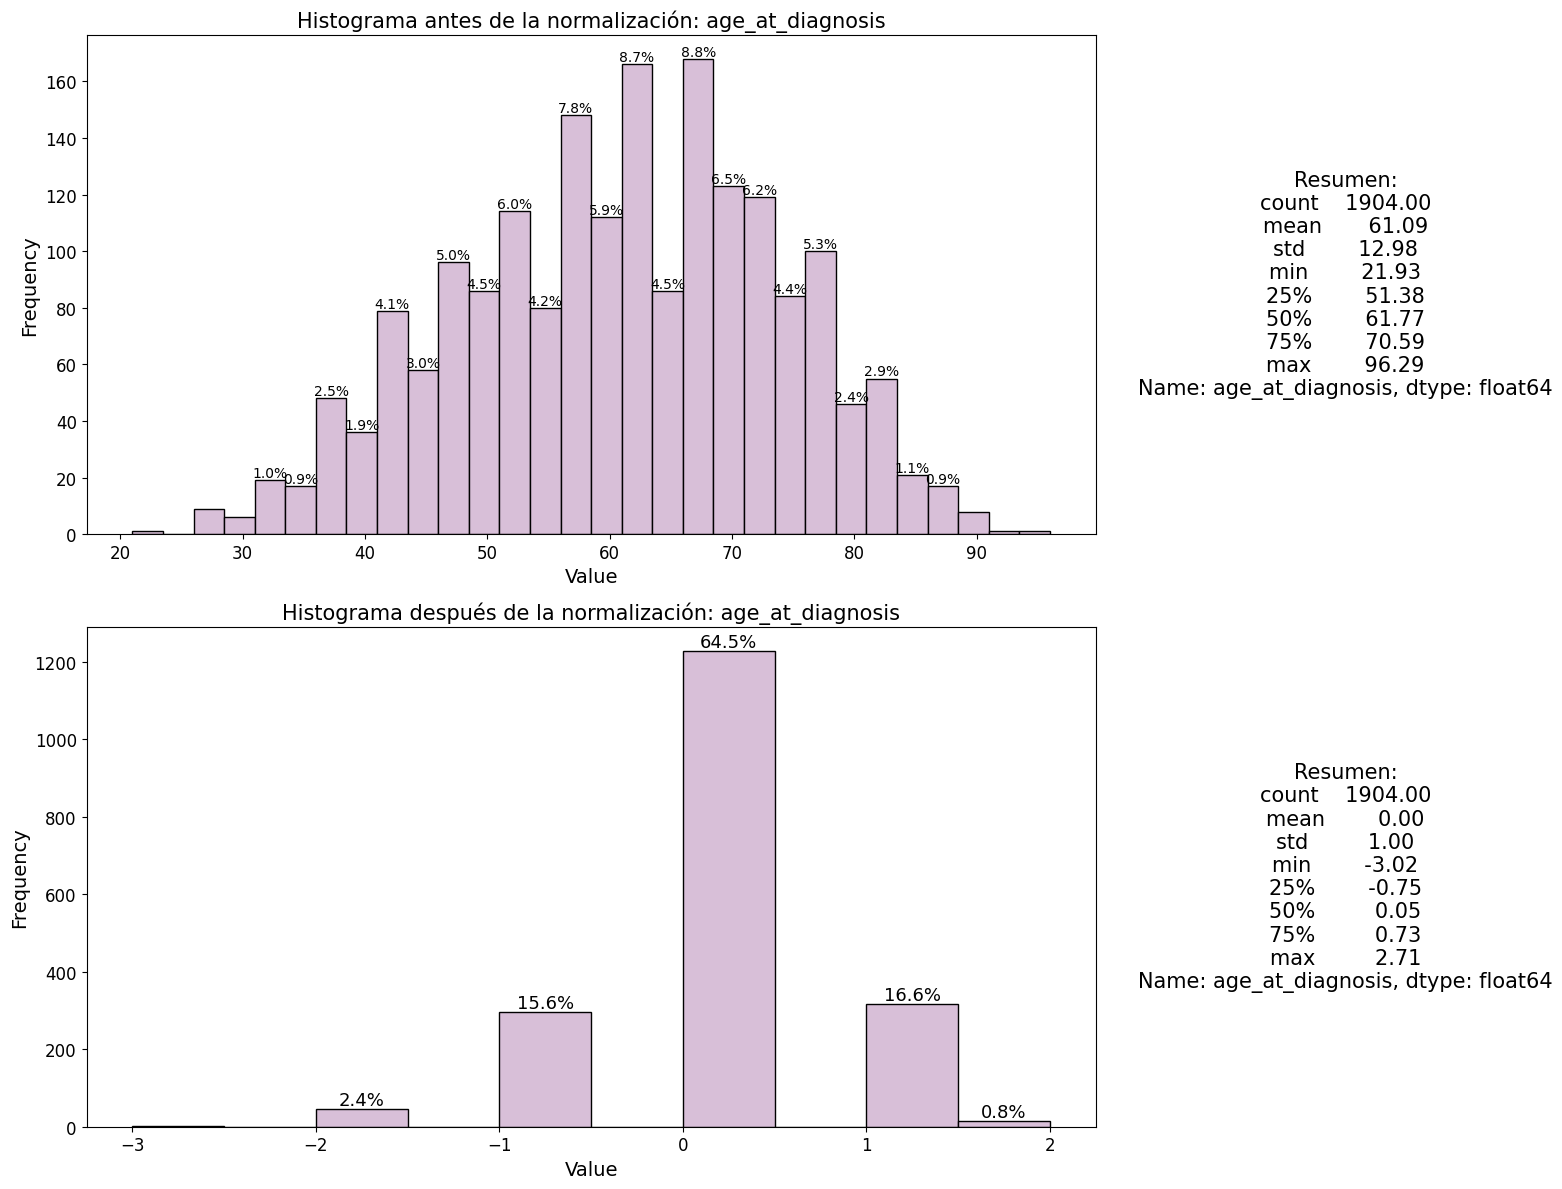

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=30, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=10, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'lymph_nodes_examined_positive'

La variable 'lymph_nodes_examined_positive' indica el resultado de examinar los ganglios linfáticos durante la cirugía de cáncer para evaluar si el cáncer los ha comprometido.
Represente la proporción de ganglios linfáticos examinados que mostraron compromiso por el cáncer.
Vemos que casi el 94% de los casos se encuentran entre 0 y 10.

In [9]:
col = metabrics_numeric_col[1]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna lymph_nodes_examined_positive no contiene valores nulos ni NA.


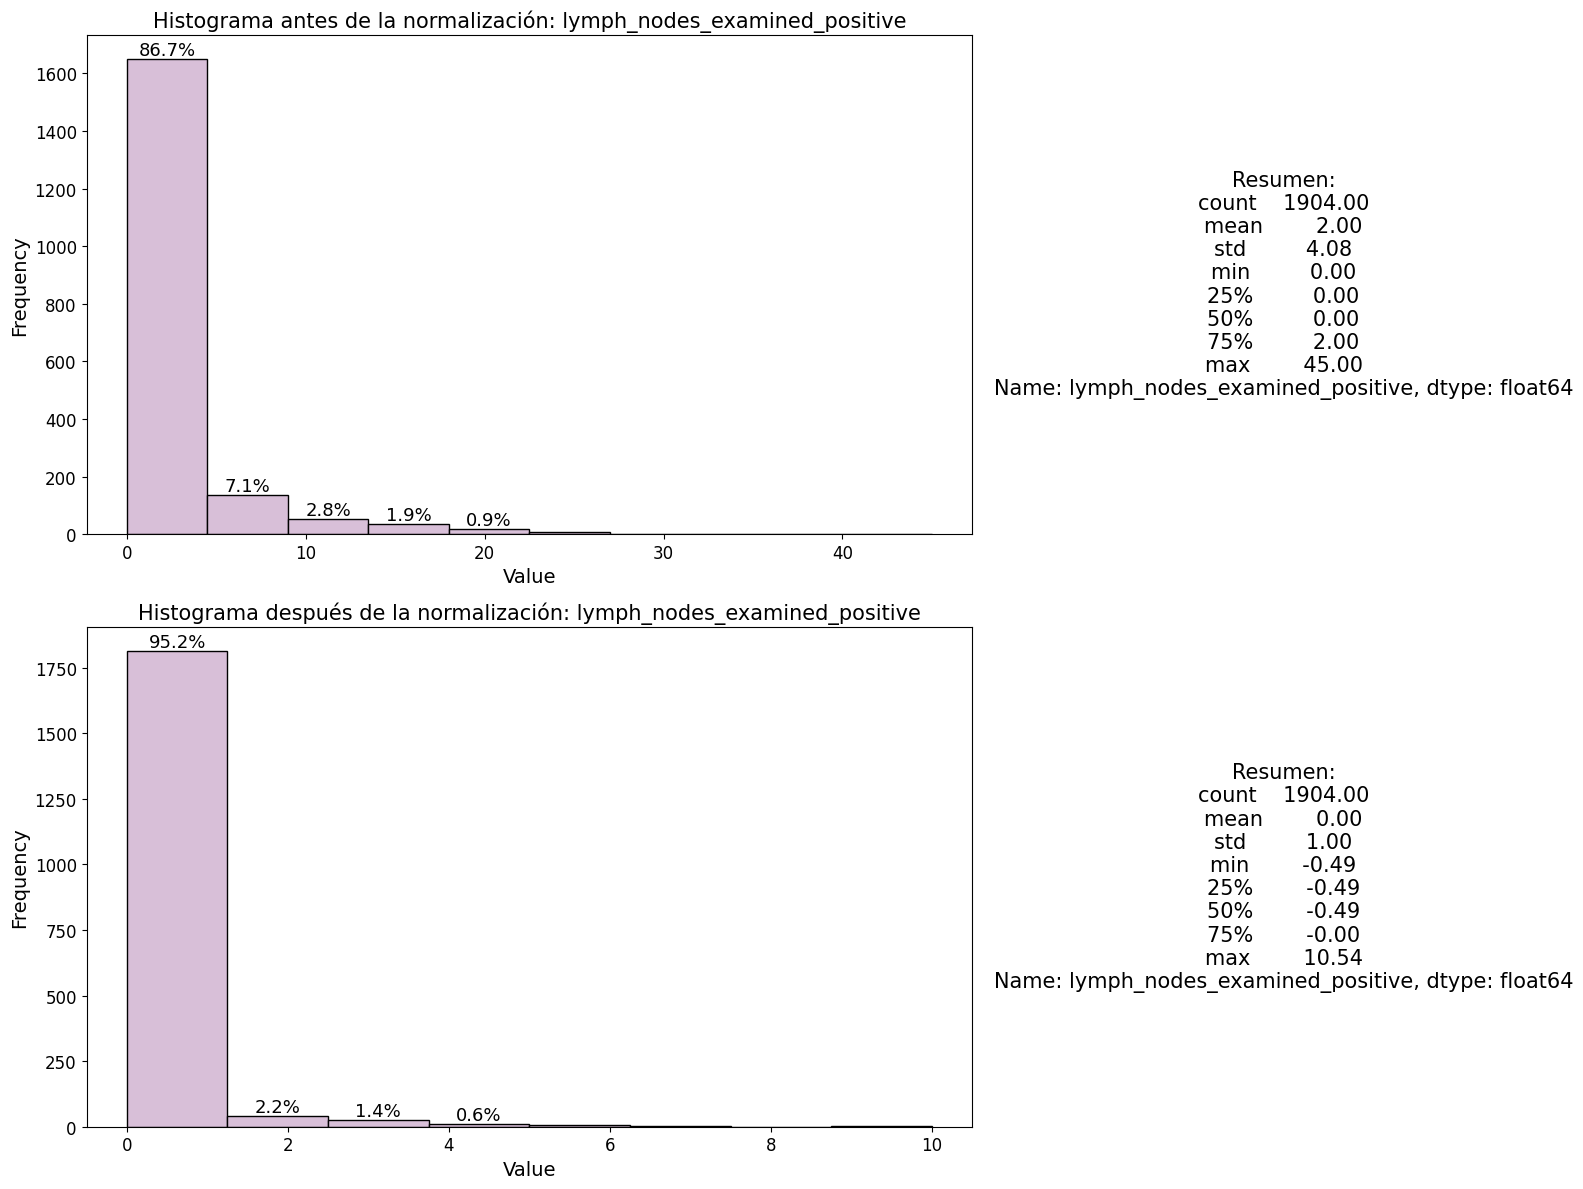

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=10, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=8, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'nottingham_prognostic_index'

La variable 'nottingham_prognostic_index' es una puntuación que se utiliza para estimar el pronóstico de una paciente después de una cirugía de cáncer de mama.
Se calcula en base a tres criterios patológicos clave:

* Tamaño del tumor: Los tumores más grandes generalmente indican una etapa más avanzada del cáncer.
* Número de ganglios linfáticos afectados: La presencia de células cancerosas en los ganglios linfáticos sugiere un mayor riesgo de que el cáncer se propague.
Un mayor número de ganglios linfáticos afectados indica un mayor riesgo.
* Grado del tumor: Esto se refiere a qué tan agresivas se ven las células cancerosas bajo el microscopio.

Los grados más altos generalmente están asociados con cánceres de crecimiento más rápido y más agresivos.

Considerando los estadísticos de esta variable en el conjunto de datos vemos que el valor mínimo es 1 y el máximo es 6.360, con un valor medio de 4.033


In [11]:
col = metabrics_numeric_col[2]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna nottingham_prognostic_index no contiene valores nulos ni NA.


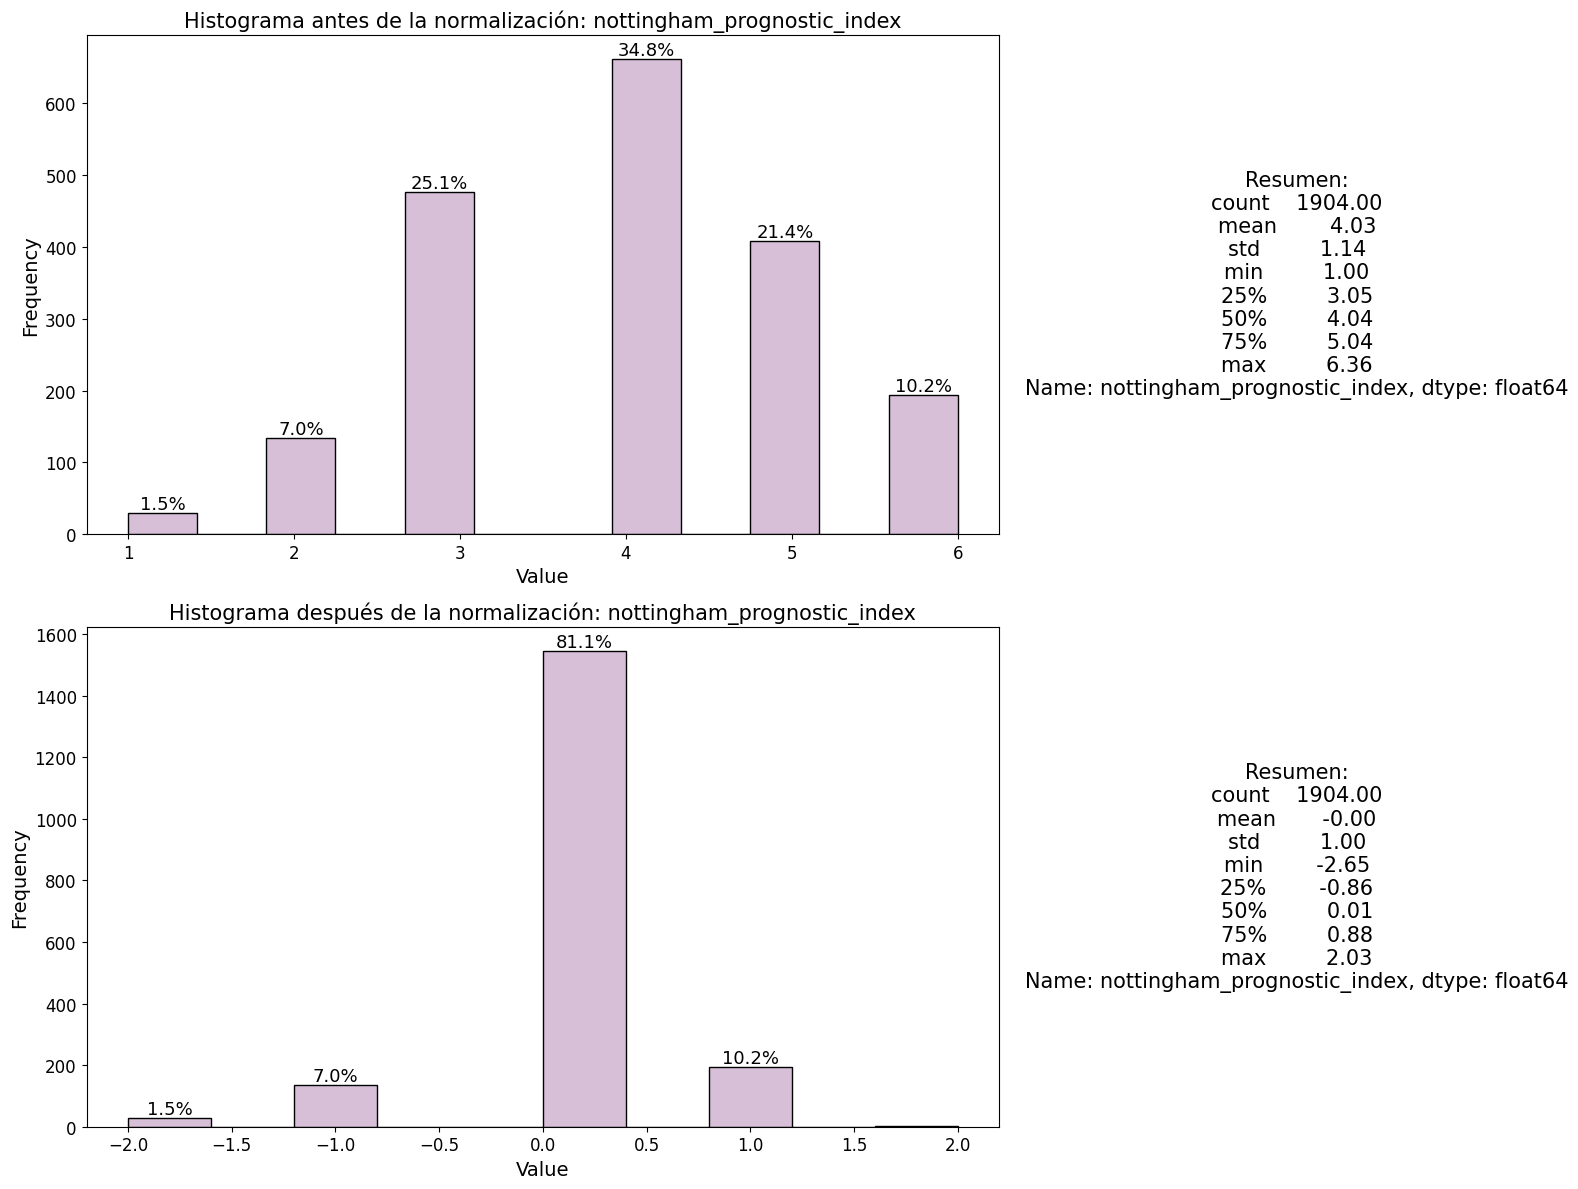

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=12, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'overall_survival_months'

La variable 'overall_survival_months' proporciona información sobre la duración de la supervivencia después de una intervención médica.

In [13]:
col = metabrics_numeric_col[3]
if metabric_data[col].isna().any():
    print(f"La columna {col} contiene valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna overall_survival_months no contiene valores nulos ni NA.


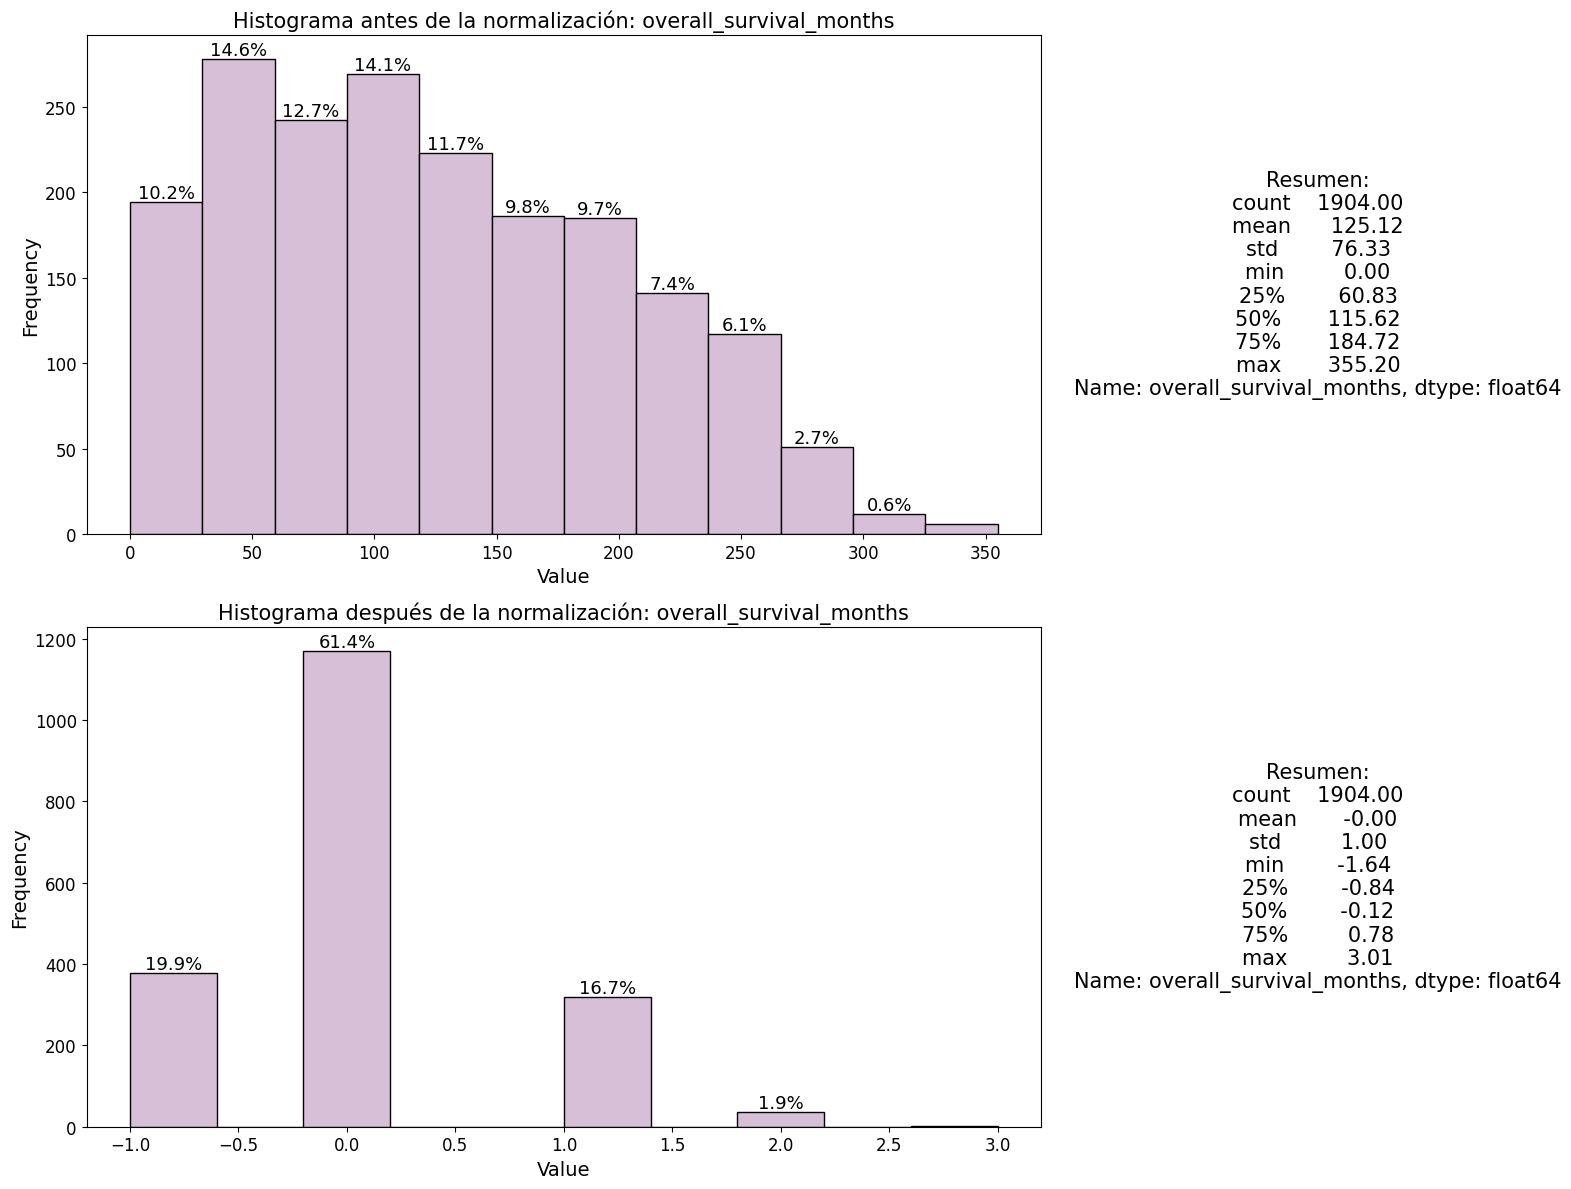

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=12, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=13, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'mutation_count'

La variable 'mutation_count' denota el número de genes que presentan mutaciones relevantes en el conjunto de datos. 
Los resultados estadísticos revelan una distribución variada: desde un mínimo de una mutación hasta un máximo de 80. En promedio, se observan alrededor de 5.7 genes con mutaciones relevantes por caso, con un tercer cuartil de 7. Esto sugiere que la mayoría de los casos tienen un número moderado de genes con mutaciones, aunque hay una variabilidad considerable, como se refleja en el rango y el valor máximo. Además, se identifican 45 casos con valores faltantes en esta variable. 
Para imputar esos valores utilizaremos la mediana ya que es menos sensible a los valores extremos y proporcionará una mejor representación del centro de la distribución en este caso.

In [15]:
col = metabrics_numeric_col[4]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna mutation_count contiene 45 valores nulos o NA.


In [16]:
# Calcular la mediana de la columna mutation_count
median_count = metabric_data[col].median()

# Imputar los valores nulos o NA con la mediana
metabric_data[col] = metabric_data[col].fillna(median_count)

if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna mutation_count no contiene valores nulos ni NA.


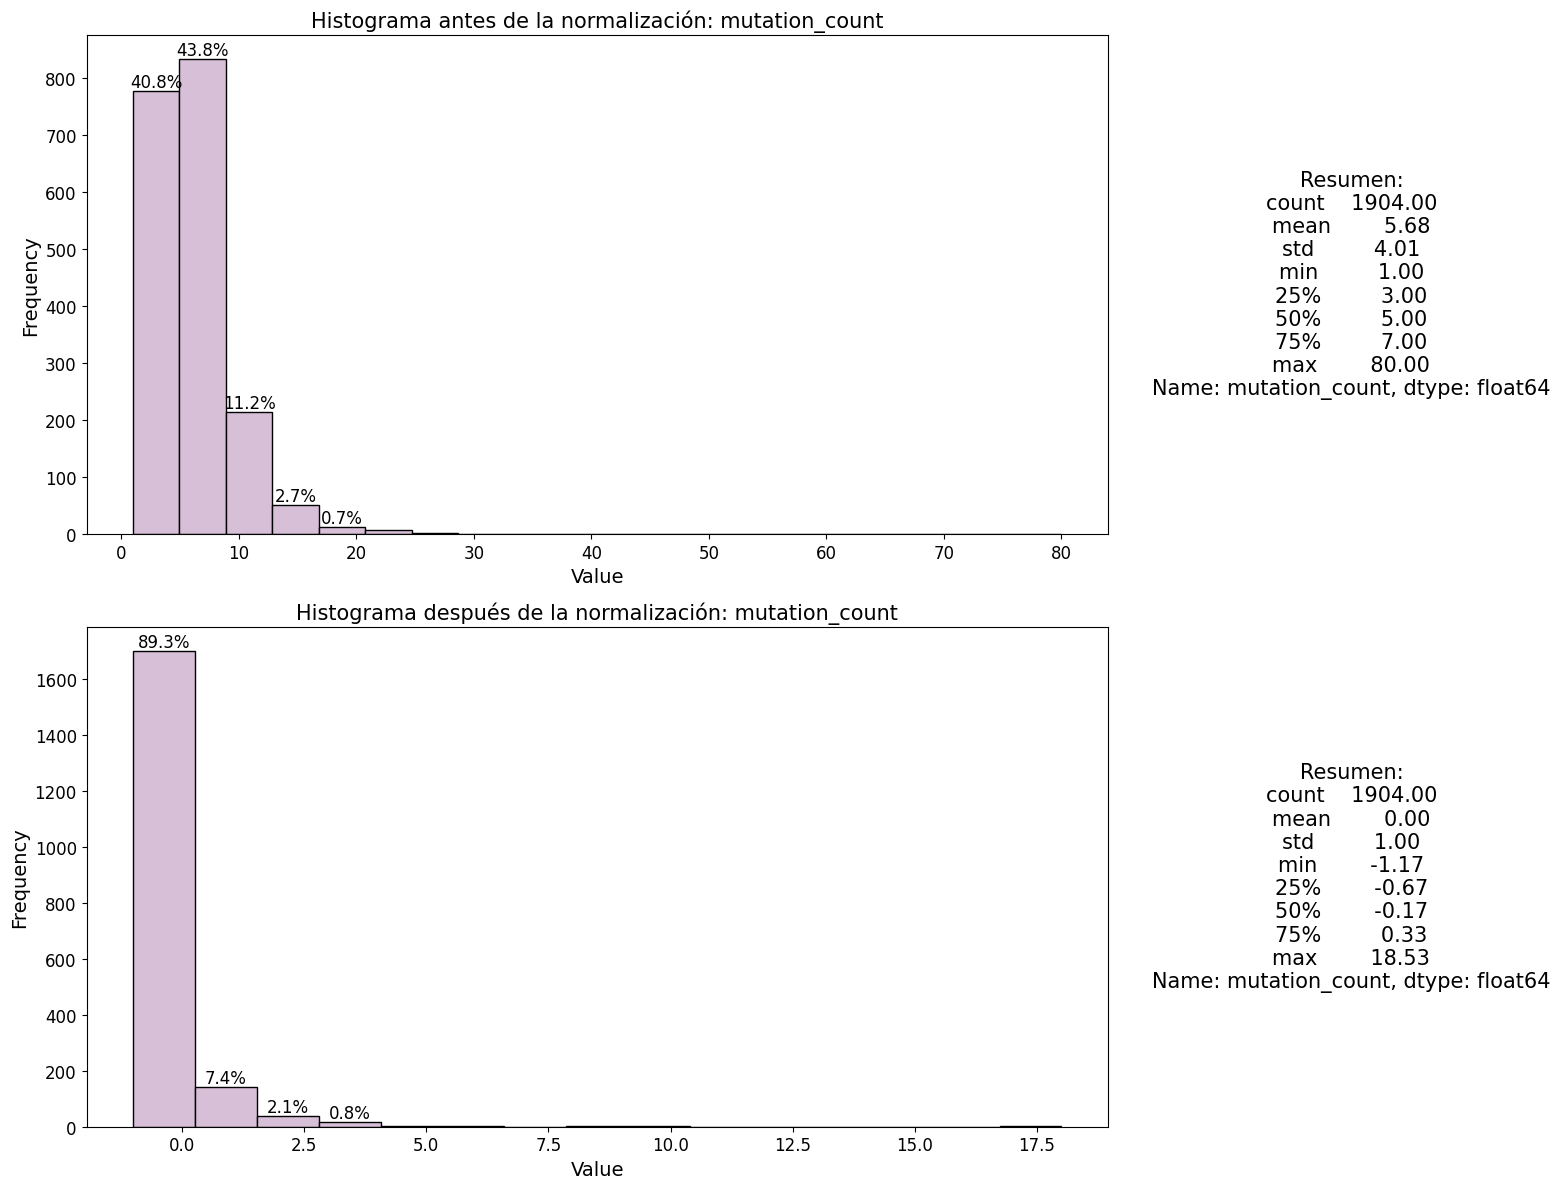

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=20, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=15, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'tumor_size'

La variable 'tumor_size' representa el tamaño del tumor en unidades específicas. El resumen estadístico indica que el tamaño mínimo del tumor es de 1 unidad, mientras que el tamaño máximo es de 182 unidades.
El tamaño medio del tumor es de aproximadamente 26.25 unidades. Además, hay 20 valores faltantes (NA's) en esta variable.
Para imputar esos valores utilizaremos la mediana ya que es menos sensible a los valores extremos y proporcionará una mejor representación del centro de la distribución en este caso.

In [18]:
col = metabrics_numeric_col[5]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_size contiene 20 valores nulos o NA.


In [19]:
# Calcular la mediana
median_count = metabric_data[col].median()

# Imputar los valores nulos o NA con la mediana
metabric_data[col] = metabric_data[col].fillna(median_count)

if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_size no contiene valores nulos ni NA.


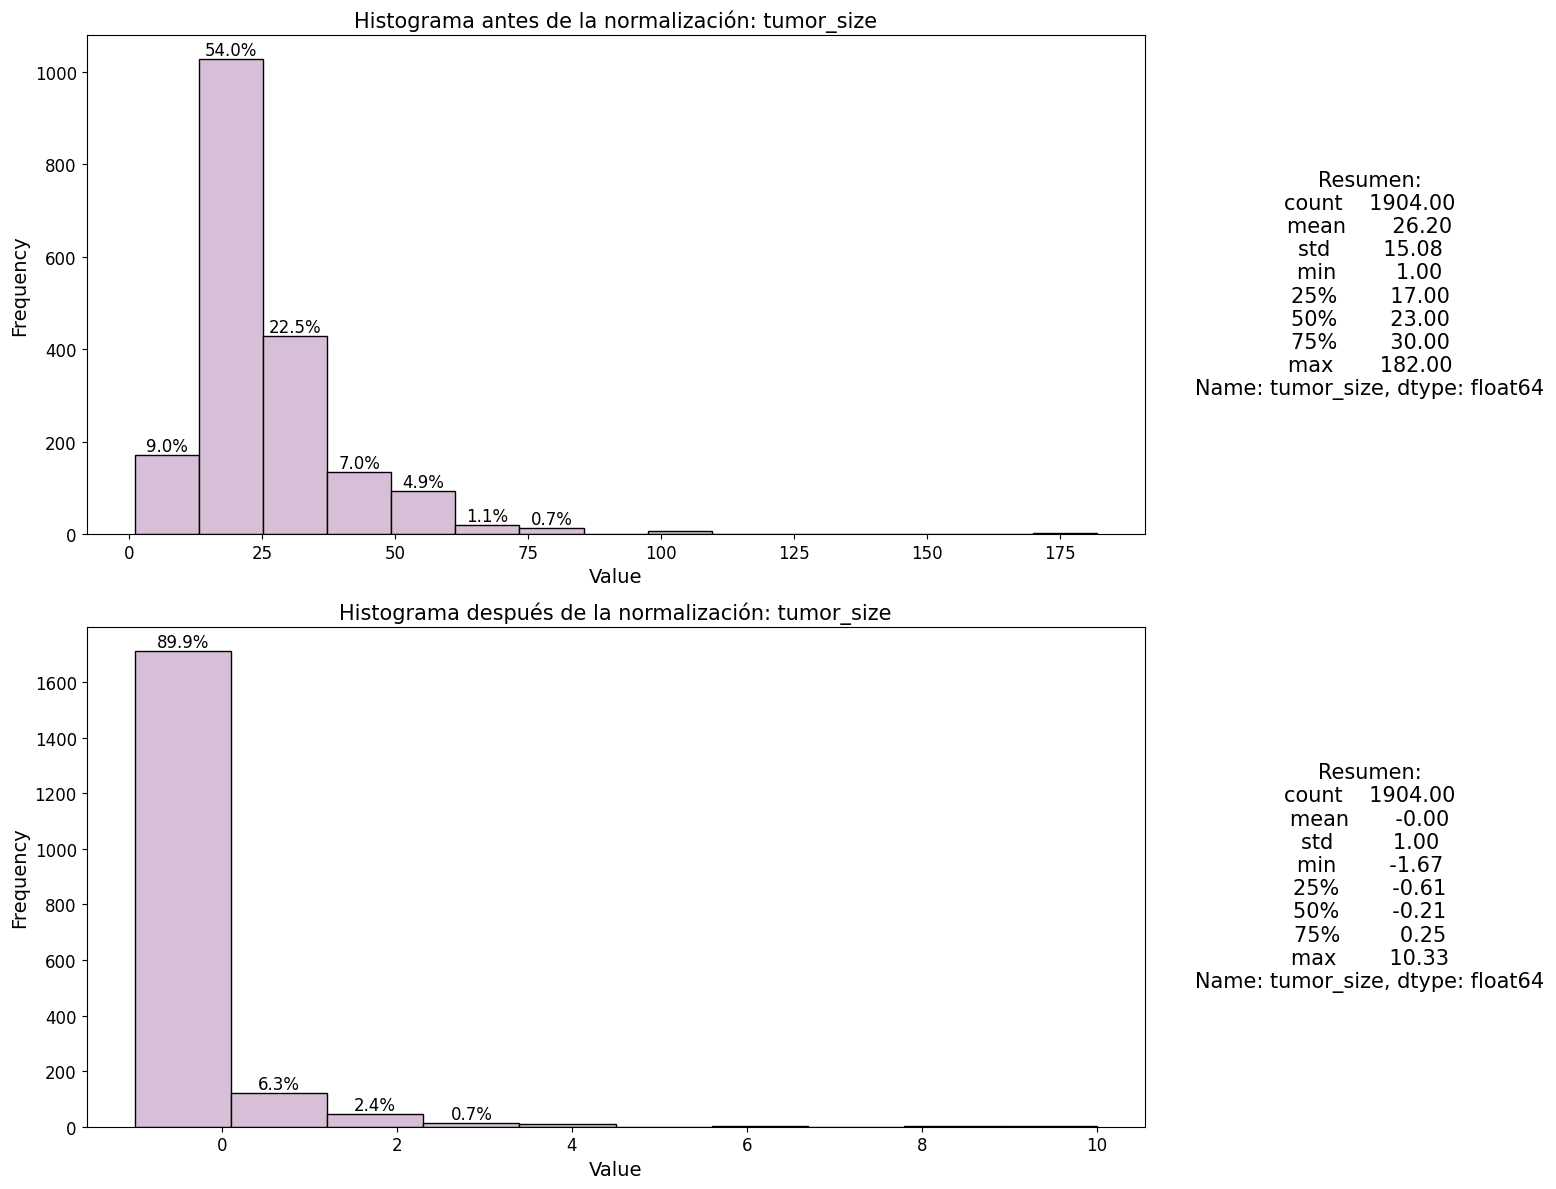

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=15, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=10, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

#### 'tumor_stage'

La variable 'tumor_stage' representa el estadio del cáncer basado en el grado de participación de las estructuras circundantes, los ganglios linfáticos y la propagación a distancia. 
Según los datos observamos en el histograma, hay un 68% de los pacientes con cáncer en el estadio 2, seguido por aproximadamente un 25% en el estadio 1. Un porcentaje menor de pacientes se encuentra en estadios más avanzados, con el 6% en el estadio 3.
Esta variable presenta 500 valores faltantes (NA's). Para imputarlos también utilizaremos la mediana ya que es menos sensible a los valores extremos y proporcionará una mejor representación del centro de la distribución en este caso.

In [21]:
col = metabrics_numeric_col[6]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_stage contiene 501 valores nulos o NA.


In [22]:
# Calcular la mediana
median_count = metabric_data[col].median()

# Imputar los valores nulos o NA con la mediana
metabric_data[col] = metabric_data[col].fillna(median_count)

if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_stage no contiene valores nulos ni NA.


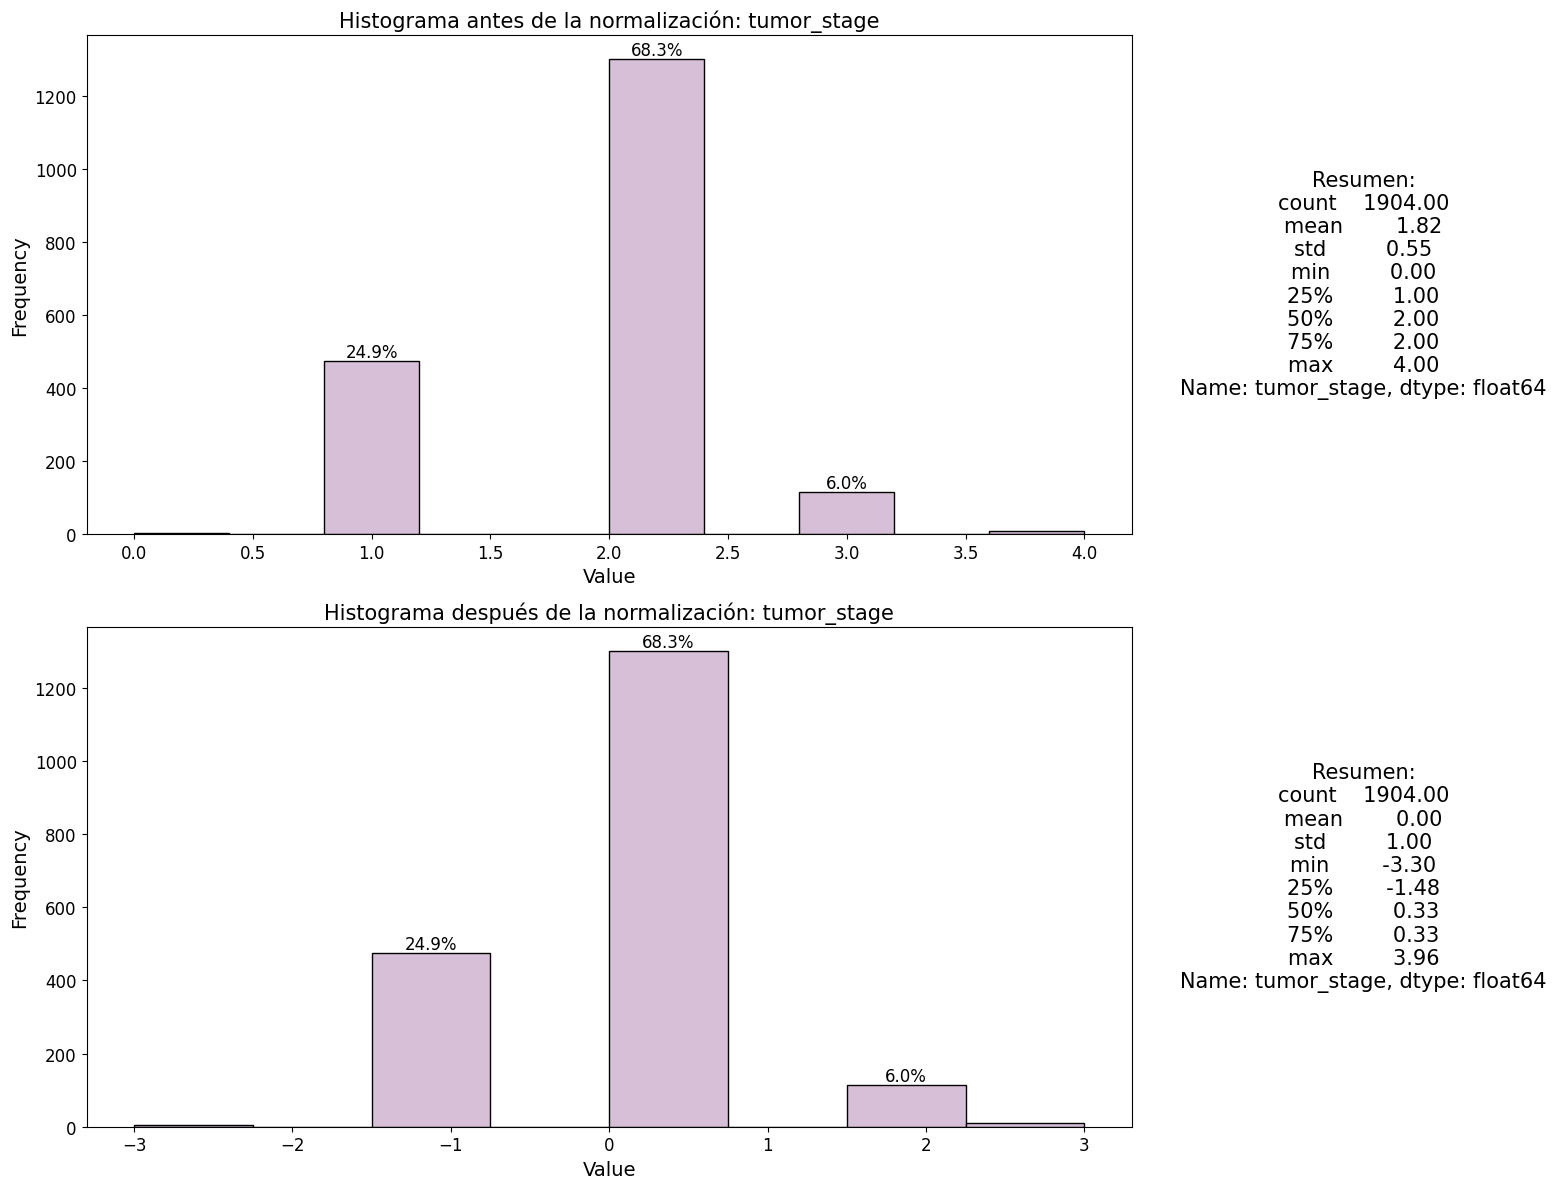

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12), gridspec_kw={'width_ratios': [3, 1]})

# Antes de la normalización
col_before = metabric_data[col]
create_histogram(col_before, bins=10, title=f'Histograma antes de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[0, 0])
summary_statistics(col_before, axs[0, 1])

# Después de la normalización
metabric_data[col] = normalize_with_zscore(metabric_data[col])
create_histogram(metabric_data[col], bins=8, title=f'Histograma después de la normalización: {col_before.name}',percentage_font_size=12, ax=axs[1, 0])
summary_statistics(metabric_data[col], axs[1, 1])

plt.tight_layout()
plt.show()

### Variables categóricas: 

In [24]:
metabrics_categorical_col = ("type_of_breast_surgery","cancer_type","cancer_type_detailed", "cellularity", "neoplasm_histologic_grade"
,"chemotherapy","hormone_therapy","radio_therapy",  "pam50_+_claudin-low_subtype", "er_status_measured_by_ihc"
,"er_status","her2_status_measured_by_snp6","her2_status","tumor_other_histologic_subtype",
"inferred_menopausal_state","integrative_cluster","primary_tumor_laterality" ,"oncotree_code", "pr_status", 
"3-gene_classifier_subtype" ,"overall_survival", "death_from_cancer", "cohort")

#### 'type_of_breast_surgery'

Vemos que más de la mitad de las pacientes del conjunto de datos han pasado por una mastectomia.
También vemos que hay 22 registros faltantes, utilizaremos el método de imputación proporcional de valores faltantes para asignarles valores. 
Este método imputa los valores faltantes en una variable categórica proporcionalmente a la frecuencia de los valores observados en los datos, asegurando así que la distribución de los datos imputados refleje de manera realista la distribución de los datos observados.

In [25]:
col = metabrics_categorical_col[0]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna type_of_breast_surgery contiene 22 valores nulos o NA.


In [26]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,MASTECTOMY,1127,59.19
1,BREAST CONSERVING,755,39.65
2,NaN,22,1.16


In [27]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,MASTECTOMY,1146,60.19
1,BREAST CONSERVING,758,39.81


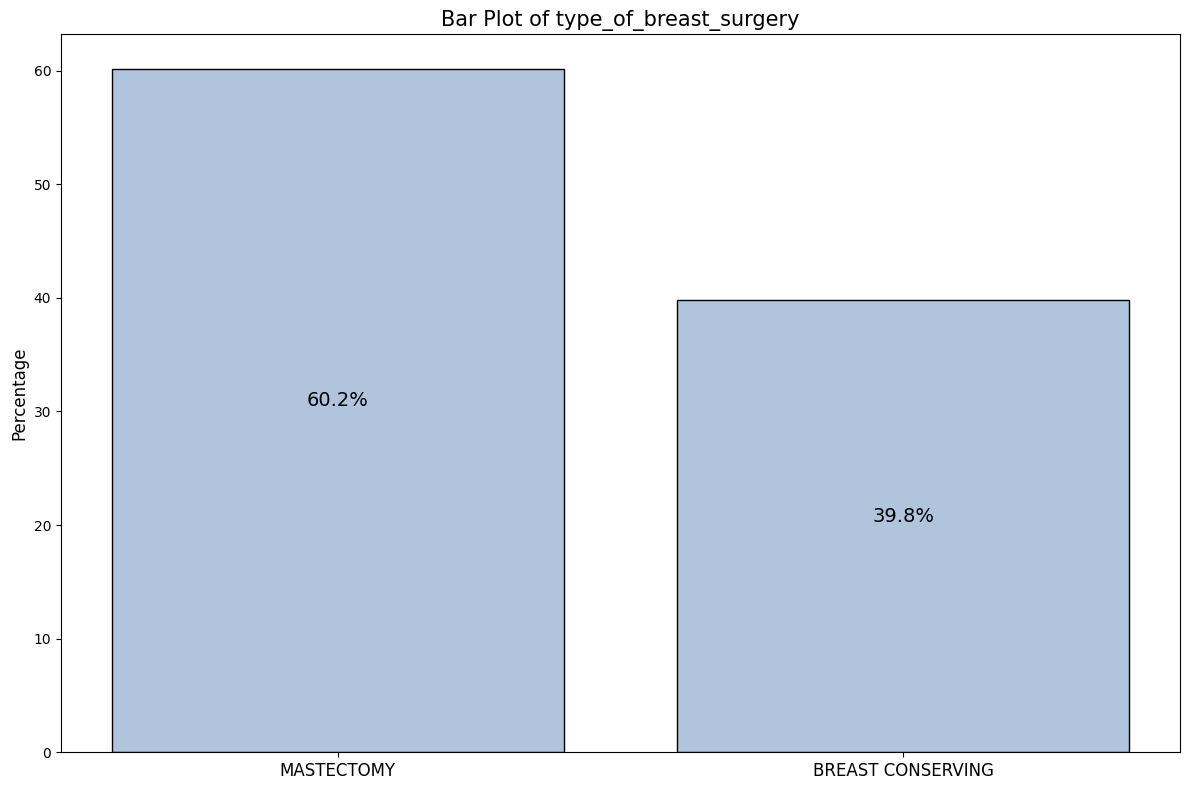

In [28]:
plot_category_bar(metabric_data[col], 14)

In [29]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 521)

#### 'cancer_type'

Vamos a descartar esta variable para los modelos ya que no brinda información adicional


In [30]:
col = metabrics_categorical_col[1]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cancer_type no contiene valores nulos ni NA.


In [31]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Breast Cancer,1903,99.95
1,Breast Sarcoma,1,0.05


In [32]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 522)

#### 'cancer_type_detailed'

La variable 'cancer_type_detailed' muestra la distribución de casos por tipo detallado de cáncer de mama.
El tipo más frecuente es "Breast Invasive Ductal Carcinoma" con 1500 registros, representando aproximadamente el 80% de los casos.
Le siguen en frecuencia "Breast Mixed Ductal and Lobular Carcinoma" (207 registros, 11%), "Breast Invasive Lobular Carcinoma" (142 registros, 7.3%) y "Breast Invasive Mixed Mucinous Carcinoma" (22 registros, 1.2%).
Hay 15 registros que no tienen ningún valor asignado de esta variable, en este caso también usaremos el método de imputación proporcional.

In [33]:
col = metabrics_categorical_col[2]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cancer_type_detailed contiene 15 valores nulos o NA.


In [34]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Breast Invasive Ductal Carcinoma,1500,78.78
1,Breast Mixed Ductal and Lobular Carcinoma,207,10.87
2,Breast Invasive Lobular Carcinoma,142,7.46
3,Breast Invasive Mixed Mucinous Carcinoma,22,1.16
4,Breast,17,0.89
5,NaN,15,0.79
6,Metaplastic Breast Cancer,1,0.05


In [35]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Breast Invasive Ductal Carcinoma,1513,79.46
1,Breast Mixed Ductal and Lobular Carcinoma,209,10.98
2,Breast Invasive Lobular Carcinoma,142,7.46
3,Breast Invasive Mixed Mucinous Carcinoma,22,1.16
4,Breast,17,0.89
5,Metaplastic Breast Cancer,1,0.05


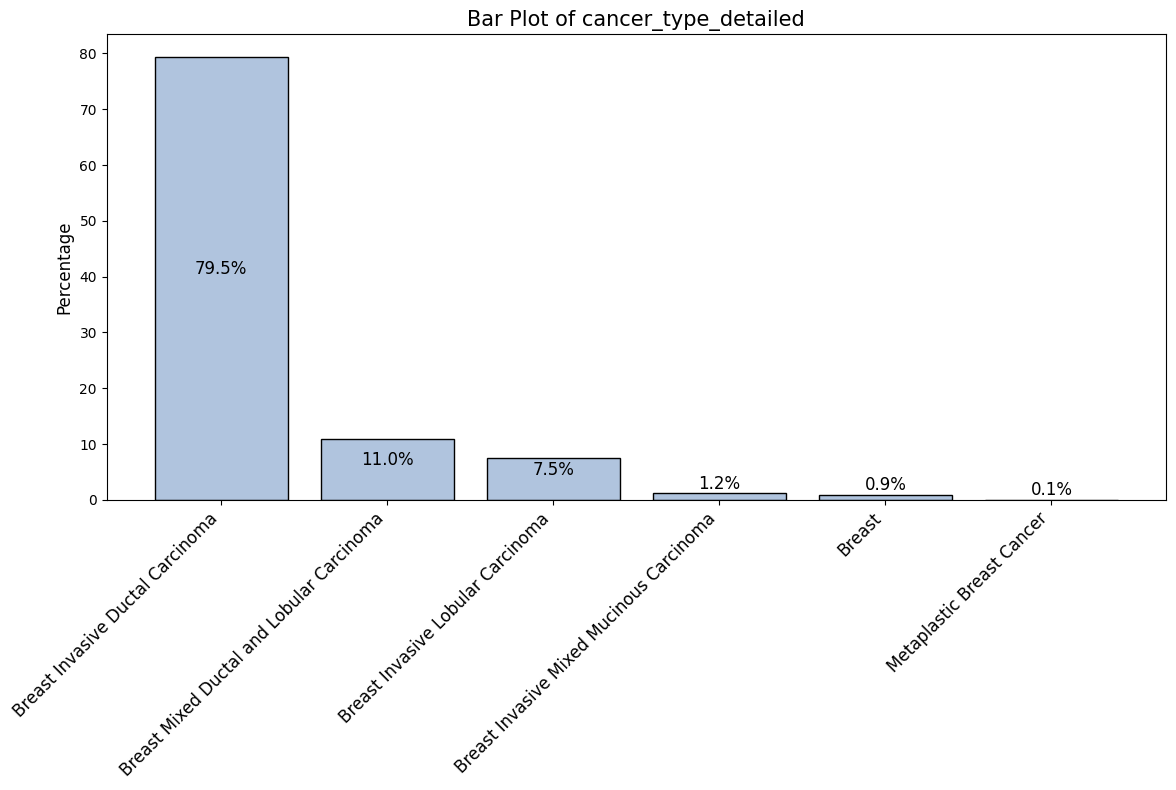

In [36]:
plot_category_bar(metabric_data[col], 12)

In [37]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 527)

#### 'cellularity'

La variable "cellularity" se refiere a la celularidad del cáncer después de la quimioterapia, es decir la cantidad de células tumorales en la muestra y su disposición en grupos o conglomerados.
Los valores que toma son "High" (Alta), "Low" (Baja) y "Moderate" (Moderada).
Esta información proporciona detalles sobre la densidad de las células tumorales en la muestra después del tratamiento con quimioterapia.
En el conjunto de datos aproximadamente el 50% de las muestras tienen celularidad alta, seguido de un 37% de celularidad media, 10% de celularidad baja y aproximadamente un 3% de valores faltantes, asignaremos la categoría 'Unknown' a estos 54 registros que no tienen celularidad.

In [38]:
col = metabrics_categorical_col[3]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cellularity contiene 54 valores nulos o NA.


In [39]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,High,939,49.32
1,Moderate,711,37.34
2,Low,200,10.50
3,NaN,54,2.84


In [40]:
# Creo una nueva categoria para los valores nulos
metabric_data['cellularity'] = metabric_data['cellularity'].fillna('Unknown')
category_summary(metabric_data[col])

,Category,Count,Percentage
0,High,939,49.32
1,Moderate,711,37.34
2,Low,200,10.50
3,Unknown,54,2.84


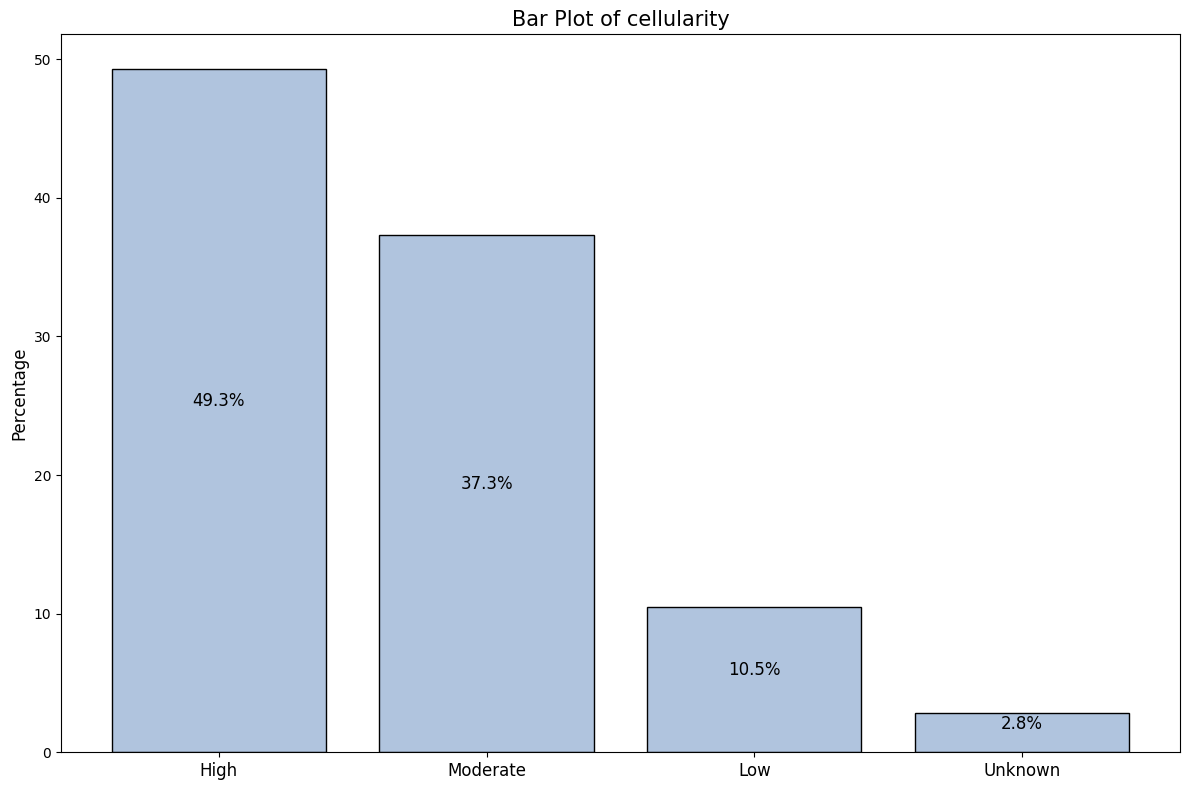

In [41]:
plot_category_bar(metabric_data[col], 12)

In [42]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1904, 530)

#### 'neoplasm_histologic_grade'

La variable 'neoplasm_histologic_grade' representa el grado histológico del tumor.
Es una medida que describe cómo se ve el tejido del tumor bajo un microscopio y generalmente se basa en la diferenciación celular, el tamaño del núcleo celular, la tasa de crecimiento y la arquitectura del tejido tumoral.

Esta es la variable target que se intenterá  predecir con clasificadores en la segunda parte del proyecto.

Se utiliza para clasificar el tumor en diferentes categorías que reflejan su agresividad y pronóstico: 
* Grado I (bajo grado): Las células cancerosas se parecen más a las células normales y tienden a crecer y propagarse más lentamente.
* Grado II (grado intermedio): Las células cancerosas tienen características intermedias entre las de grado I y grado III.
* Grado III (alto grado): Las células cancerosas se ven muy diferentes de las células normales y tienden a crecer y propagarse más rápidamente.

Observando los resultados vemos que el 50% de los casos que se presentan en este conjunto de datos corresponden a una clasificación grado III, seguida de un 40% de grado II y por último sólo un 9% de los registros presentan grado I.
Esta variable tiene 72 valores nulos pero dado que será la variable target, eliminaremos estos registros del conjunto de datos.

In [43]:
col = metabrics_categorical_col[4]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna neoplasm_histologic_grade contiene 72 valores nulos o NA.


In [44]:
#Elimino registros con valores null
metabric_data.dropna(subset=['neoplasm_histologic_grade'], inplace=True)
category_summary(metabric_data[col])

,Category,Count,Percentage
0,3.0,927,50.60
1,2.0,740,40.39
2,1.0,165,9.01


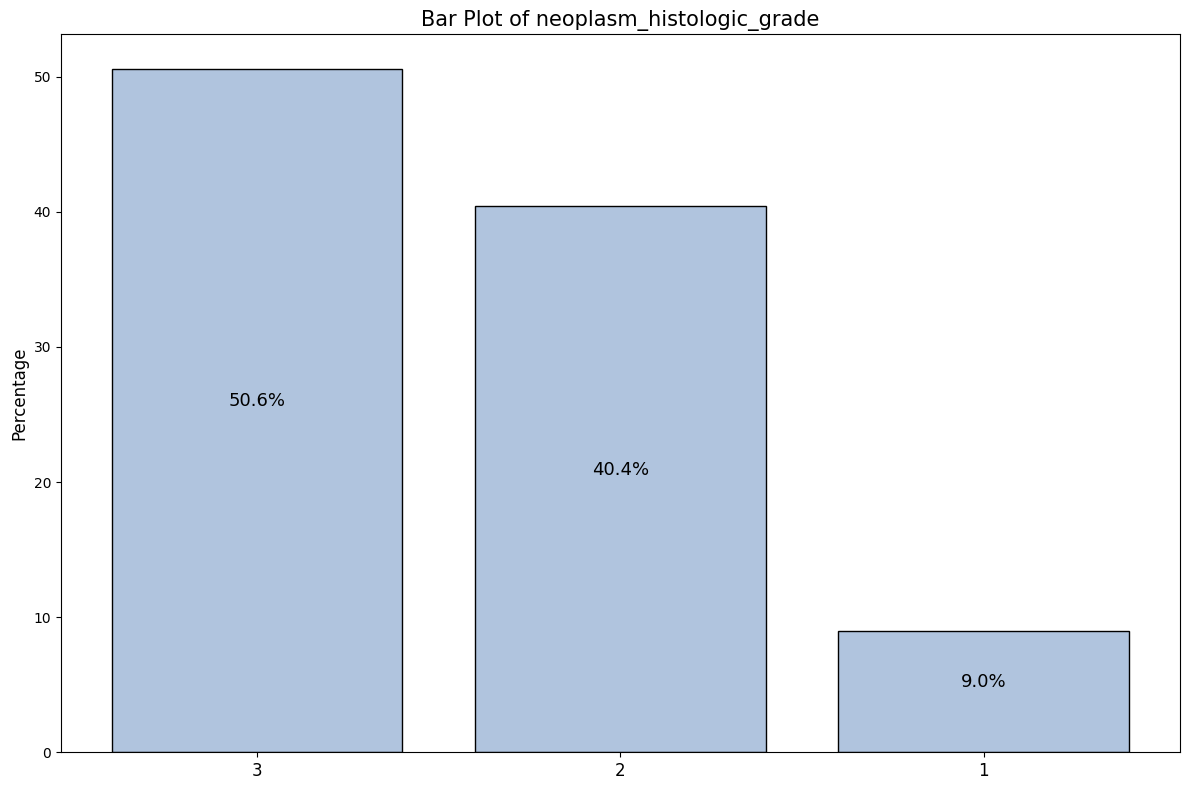

In [45]:
plot_category_bar(metabric_data[col], 13)

#### 'chemotherapy'

Vemos que aproximadamente el 21% de las pacientes del conjunto de datos han pasado por quimioterapia.

In [46]:
col = metabrics_categorical_col[5]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna chemotherapy no contiene valores nulos ni NA.


In [47]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,0,1440,78.6
1,1,392,21.4


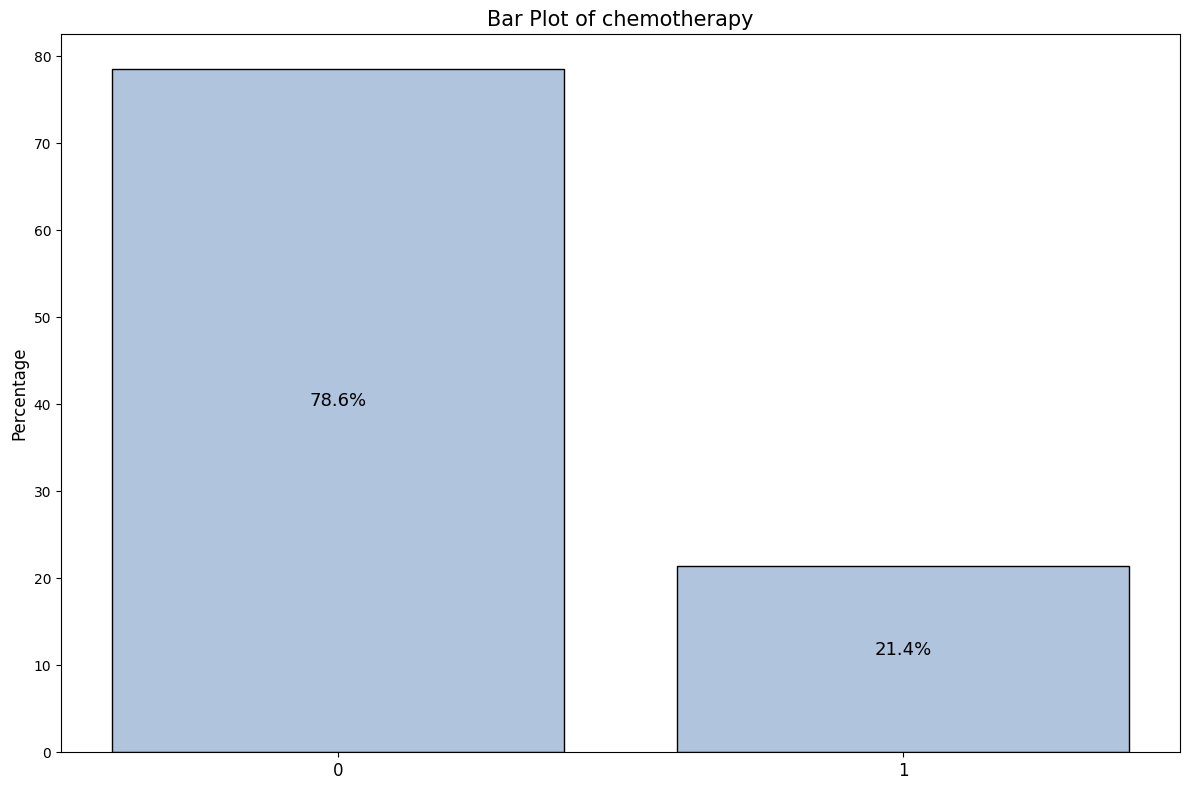

In [48]:
plot_category_bar(metabric_data[col], 13)

In [49]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 531)

#### 'hormone_therapy'

Por otro lado, el 62% ha estado bajo terapia hormonal

In [50]:
col = metabrics_categorical_col[6]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna hormone_therapy no contiene valores nulos ni NA.


In [51]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,1,1131,61.74
1,0,701,38.26


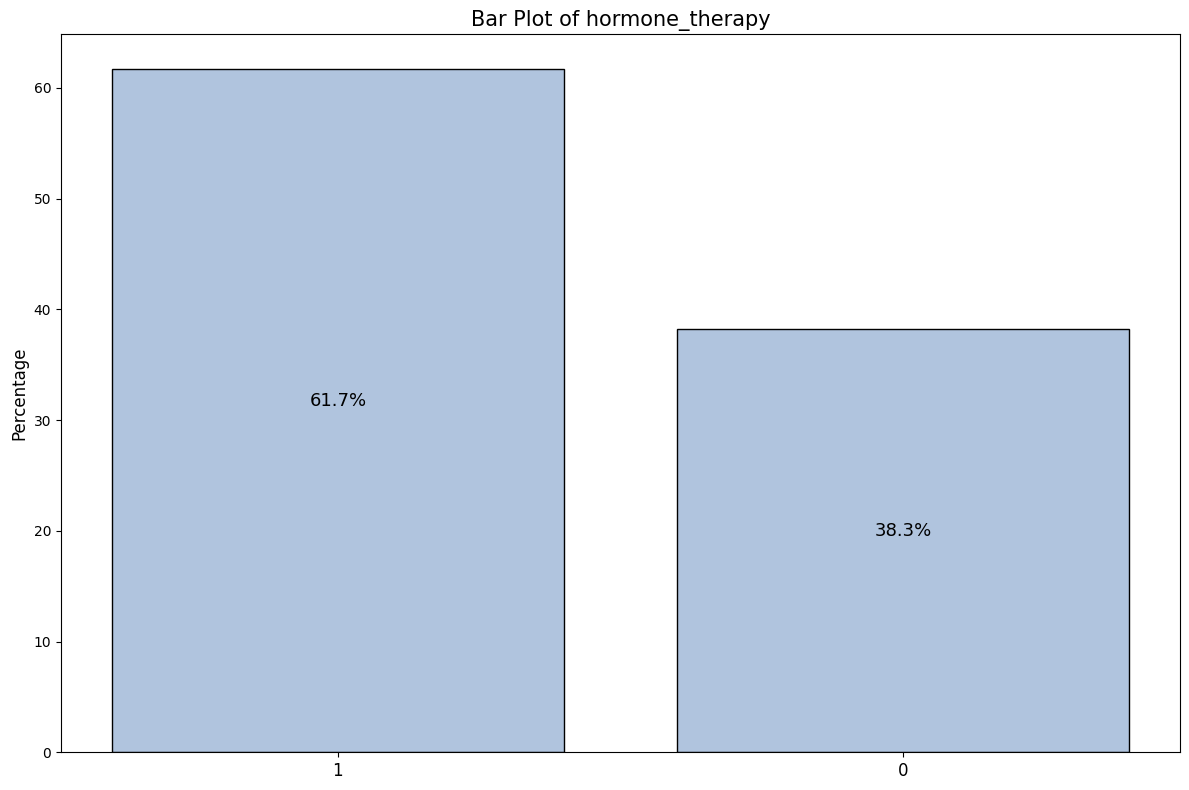

In [52]:
plot_category_bar(metabric_data[col], 13)

In [53]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 532)

#### 'radio_therapy'

En cuanto a la radioterapia, los valores son similares a la terapia hormonal, aproximadamente el 61% de las pacientes han pasado por radioterapia.

In [54]:
col = metabrics_categorical_col[7]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna radio_therapy no contiene valores nulos ni NA.


In [55]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,1,1111,60.64
1,0,721,39.36


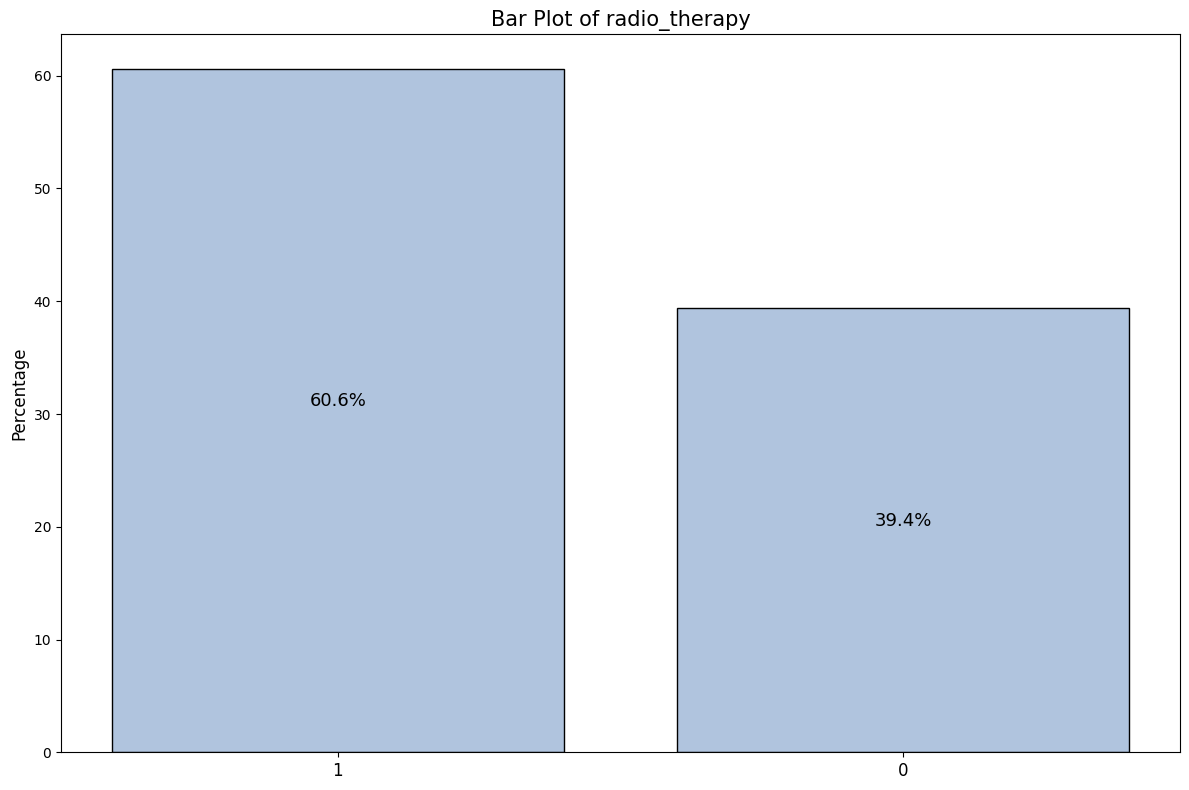

In [56]:
plot_category_bar(metabric_data[col], 13)

In [57]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 533)

#### 'pam50\_.\_claudin.low_subtype'

La variable 'pam50\_+\_claudin-low_subtype' representa el subtipo intrínseco de un cáncer de mama basado en el análisis de la expresión génica.

Este nombre combina dos sistemas de clasificación para el cáncer de mama:

-   pam50: Es una firma de expresión de 50 genes que ayuda a identificar subtipos de cáncer de mama con diferentes riesgos de metástasis (propagación) y respuesta al tratamiento.
-   claudin-low: Se refiere al subtipo claudin-low, un tipo específico de cáncer de mama caracterizado por la baja expresión de genes implicados en la adhesión celular y la alta expresión de genes asociados con la transición epitelial-mesenquimatosa (EMT) y propiedades similares a las células madre.

La variable puede tomar los siguientes valores:

* Basal: Este subtipo es agresivo y tiene el peor pronóstico.
Suele ser negativo para los receptores de estrógeno y progesterona (ER/PR negativo) y HER2 negativo.
* Claudin-low: Este subtipo se define por firmas de baja adhesión celular y EMT.
A menudo se encuentra dentro de la categoría basal.
* HER2: Este subtipo se define por la sobreexpresión del gen HER2, el cual puede ser atacado por terapias específicas.
* LumA: Este subtipo generalmente se considera el más favorable, con bajo riesgo de recurrencia y a menudo positivo para ER y PR.
* LumB: Este subtipo muestra algunas características agresivas en comparación con LumA, pero aún suele ser ER/PR positivo.
* NC: Significa "no clasificado".
Es posible que las muestras no encajen claramente en ninguna de las otras categorías.
* Normal: Indica una muestra de tejido sano, no canceroso.

En cuanto a la distribución vemos que es cercana al 10% para todos los casos con excepción de los dos subtipos LumA y LumB, siendo el LumA el porcentaje principal con el 34% de los casos.


In [58]:
col = metabrics_categorical_col[8]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna pam50_+_claudin-low_subtype no contiene valores nulos ni NA.


In [59]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,LumA,648,35.37
1,LumB,446,24.34
2,Her2,209,11.41
3,Basal,199,10.86
4,claudin-low,193,10.53
5,Normal,132,7.21
6,NC,5,0.27


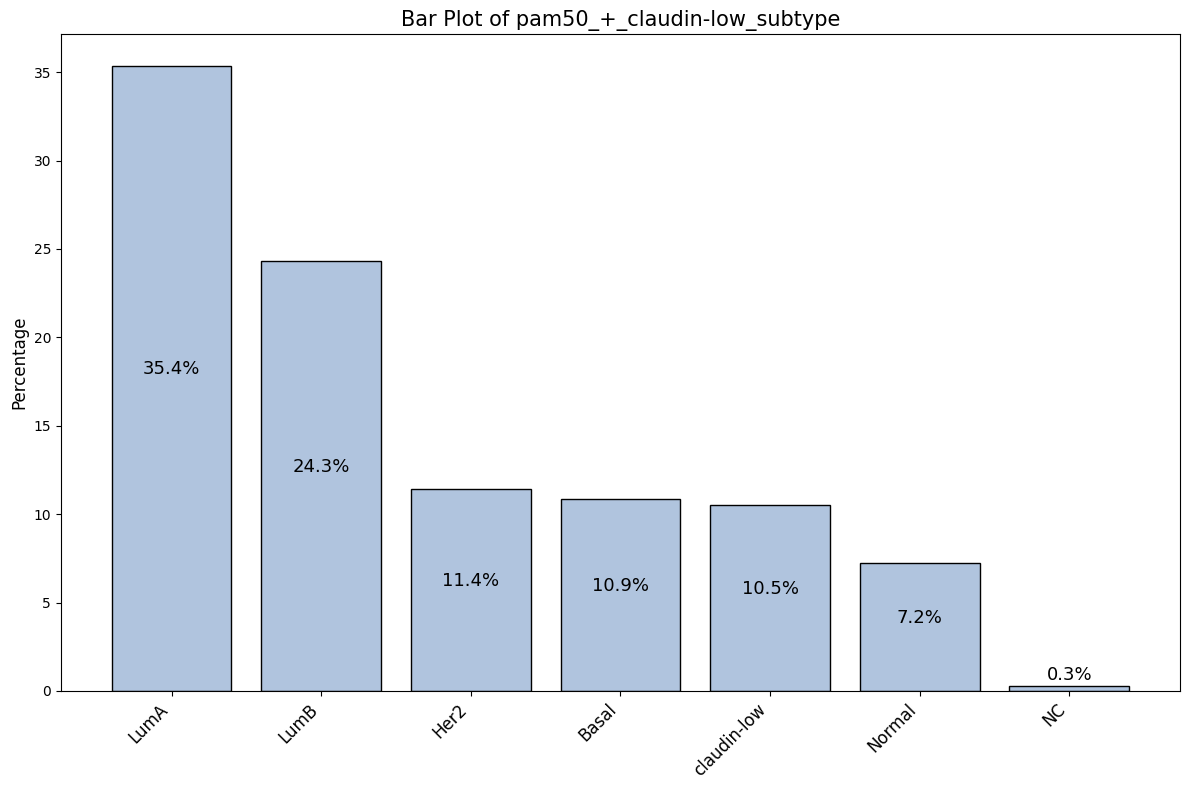

In [60]:
plot_category_bar(metabric_data[col], 13)

In [61]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 539)

#### 'er_status_measured_by_ihc'

La variable 'er_status_measured_by_ihc' indica el estado de los receptores de estrógeno (RE) en las células cancerosas, evaluado mediante inmunohistoquímica (IHC).
La IHC utiliza anticuerpos específicos para unirse a los RE si están presentes en las células.Posteriormente, se aplica un tinte para visualizar los anticuerpos unidos, lo que permite determinar si las células cancerosas son positivas o negativas para RE.

La variable puede tomar dos valores:

* Positive: Indica que las células cancerosas expresan receptores de estrógeno.
Los cánceres de mama con RE positivos suelen responder favorablemente a terapias hormonales como el tamoxifeno.
* Negative: Indica que las células cancerosas no expresan receptores de estrógeno.
Los cánceres de mama RE negativos generalmente no responden a las terapias hormonales.

En este caso vemos que el 76% de los casos son positivos y hay 23 registros con valores faltantes, los imputaremos utilizando el método proporcional.


In [62]:
col = metabrics_categorical_col[9]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna er_status_measured_by_ihc contiene 23 valores nulos o NA.


In [63]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positve,1388,75.76
1,Negative,421,22.98
2,NaN,23,1.26


In [64]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positve,1400,76.42
1,Negative,432,23.58


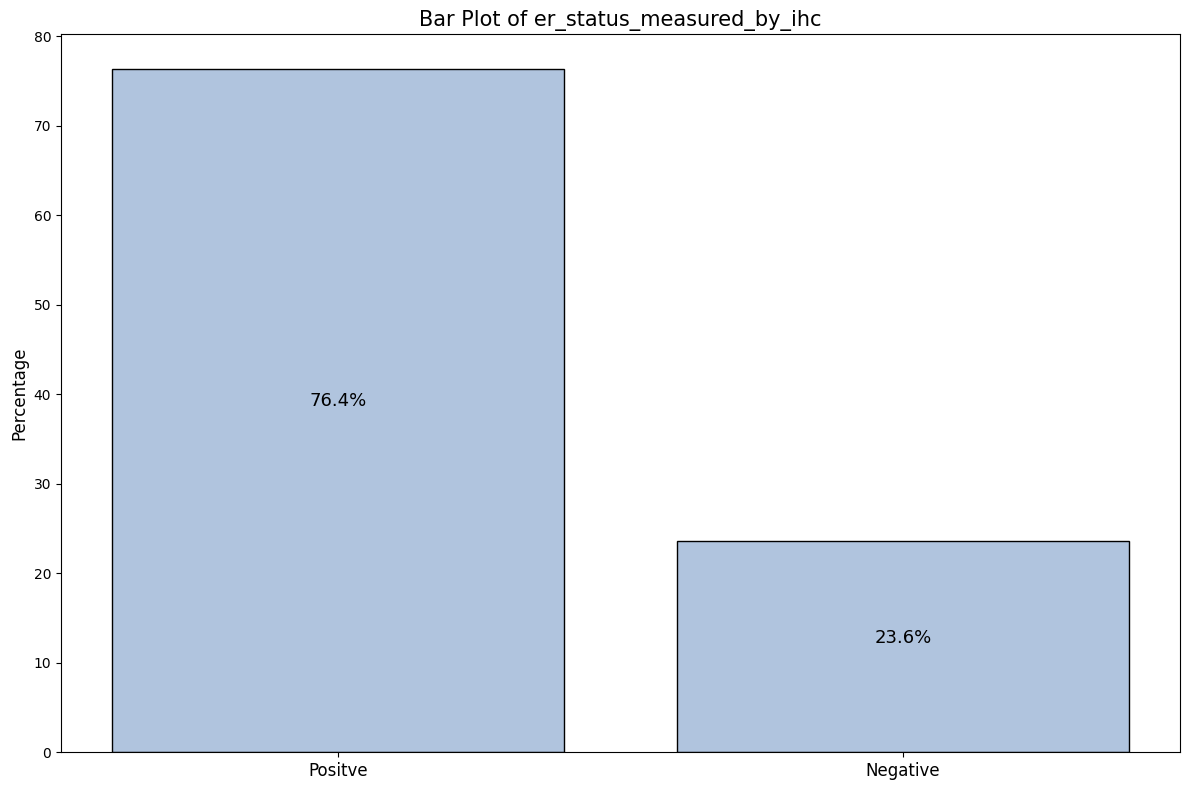

In [65]:
plot_category_bar(metabric_data[col], 13)

In [66]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 540)

#### 'er_status'

Tiene el mismo significado que la variable anterior pero sin especificar el método utilizado.
Para el modelo usaré esta y dejaré la anterior afuera ya que tiene algunos valores nulos y no aporta información extra.

In [67]:
col = metabrics_categorical_col[10]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna er_status no contiene valores nulos ni NA.


In [68]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positive,1396,76.2
1,Negative,436,23.8


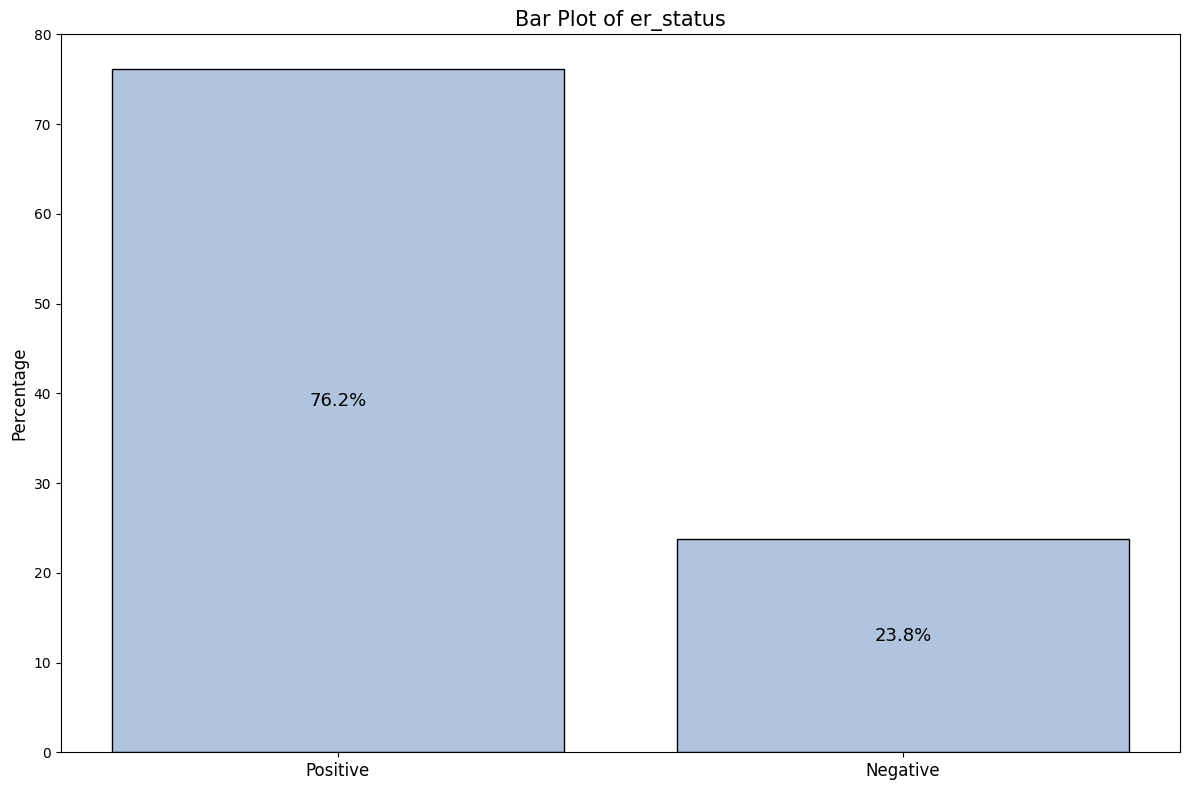

In [69]:
plot_category_bar(metabric_data[col], 13)

In [70]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 541)

#### 'her2_status_measured_by_snp6'

La variable 'her2_status_measured_by_snp6' indica el estado del gen HER2 (receptor del factor de crecimiento epidérmico humano 2) en las muestras de cáncer de mama.
Se determina mediante una técnica avanzada de biología molecular llamada "análisis de SNP6" (Single Nucleotide Polymorphism 6).
Indica si hay amplificación, pérdida o un nivel normal del gen HER2 en las células cancerosas

La variable puede tomar cuatro valores:

* Gain: Indica que hay un aumento en el número de copias del gen HER2 en las células cancerosas.
Esto se asocia con un cáncer de mama HER2 positivo, que suele ser más agresivo pero responde bien a terapias dirigidas contra HER2.
* Loss: Indica que hay una disminución en el número de copias del gen HER2 en las células cancerosas.
* Neutral: Indica que el número de copias del gen HER2 se encuentra en un nivel normal.
* Undef: Indica que el estado del gen HER2 no se pudo determinar mediante el análisis de SNP6.

Analizando el gráfico vemos que el 22% de los casos del dataset corresponden a la categoría GAIN y la mayoría, el 72% se encuentran en niveles normales.


In [71]:
col = metabrics_categorical_col[11]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna her2_status_measured_by_snp6 no contiene valores nulos ni NA.


In [72]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,NEUTRAL,1325,72.33
1,GAIN,405,22.11
2,LOSS,98,5.35
3,UNDEF,4,0.22


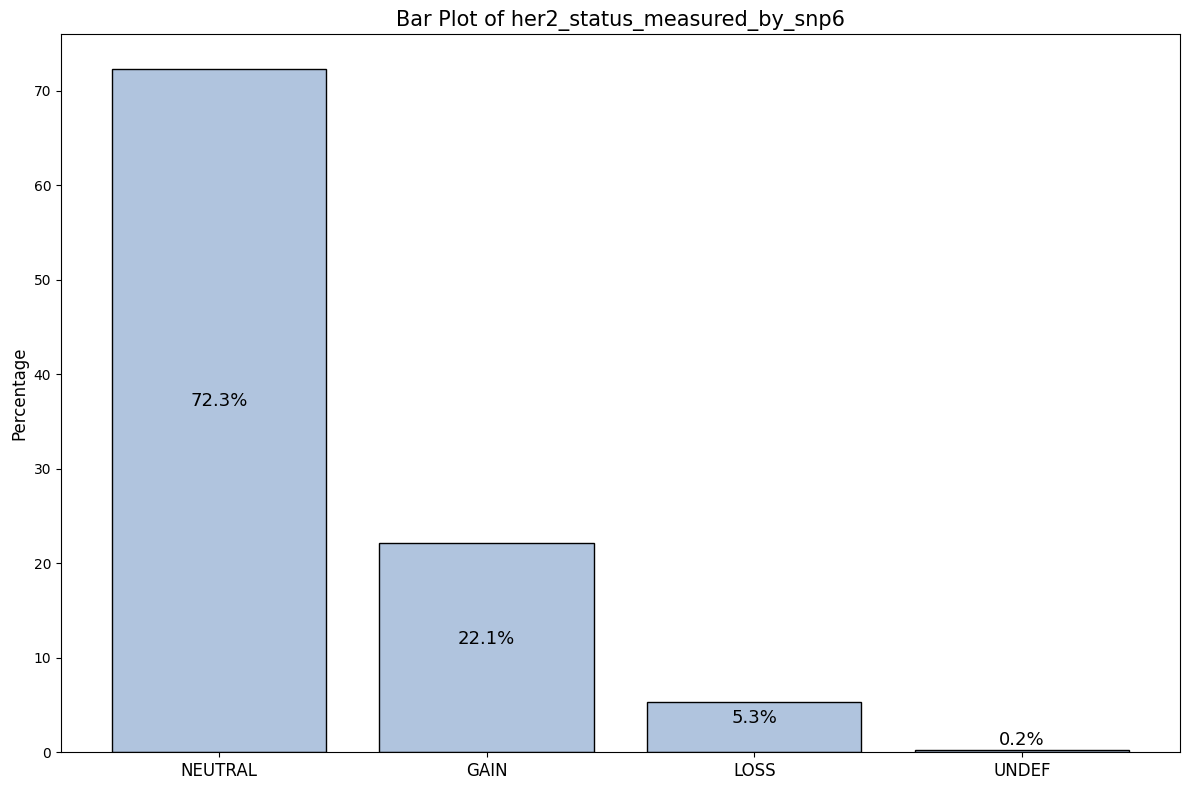

In [73]:
plot_category_bar(metabric_data[col], 13)

In [74]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 544)

#### 'her2_status'

La variable 'her2_status' indica si el cáncer es positivo o negativo para la amplificación/sobreexpresión de HER2.

La variable toma dos valores:

* Positivo: Indica la presencia de amplificación o sobreexpresión de HER2 en las células cancerosas.
Generalmente sugiere un cáncer más agresivo, pero también uno que podría responder bien a las terapias dirigidas a HER2.
* Negativo: Indica la ausencia de amplificación o sobreexpresión significativa de HER2.
Esta clasificación suele implicar que el cáncer tiene menos probabilidades de beneficiarse de tratamientos específicos para HER2

Evaluando los valores obtenidos vemos que el 12,5 % de los casos son positivos.

In [75]:
col = metabrics_categorical_col[12]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna her2_status no contiene valores nulos ni NA.


In [76]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Negative,1603,87.5
1,Positive,229,12.5


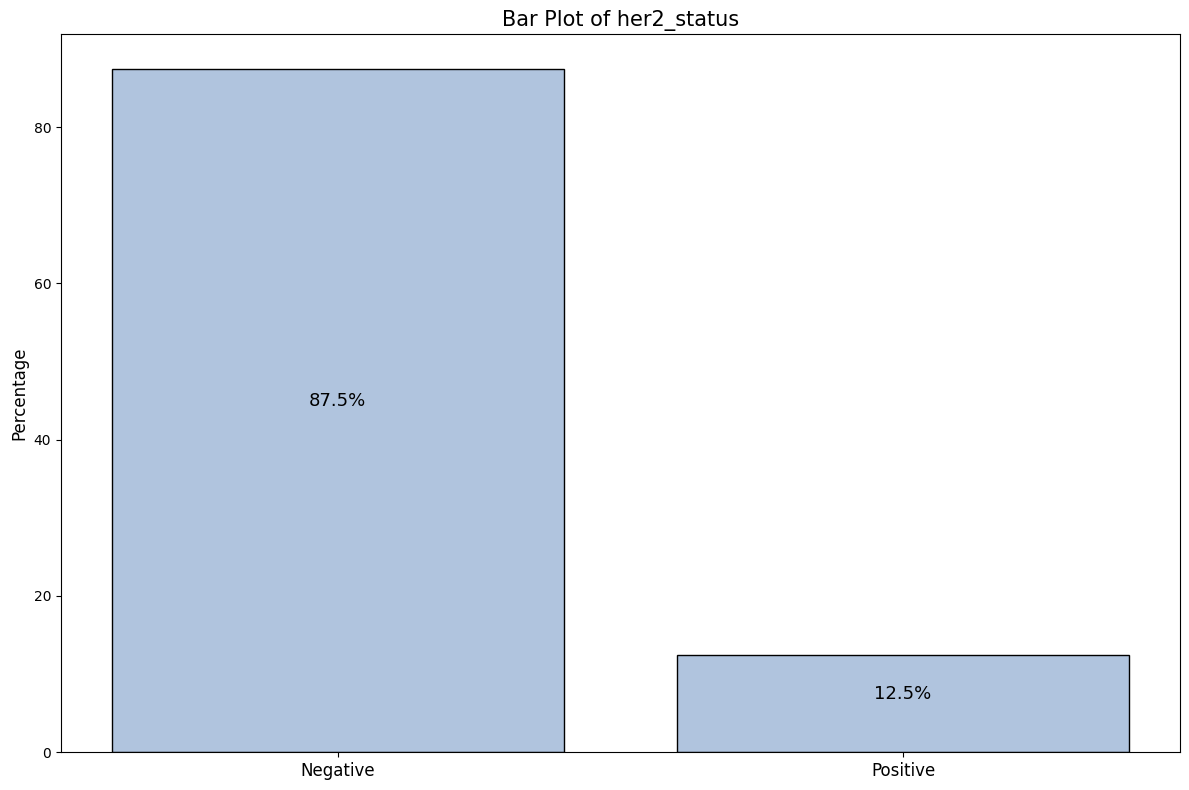

In [77]:
plot_category_bar(metabric_data[col], 13)

In [78]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 545)

#### 'tumor_other_histologic_subtype'

La variable 'tumor_other_histologic_subtype' muestra la distribución de casos por subtipo histológico adicional del tumor.
El subtipo más común es "Ductal/NST" (No Special Type) con 1406 registros, representando aproximadamente el 77% de los casos.
Le siguen en frecuencia "Mixed" (199 registros, 11%), "Lobular" (132 registros, 7.2%), "Medullary" (25 registros, 1.36%), "Mucinous" y "Tubular/cribriform" (21 registros, 1.15%)

Esta variable tiene 15 registros sin identificar, en este caso también utilizaremos la estrategia de imputación basada en la proporción de frecuencia de los subtipos conocidos para imputar los valores. Esto significa que los subtipos más comunes tendrán una mayor probabilidad de ser seleccionados como valores imputados, mientras que los subtipos menos comunes tendrán una menor probabilidad, reflejando así la distribución observada en los datos.


In [79]:
col = metabrics_categorical_col[13]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna tumor_other_histologic_subtype contiene 14 valores nulos o NA.


In [80]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Ductal/NST,1406,76.75
1,Mixed,199,10.86
2,Lobular,132,7.21
3,Medullary,25,1.36
4,Tubular/ cribriform,21,1.15
5,Mucinous,21,1.15
6,Other,14,0.76
7,NaN,14,0.76


In [81]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Ductal/NST,1417,77.35
1,Mixed,200,10.92
2,Lobular,132,7.21
3,Medullary,25,1.36
4,Tubular/ cribriform,22,1.20
5,Mucinous,22,1.20
6,Other,14,0.76


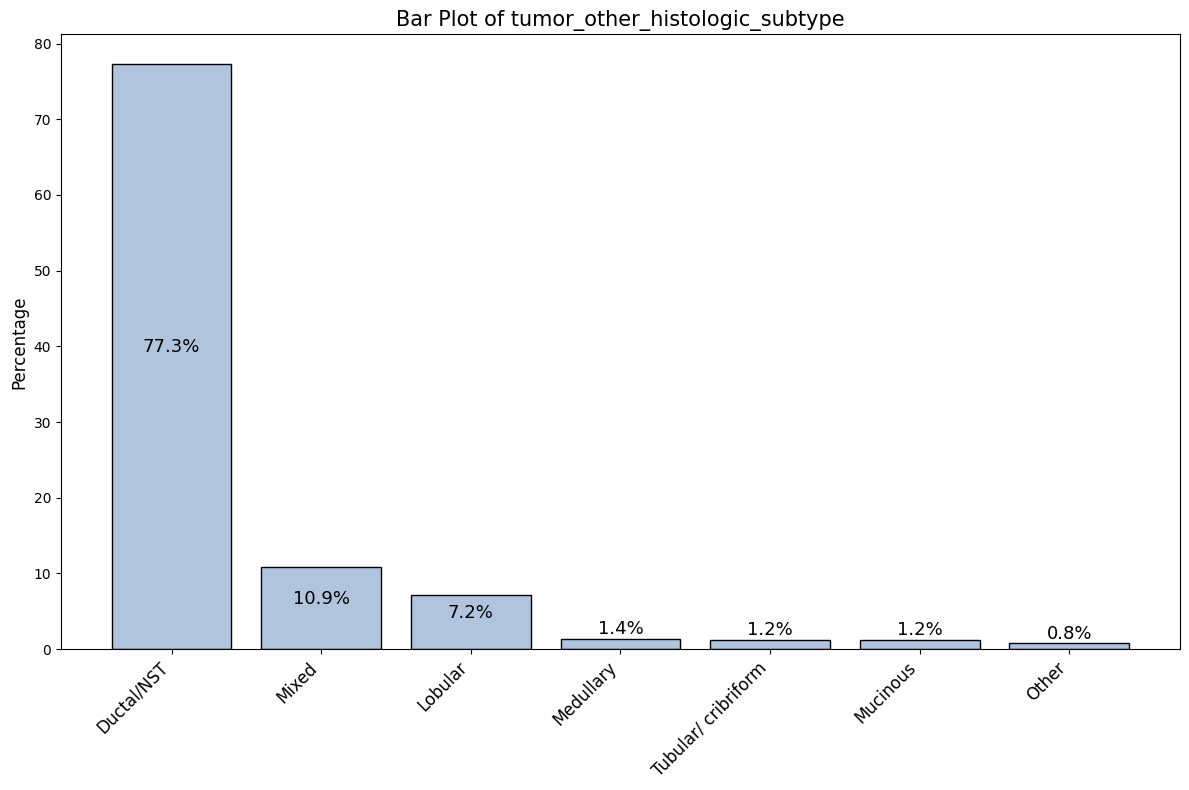

In [82]:
plot_category_bar(metabric_data[col], 13)

In [83]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 551)

#### 'inferred_menopausal_state'

El 77% de los casos de este conjunto de datos son pacientes post menopaucicas.

In [84]:
col = metabrics_categorical_col[14]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna inferred_menopausal_state no contiene valores nulos ni NA.


In [85]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Post,1427,77.89
1,Pre,405,22.11


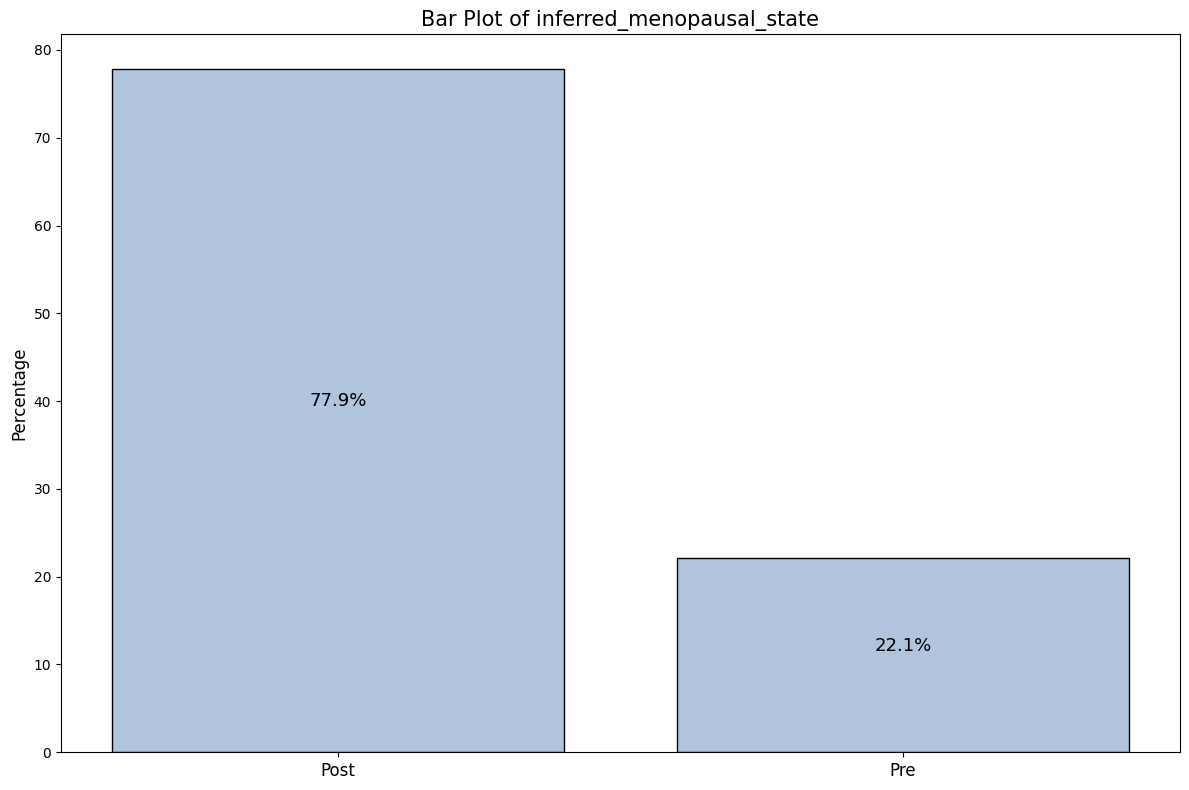

In [86]:
plot_category_bar(metabric_data[col], 13)

In [87]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 552)

#### 'integrative_cluster'

La variable 'integrative_cluster' representa el subtipo molecular del cáncer basado en la expresión de algunos genes.
Los valores que toma la variable corresponden a diferentes subtipos identificados mediante un análisis de agrupamiento integrativo que combina información de la expresión de múltiples genes para identificar grupos de tumores con características similares.

In [88]:
col = metabrics_categorical_col[15]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna integrative_cluster no contiene valores nulos ni NA.


In [89]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,8,271,14.79
1,3,268,14.63
2,4ER+,233,12.72
3,10,218,11.90
4,5,180,9.83
5,7,176,9.61
6,9,136,7.42
7,1,129,7.04
8,6,81,4.42
9,4ER-,70,3.82


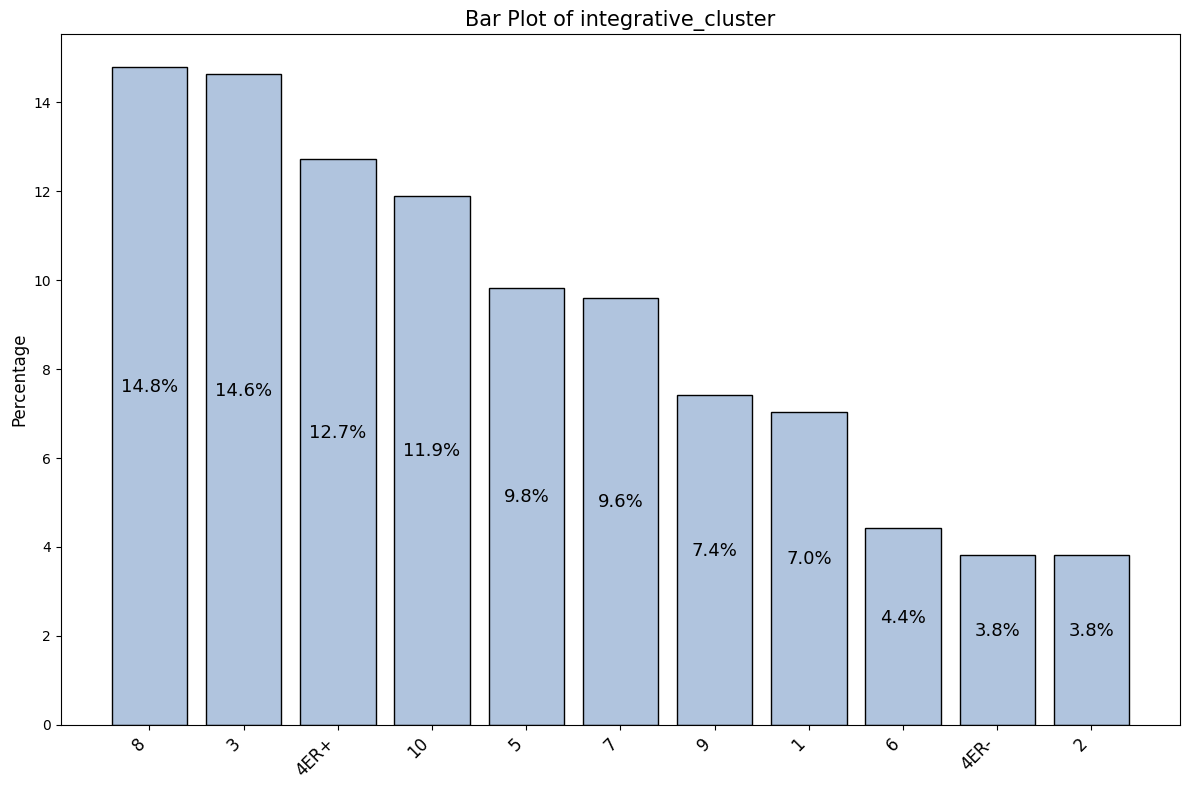

In [90]:
plot_category_bar(metabric_data[col], 13)

In [91]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 562)

#### 'primary_tumor_laterality'

La variable 'primary_tumor_laterality' indica cuál de las mamas está involucrada. Vemos que en el dataset aproximadamente la mitad de los casos involucran la mama izquierda y un 45% a la derecha.
Esta variable contiene aproximadamente 6% (106 casos) de valores faltantes. Los imputaremos con la estrategia de proporción de valores conocidos.

In [92]:
col = metabrics_categorical_col[16]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna primary_tumor_laterality contiene 103 valores nulos o NA.


In [93]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Left,894,48.80
1,Right,835,45.58
2,NaN,103,5.62


In [94]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Left,953,52.02
1,Right,879,47.98


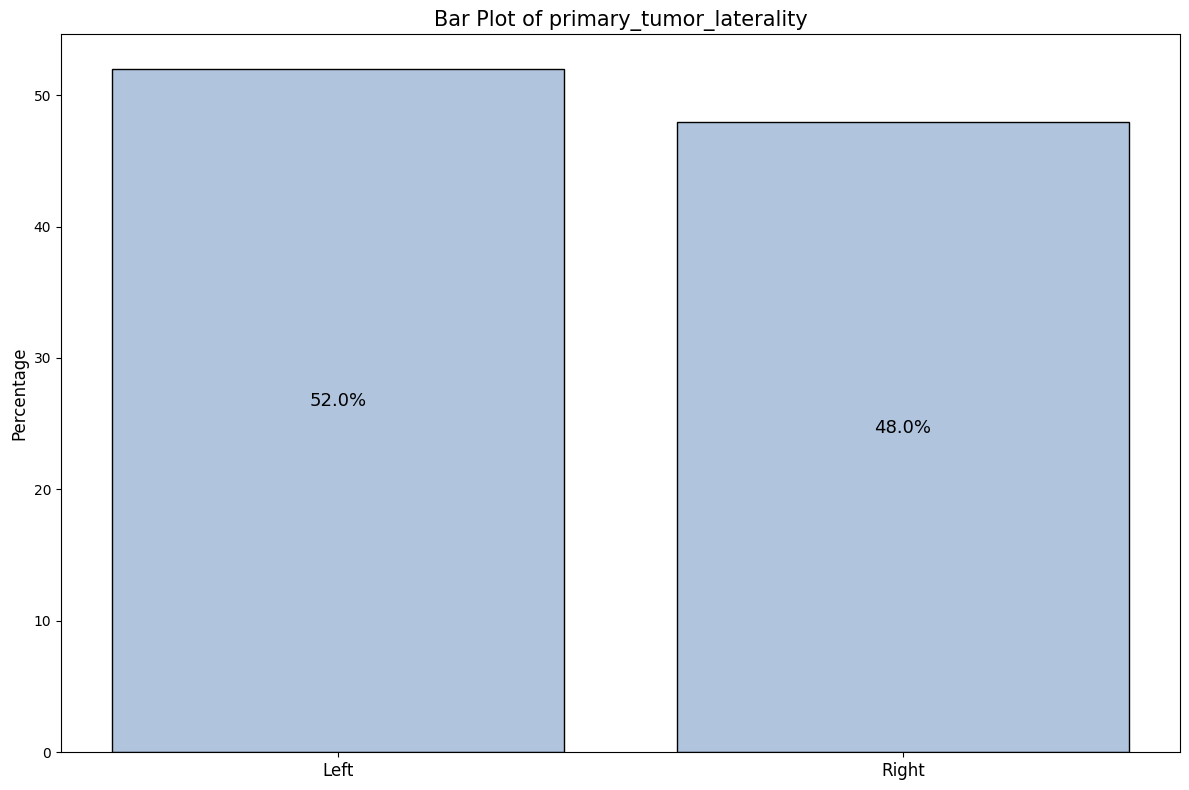

In [95]:
plot_category_bar(metabric_data[col], 13)

In [96]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 563)

#### 'oncotree_code'

La variable 'oncotree_code' representa el código de diagnóstico del tipo de cáncer según la ontología OncoTree.
OncoTree es un sistema de clasificación de código abierto creado por el Memorial Sloan Kettering Cancer Center (MSK) para estandarizar los diagnósticos de tipos de cáncer desde una perspectiva clínica. A cada diagnóstico se le asigna un código OncoTree único para garantizar la coherencia y la facilidad de uso en la investigación y la atención médica.

Analizando la distribución de esta variable, IDC (Carcinoma Ductal Invasivo) es el tipo más común de cáncer de mama. Representa el 79.26% de los casos en el conjunto de datos.
En frecuencia le sigue MDLC (Carcinoma Ductal y Lobular Mixto), este tipo de cáncer de mama involucra tanto el carcinoma ductal como el carcinoma lobular.
Constituye aproximadament el 10.86% de los casos. Luego, el ILC (Carcinoma Lobular Invasivo), representa aproximadamente el 7.21% de los casos. Y por último, el IMMC (Carcinoma Mucinoso Mixto), constituye aproximadamente el 1.15% de los casos.

La categoría BREAST, que representa el 0.76% de los datos, entiendo que no es un diagnóstico específico de cáncer de mama, sino una clasificación general que parece ser un agrupamiento de diferentes subtipos de cáncer de mama. 
También vemos que hay 14 registros vacíos, imputaremos estos valores faltantes de manera proporcional a la frecuencia de los tipos de cáncer conocidos.

In [97]:
col = metabrics_categorical_col[17]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna oncotree_code contiene 14 valores nulos o NA.


In [98]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,IDC,1452,79.26
1,MDLC,199,10.86
2,ILC,132,7.21
3,IMMC,21,1.15
4,BREAST,14,0.76
5,NaN,14,0.76


In [99]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,IDC,1462,79.80
1,MDLC,202,11.03
2,ILC,133,7.26
3,IMMC,21,1.15
4,BREAST,14,0.76


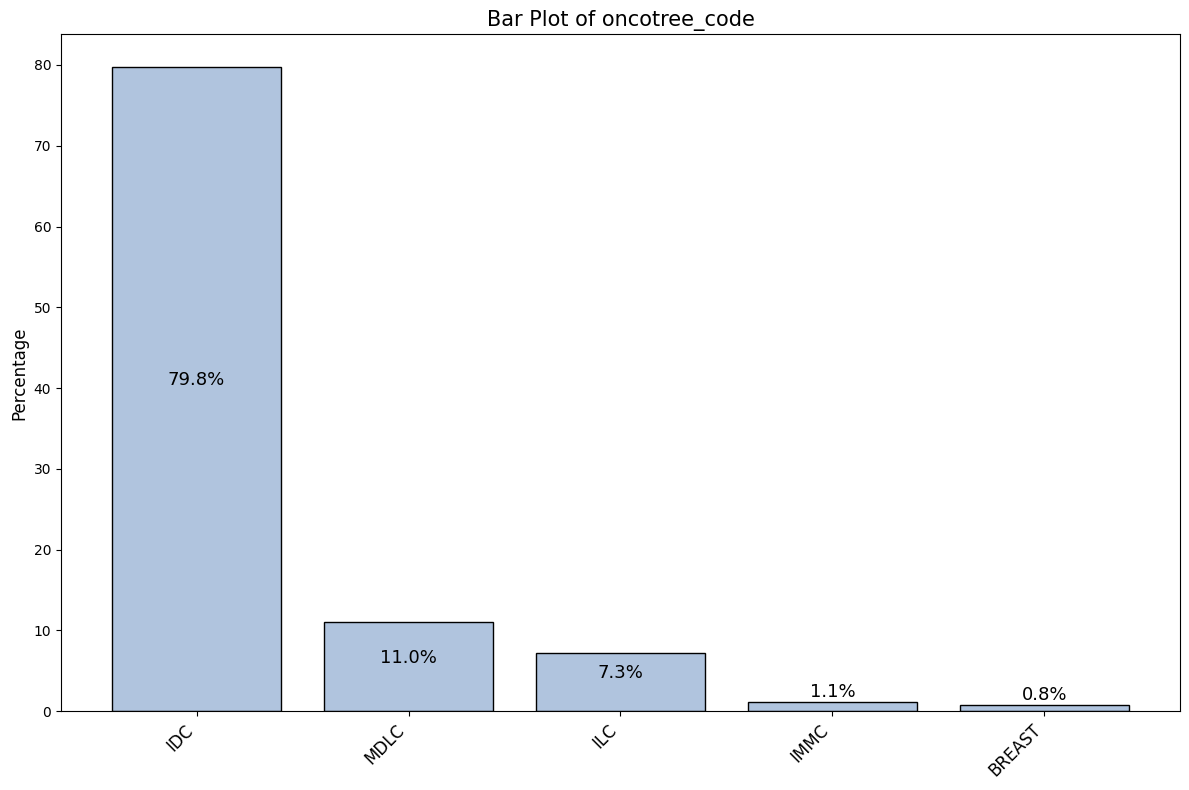

In [100]:
 plot_category_bar(metabric_data[col], 13)

In [101]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 567)

#### 'pr_status'

La variable 'pr_status' indica si las células cancerígenas son positivas o negativas para los receptores de progesterona. Los receptores de progesterona son proteínas en la superficie de las células cancerosas que pueden unirse a la hormona progesterona. La presencia o ausencia de estos receptores puede ser relevante para determinar el pronóstico del cáncer y para guiar el tratamiento.


In [102]:
col = metabrics_categorical_col[18]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna pr_status no contiene valores nulos ni NA.


In [103]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Positive,959,52.35
1,Negative,873,47.65


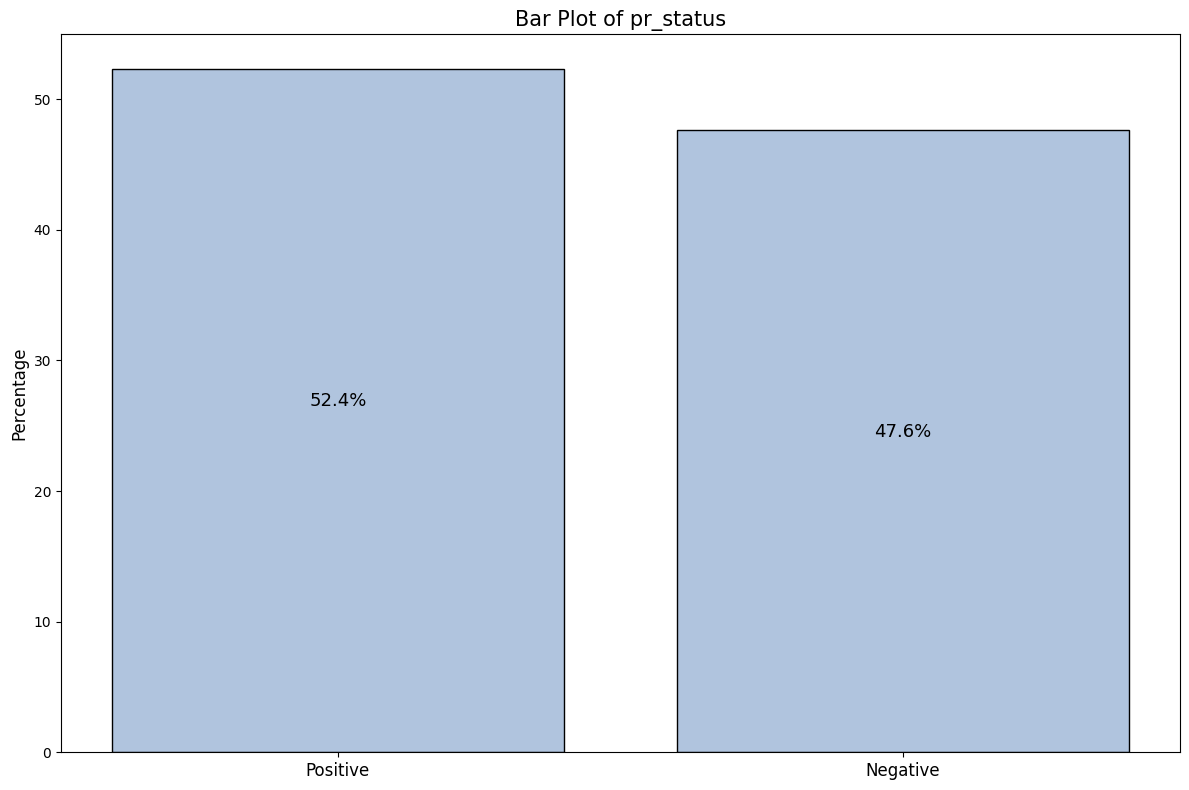

In [104]:
 plot_category_bar(metabric_data[col], 13)

In [105]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 568)

#### '3.gene_classifier_subtype'


La variable '3-gene_classifier_subtype' clasifica los tumores de cáncer de mama según los niveles de expresión de tres genes: receptor de estrógeno (ER), receptor de progesterona (RP) y HER2:

* ER (receptor de estrógeno): Algunos cánceres de mama dependen del estrógeno para crecer. Si un tumor es ER positivo, significa que las células cancerosas tienen receptores de estrógeno y pueden responder a la terapia hormonal.
* RP (receptor de progesterona): Similar al ER, los tumores RP positivos pueden beneficiarse de la terapia hormonal.
* HER2: Este gen es responsable de la producción de una proteína que puede promover el crecimiento de las células cancerosas. Los tumores HER2 positivos tienden a ser más agresivos.

En cuanto a la distriución de los datos en el dataset:
- ER+/HER2- Low Prolif (584 casos): Estos tumores son RE positivos y HER2 negativos, con una tasa de proliferación baja (lo que significa que las células cancerosas se dividen lentamente). Esto podría indicar un pronóstico más favorable.
- ER+/HER2- High Prolif (582 casos): Similar a la categoría anterior, pero con una tasa de proliferación alta, lo que sugiere un curso potencialmente más agresivo.
- ER-/HER2- (286 casos): Estos tumores son RE negativos y HER2 negativos. Es posible que no respondan a la terapia hormonal, pero podrían ser candidatas a otras opciones de tratamiento.
- HER2+ (185 casos): Estos tumores son HER2 positivos, lo que indica potencial para un cáncer más agresivo y la posibilidad de beneficiarse de terapias dirigidas a HER2.
- Valores nulos (195 casos): Imputaremos los valores faltantes proporcionalmente a la distribución de los subtipos existentes.


In [106]:
col = metabrics_categorical_col[19]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna 3-gene_classifier_subtype contiene 195 valores nulos o NA.


In [107]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,ER+/HER2- Low Prolif,584,31.88
1,ER+/HER2- High Prolif,582,31.77
2,ER-/HER2-,286,15.61
3,NaN,195,10.64
4,HER2+,185,10.10


In [108]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,ER+/HER2- Low Prolif,653,35.64
1,ER+/HER2- High Prolif,651,35.53
2,ER-/HER2-,321,17.52
3,HER2+,207,11.30


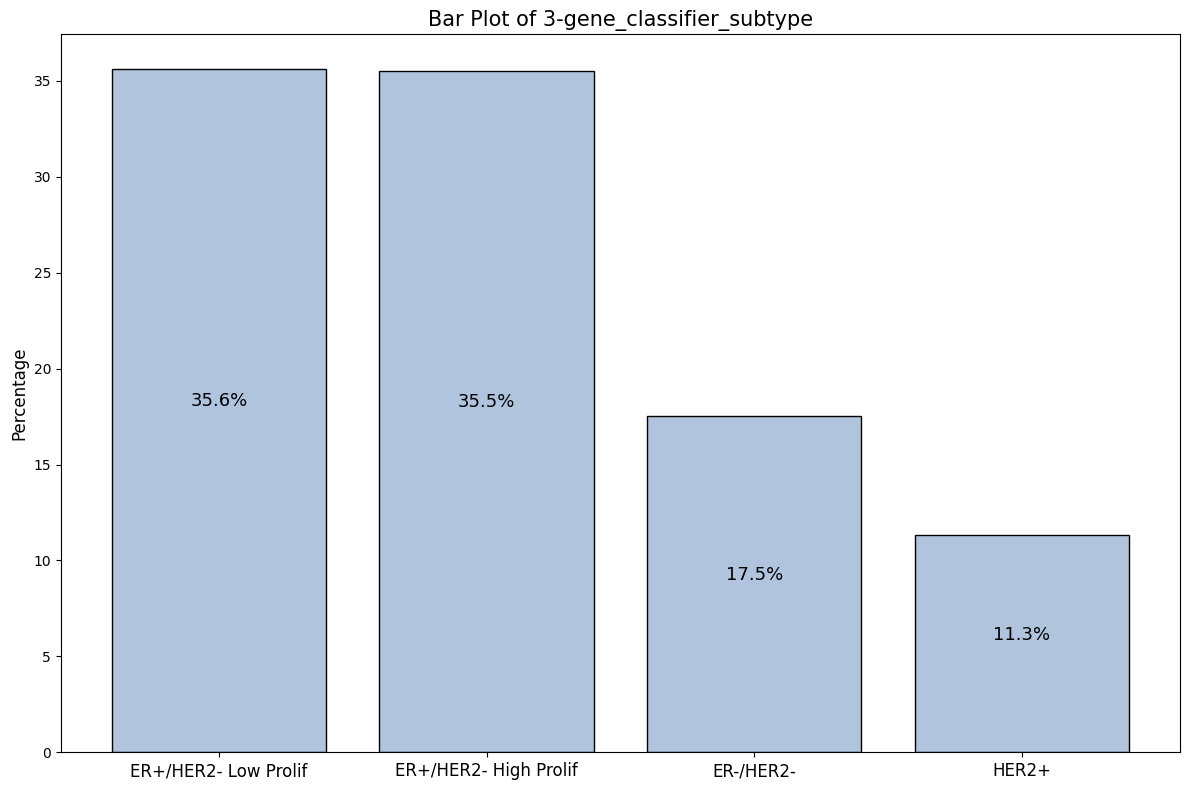

In [109]:
 plot_category_bar(metabric_data[col], 13)

In [110]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 571)

#### 'overall_survival'

La variable 'overall_survival' representa si el paciente está vivo o muerto al final del período de estudio. Los resultados muestran que el 57.48% de los pacientes están clasificados como '0', lo que indica que están muertos, mientras que el 42.52% están clasificados como '1', lo que significa que al momento de tomar los datos estaban vivos. Esto indica una distribución relativamente equilibrada entre pacientes vivos y fallecidos en el conjunto de datos.

In [111]:
col = metabrics_categorical_col[20]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna overall_survival no contiene valores nulos ni NA.


In [112]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,0,1053,57.48
1,1,779,42.52


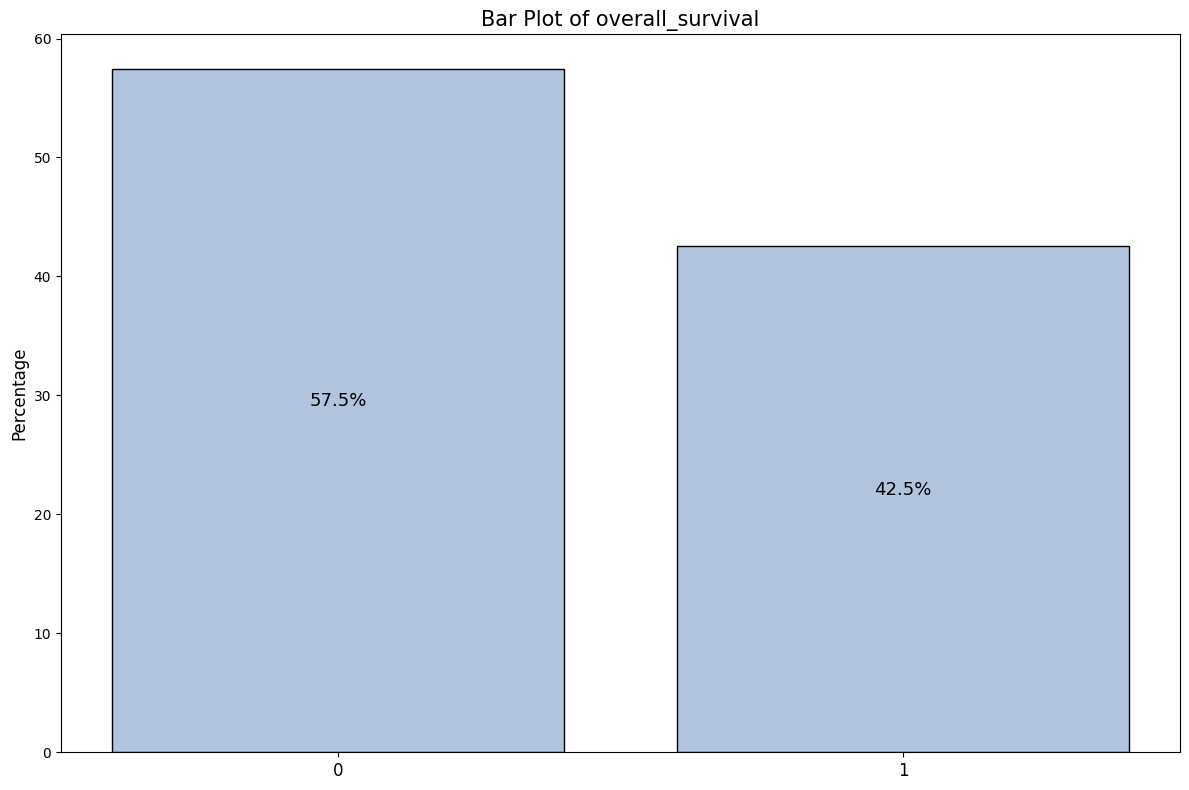

In [113]:
 plot_category_bar(metabric_data[col], 13)

In [114]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 572)

#### 'death_from_cancer'

La variable "death_from_cancer" describe si los pacientes murieron a causa del cáncer, de otras enfermedades o si aún están vivos. Según los datos proporcionados, el 42.52% de los pacientes están vivos, mientras que el 33.08% murió a causa de la enfermedad. Además, el 24.34% de los pacientes fallecieron por otras causas distintas al cáncer, y hay un pequeño porcentaje de pacientes (0.05%) que no están clasificados claramente en ninguna de estas categorías, imputaremos estos valores utilizando la estrategia de proporción. 

In [115]:
col = metabrics_categorical_col[21]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna death_from_cancer contiene 1 valores nulos o NA.


In [116]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Living,779,42.52
1,Died of Disease,606,33.08
2,Died of Other Causes,446,24.34
3,NaN,1,0.05


In [117]:
# Imputo valores nulos de forma proporional
metabric_data[col] = impute_missing_proportionally(metabric_data[col])
category_summary(metabric_data[col])

,Category,Count,Percentage
0,Living,780,42.58
1,Died of Disease,606,33.08
2,Died of Other Causes,446,24.34


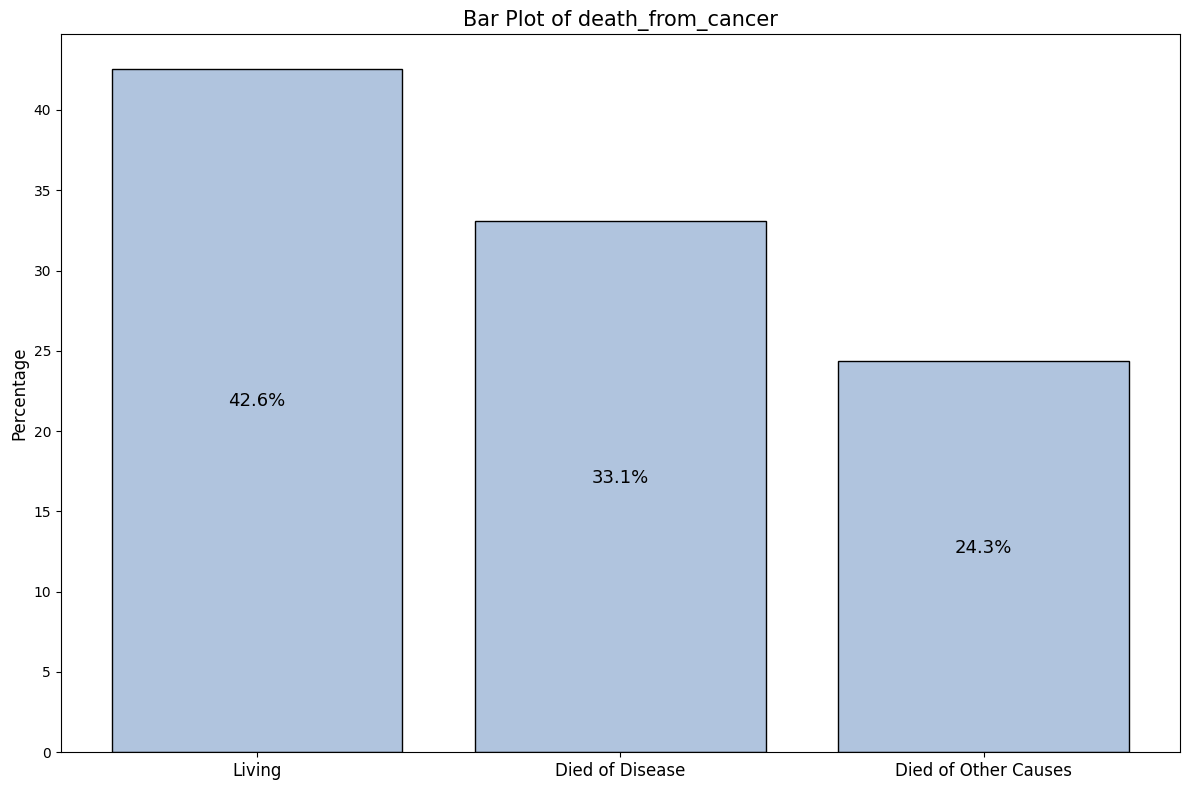

In [118]:
 plot_category_bar(metabric_data[col], 13)

In [119]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 574)

#### 'cohort'

In [120]:
col = metabrics_categorical_col[22]
if metabric_data[col].isna().any():
    null_count = metabric_data[col].isna().sum()
    print(f"La columna {col} contiene {null_count} valores nulos o NA.")
else:
    print(f"La columna {col} no contiene valores nulos ni NA.")

La columna cohort no contiene valores nulos ni NA.


In [121]:
category_summary(metabric_data[col])

,Category,Count,Percentage
0,3.0,689,37.61
1,1.0,467,25.49
2,2.0,283,15.45
3,4.0,227,12.39
4,5.0,166,9.06


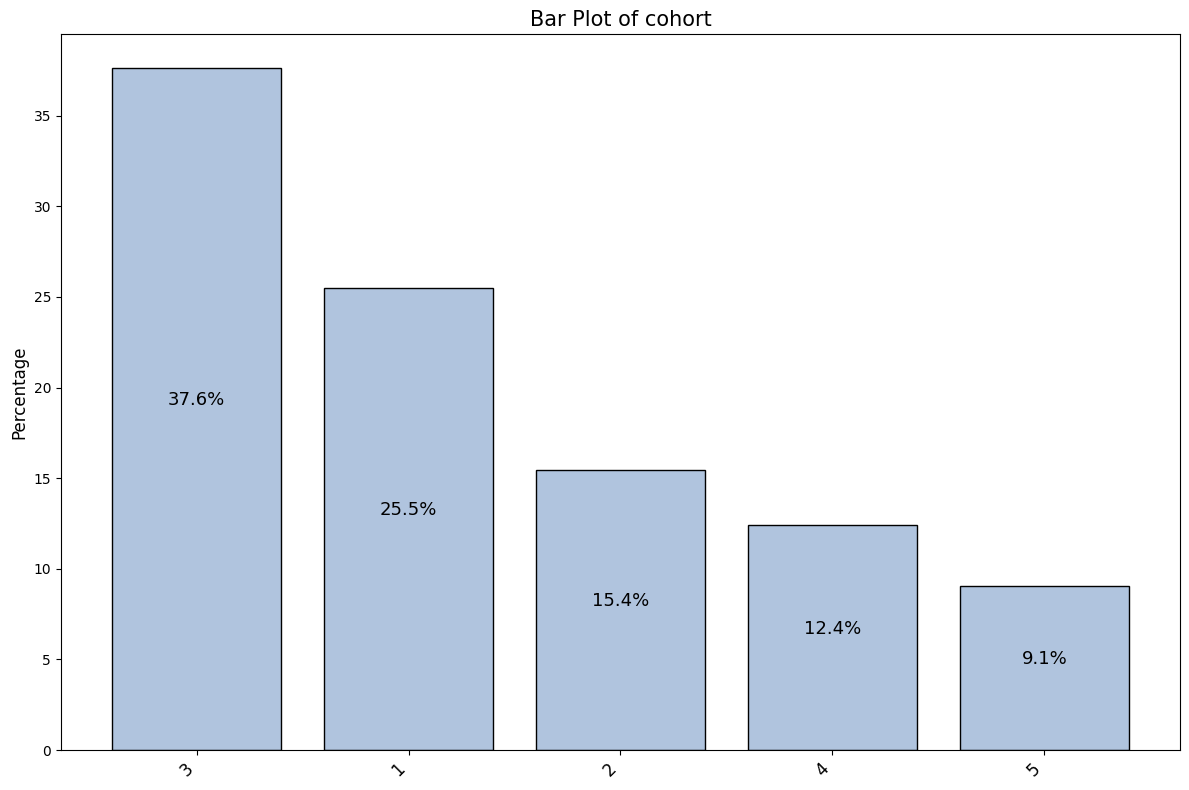

In [122]:
 plot_category_bar(metabric_data[col], 13)

In [123]:
# Realizar la codificación one-hot de la columna categórica y reemplazar la columna original
metabric_data = one_hot_encode(metabric_data[col], metabric_data)
metabric_data.shape

(1832, 578)

In [124]:
#Elimino la columna patient_id ya que no añade informacion adicional:
metabric_data.drop(columns=['patient_id'], inplace=True)

In [125]:
metabric_data.head()

,age_at_diagnosis,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,tumor_stage,brca1,brca2,...,overall_survival_0,overall_survival_1,death_from_cancer_Died of Disease,death_from_cancer_Died of Other Causes,death_from_cancer_Living,cohort_1.0,cohort_2.0,cohort_3.0,cohort_4.0,cohort_5.0
0,1.122359,3.0,1.960788,-0.169839,1.757557,0.201518,-0.278813,0.333732,-1.3990,-0.5738,...,False,True,False,False,True,True,False,False,False,False
1,-1.379317,3.0,-0.490841,-0.917810,-0.011378,-0.530544,-1.074529,-1.481770,-1.3800,0.2777,...,False,True,False,False,True,True,False,False,False,False
2,-0.941562,2.0,-0.245678,-0.917810,-0.002638,0.505525,-0.742981,0.333732,0.0670,-0.8426,...,True,False,True,False,False,True,False,False,False,False
3,-1.033275,2.0,0.244648,-1.167134,0.014841,0.521686,-0.079884,0.333732,0.6744,-0.5428,...,False,True,False,False,True,True,False,False,False,False
4,1.224091,3.0,1.470462,-0.917810,1.789021,-1.097499,0.914762,0.333732,1.2932,-0.9039,...,True,False,True,False,False,True,False,False,False,False


In [126]:
print(metabric_data.iloc[:, :15].dtypes)


age_at_diagnosis                 float64
neoplasm_histologic_grade        float64
lymph_nodes_examined_positive    float64
mutation_count                   float64
nottingham_prognostic_index      float64
overall_survival_months          float64
tumor_size                       float64
tumor_stage                      float64
brca1                            float64
brca2                            float64
palb2                            float64
pten                             float64
tp53                             float64
atm                              float64
cdh1                             float64
dtype: object


### Matriz de correlación:

In [127]:
metabrics_numeric_col_matrix = ['neoplasm_histologic_grade', 'age_at_diagnosis', 'lymph_nodes_examined_positive', 'nottingham_prognostic_index', 'overall_survival_months', 'mutation_count', 'tumor_size', 'tumor_stage']
numeric_data = metabric_data[metabrics_numeric_col_matrix]

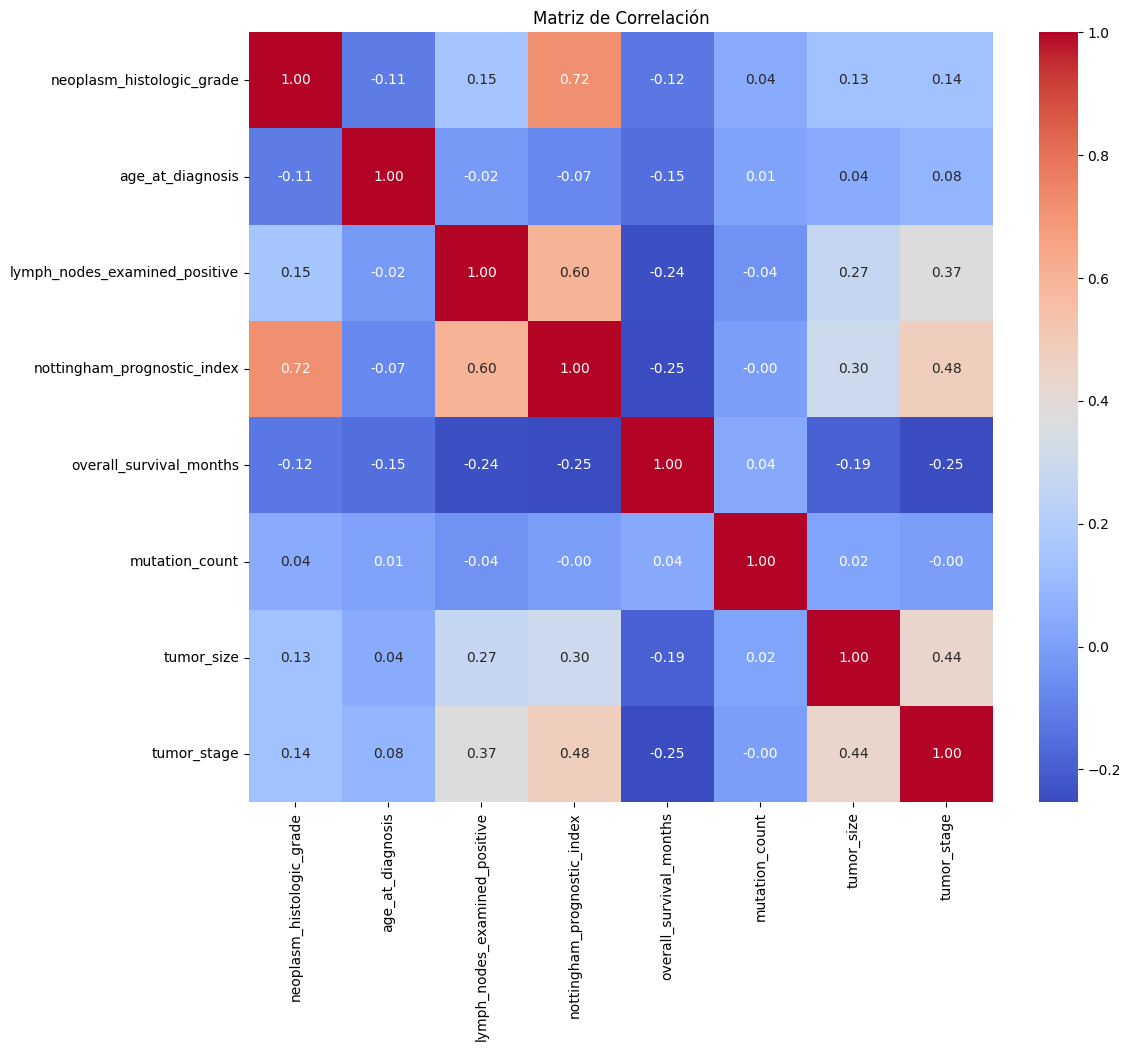

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = numeric_data.corr()

# Configura el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añade título
plt.title('Matriz de Correlación')

# Muestra el gráfico
plt.show()


Analizando la matriz de correlación vemos que la correlación positiva más fuerte, de 0.72, se da entre las variables neoplasm_histologic_grade y nottingham_prognostic_index.
Es posible que las características histológicas de un neoplasma estén estrechamente relacionadas con su pronóstico. El "neoplasm_histologic_grade" describe el grado de diferenciación de las células cancerosas, mientras que el "nottingham_prognostic_index" es un índice pronóstico utilizado para predecir el resultado clínico en pacientes con cáncer de mama. Es probable que haya una relación biológica intrínseca entre la agresividad del tumor (reflejada en el grado histológico) y su pronóstico futuro.

La siguiente correlación positiva alta, de 0.6, se da entre las variables nottingham_prognostic_index y lymph_nodes_examined_positive. Esto puede deberse a que cuanto mayor sea el "nottingham_prognostic_index", que incorpora múltiples factores pronósticos, mayor sea la carga de ganglios linfáticos positivos, lo que sugiere una mayor progresión del cáncer.

Por último, la siguiente correlación positiva, de 0.48, la vemos entre las variables nottingham_prognostic_index y tumor_stage. Es probable que a medida que aumenta la gravedad del cáncer (reflejada en el estadio del tumor), también aumente el índice pronóstico de Nottingham.

### Test estadísticos:

#### Test Chi Cuadrado

El test de chi-cuadrado se utiliza para evaluar la independencia entre dos variables categóricas. En este caso, la hipótesis nula (H0) establece que no hay asociación significativa entre las dos variables, lo que significa que son independientes entre sí. Por otro lado, la hipótesis alternativa (H1) sugiere que existe una asociación significativa entre las dos variables, lo que significa que no son independientes y que la ocurrencia de una variable está relacionada con la ocurrencia de la otra.

Cuando realizamos un test de chi-cuadrado, calculamos un valor p que nos indica la probabilidad de observar una asociación tan fuerte o más extrema entre las dos variables si la hipótesis nula fuera verdadera. Si el valor p es menor que nuestro nivel de significancia (generalmente 0.05), rechazamos la hipótesis nula y concluimos que hay evidencia suficiente para sugerir que hay una asociación significativa entre las dos variables.

En resumen, al aplicar el test de chi-cuadrado, estamos evaluando si hay suficiente evidencia para rechazar la idea de que las dos variables son independientes y, en su lugar, sugerimos que existe una relación significativa entre ellas.

In [129]:
metabrics_categorical_col = ("type_of_breast_surgery","cancer_type","cancer_type_detailed", "cellularity", "neoplasm_histologic_grade"
,"chemotherapy","hormone_therapy","radio_therapy",  "pam50_+_claudin-low_subtype", "er_status_measured_by_ihc"
,"er_status","her2_status_measured_by_snp6","her2_status","tumor_other_histologic_subtype",
"inferred_menopausal_state","integrative_cluster","primary_tumor_laterality" ,"oncotree_code", "pr_status", 
"3-gene_classifier_subtype" ,"overall_survival", "death_from_cancer", "cohort")

In [130]:
from scipy.stats import chi2_contingency

# Variable objetivo
target_variable = 'neoplasm_histologic_grade'

# Itera sobre cada variable categórica
for categorical_var in metabrics_categorical_col:
    # Crea una tabla de contingencia
    contingency_table = pd.crosstab(full_metabric_data[categorical_var], full_metabric_data[target_variable])
    
    # Aplica el test de chi-cuadrado
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Imprime los resultados
    print(f'Variable categórica: {categorical_var}')
    print(f'Valor p del test de chi-cuadrado: {p}')
    if p < 0.05:
        print('Hay una asociación significativa entre la variable categórica y la variable objetivo.')
    else:
        print('No hay una asociación significativa entre la variable categórica y la variable objetivo.')
    print('\n')


Variable categórica: type_of_breast_surgery
Valor p del test de chi-cuadrado: 0.11946623352766698
No hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: cancer_type
Valor p del test de chi-cuadrado: 1.0
No hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: cancer_type_detailed
Valor p del test de chi-cuadrado: 3.845866233848849e-18
Hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: cellularity
Valor p del test de chi-cuadrado: 0.005529934664602969
Hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: neoplasm_histologic_grade
Valor p del test de chi-cuadrado: 0.0
Hay una asociación significativa entre la variable categórica y la variable objetivo.


Variable categórica: chemotherapy
Valor p del test de chi-cuadrado: 6.109548527703652e-37
Hay una asociación signi

Analizando los resultados obtenidos para el primer grupo de variables, que incluye type_of_breast_surgery y cancer_type, los resultados obtenidos indican que no hay una asociación significativa entre estas variables categóricas y la variable objetivo. Esto implica que no tenemos suficiente evidencia para rechazar la hipótesis nula de independencia entre estas variables y la variable objetivo.

Por otro lado, para el segundo grupo de variables que incluye cancer_type_detailed, cellularity, neoplasm_histologic_grade, chemotherapy, hormone_therapy, radio_therapy, pam50_+_claudin-low_subtype, er_status_measured_by_ihc, er_status, her2_status_measured_by_snp6, her2_status, tumor_other_histologic_subtype, inferred_menopausal_state, integrative_cluster, oncotree_code, pr_status, 3-gene_classifier_subtype, overall_survival, death_from_cancer, y cohort, los resultados muestran que hay una asociación significativa entre estas variables categóricas y la variable objetivo. Por lo tanto, tenemos evidencia suficiente para rechazar la hipótesis nula en estos casos, lo que sugiere que estas variables están relacionadas de manera significativa con la variable objetivo en nuestro conjunto de datos.

#### Analysis of Variance: Anova

Como paso previo al desarrollo de los modelos de machine learning para la clasificación de las muestras según su grado histológico, se realizó un análisis de varianza (ANOVA) para identificar los genes cuya expresión varía significativamente entre los diferentes grados histológicos de los tumores de mama. Este análisis preliminar tiene como objetivo destacar los genes que podrían ser más relevantes para la clasificación, reduciendo así la dimensionalidad de los datos y mejorando la eficiencia de los modelos de redes neuronales.

Primero, divideremos los datos de expresión génica en subconjuntos basados en los diferentes grados histológicos presentes en la variable 'neoplasm_histologic_grade'. Luego, para cada gen, se aplicará la prueba ANOVA, que compara la varianza de la expresión génica entre los distintos grados histológicos. Los resultados de la prueba incluyen el estadístico F y el valor p para cada gen, permitiendo identificar aquellos genes con diferencias de expresión significativas entre los grados histológicos. Al filtrar los genes con valores p menores a un umbral predefinido (en este caso: 0.05), se seleccionarán los genes más relevantes. Este enfoque permite reducir la dimensionalidad de los datos, mejorando la eficiencia y la interpretabilidad de los modelos de machine learning que se desarrollarán posteriormente. La identificación preliminar de genes relevantes mediante ANOVA proporciona una base sólida para validar y comparar los resultados obtenidos con las redes neuronales, asegurando una mayor robustez y consistencia en los hallazgos del estudio.

In [131]:
from scipy.stats import f_oneway

expression_data = metabric_data.iloc[:,9:497]  # Columns with gene expression information
target_variable = metabric_data['neoplasm_histologic_grade']

# Dividir los datos de expresión génica según los diferentes grados histológicos
grades = target_variable.unique()
expression_data_by_grade = {grade: expression_data[target_variable == grade] for grade in grades}

# Realizar ANOVA para cada gen
anova_results = {}
for gene in expression_data.columns:
    samples = [expression_data_by_grade[grade][gene].dropna() for grade in grades]
    anova_results[gene] = f_oneway(*samples)

# Convertir los resultados de ANOVA a un DataFrame
anova_results_df = pd.DataFrame({
    'gene': anova_results.keys(),
    'F-statistic': [result.statistic for result in anova_results.values()],
    'p-value': [result.pvalue for result in anova_results.values()]
})

# Filtrar genes con p-value significativo (p < 0.05)
significant_genes = anova_results_df[anova_results_df['p-value'] < 0.05]

# Mostrar los resultados
significant_genes.head(10)

,gene,F-statistic,p-value
0,brca2,5.104909,6.153625e-03
2,pten,69.914642,5.510138e-30
5,cdh1,7.968603,3.583196e-04
6,chek2,90.470007,3.415798e-38
8,nf1,3.099930,4.528917e-02
10,bard1,37.450584,1.147175e-16
11,mlh1,26.970174,2.860210e-12
12,msh2,11.476324,1.114064e-05
13,msh6,109.882873,8.604413e-46
15,epcam,14.914701,3.757338e-07


#### Boxplot

Los gráficos que se muestran a continuación presentan la mediana y la dispersión de la expresión génica para cada uno de los genes más relevantes, separados por grado histológico. Además de la mediana, muestran los cuartiles que representan la variabilidad de los datos, junto con los posibles valores atípicos.

Cuando el promedio de expresión génica es positivo, significa que la expresión de ese gen en el tumor es mayor que la expresión promedio en la población de referencia. Esto sugiere que el gen está "sobreexpresado" en el tumor en comparación con la población de referencia.

Por otro lado, cuando el promedio de expresión génica es negativo, significa que la expresión de ese gen en el tumor es menor que la expresión promedio en la población de referencia. Esto sugiere que el gen está "subexpresado" en el tumor en comparación con la población de referencia.

En resumen, un promedio de expresión positivo indica una sobreexpresión del gen en el tumor, mientras que un promedio de expresión negativo indica una subexpresión del gen en el tumor en comparación con la población de referencia.

Al observar estos gráficos, se nota una tendencia general en la que la mediana de la expresión génica para el grado histológico 3 tiende a ser más alta que la del grado 2, y a su vez, la del grado 2 es mayor que la del grado 1. Esta tendencia sugiere una posible relación entre el grado histológico del tumor y la expresión de estos genes específicos. Sin embargo, es interesante notar que esta relación no es consistente para todos los genes.

De manera notable, se puede ver que para los genes APH1B, GATA3 y MAPT hay una inversión en la tendencia mencionada anteriormente. En lugar de aumentar con el grado histológico, la mediana de la expresión génica parece disminuir o mantenerse constante. Esta observación sugiere que estos genes pueden desempeñar un papel diferente en el contexto del grado histológico del tumor, lo que podría ser relevante para comprender mejor su progresión y características biológicas.

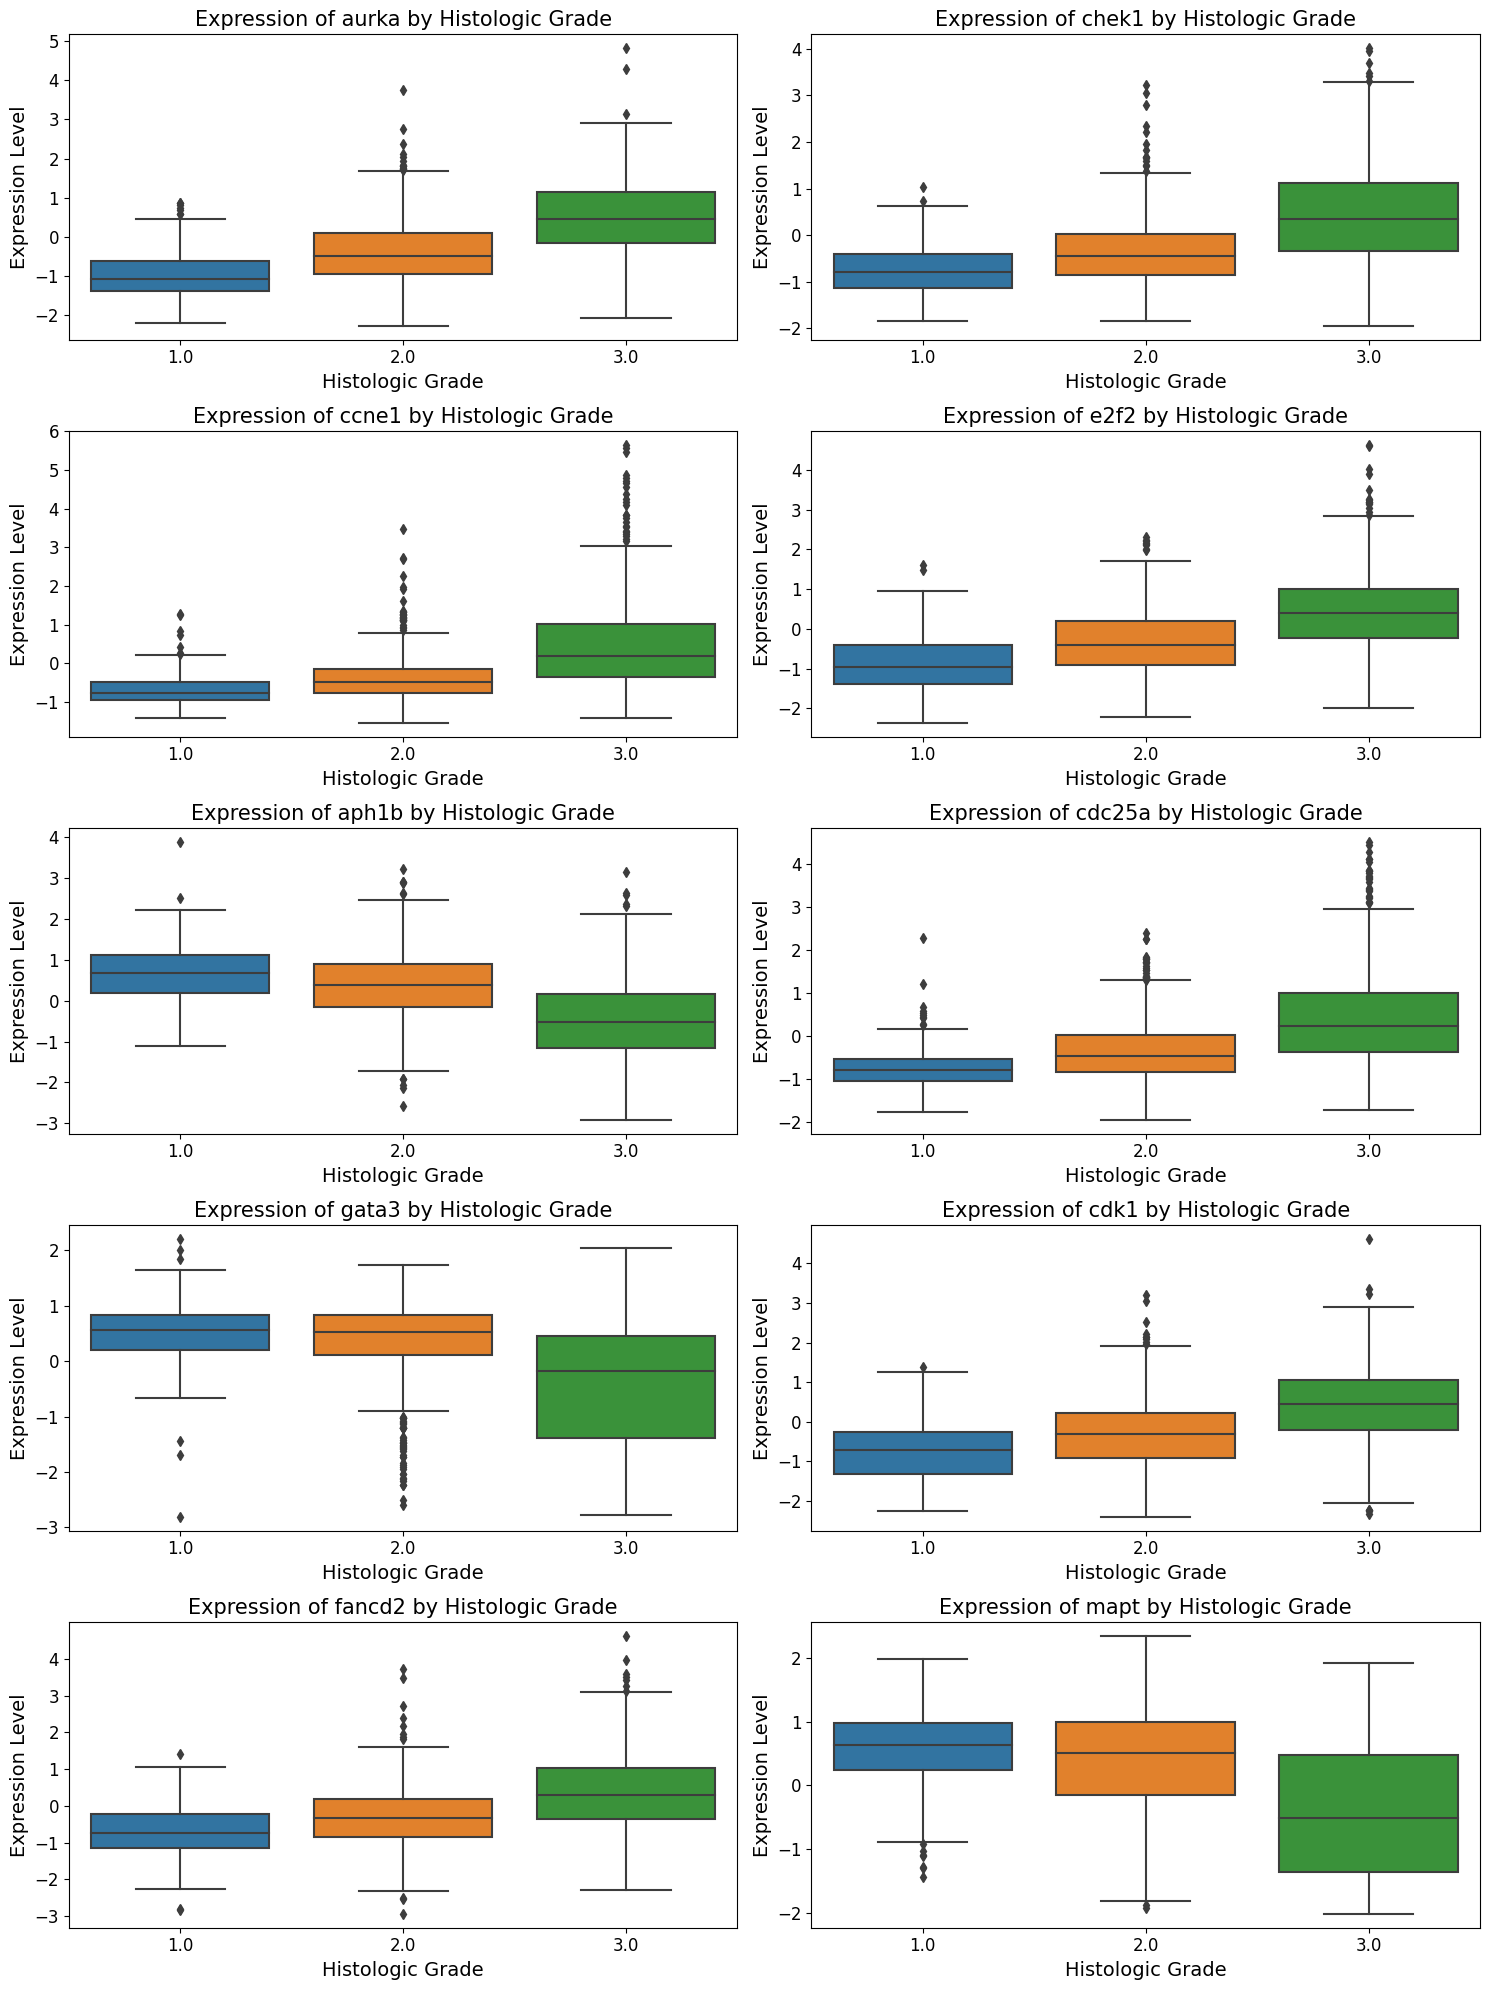

In [132]:
# Seleccionar los 10 genes más significativos
top_10_genes = significant_genes.nsmallest(10, 'p-value')['gene'].tolist()

# Crear un DataFrame para los 10 genes más significativos
top_10_expression_data = expression_data[top_10_genes].copy()
top_10_expression_data['Histologic Grade'] = target_variable

# Crear boxplots para los 10 genes más significativos
plt.figure(figsize=(15, 20))
for i, gene in enumerate(top_10_genes):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x='Histologic Grade', y=gene, data=top_10_expression_data)
    plt.title(f'Expression of {gene} by Histologic Grade', fontsize=15)
    plt.xlabel('Histologic Grade', fontsize=14)  
    plt.ylabel('Expression Level', fontsize=14) 
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

**Eliminamos los genes que han quedado fuera del listado de más relevantes del dataset**

In [133]:
# Lista con los genes excluidos
all_genes = expression_data.columns.tolist()
significant_genes_names = significant_genes['gene'].tolist()
genes_excluded = [gene for gene in all_genes if gene not in significant_genes_names]

In [134]:
# Eliminar los genes excluidos del dataset
metabric_data_all_genes = metabric_data.copy()
metabric_data= metabric_data.drop(columns=genes_excluded)

In [135]:
metabric_data.iloc[:,9:331]

,brca2,pten,cdh1,chek2,nf1,bard1,mlh1,msh2,msh6,epcam,...,serpini1,slc29a1,spry2,srd5a1,srd5a3,st7,tnk2,tulp4,ugt2b15,ugt2b17
0,-0.5738,1.4524,0.0348,0.1266,-0.8578,-1.1201,-0.4844,-0.7483,-1.6660,-0.3721,...,0.0052,0.9859,2.8796,-1.1877,-1.6345,-0.2142,-1.1741,-1.4779,-0.5954,-0.8847
1,0.2777,0.5296,1.3594,0.7961,-2.6059,0.4390,1.2266,0.7612,0.1821,0.5600,...,0.0222,-1.0821,0.2446,-0.4412,0.4068,0.7634,0.9121,-0.9538,-0.2264,0.5398
2,-0.8426,-0.3326,1.1398,0.4187,-1.1305,-0.1721,-1.7910,3.0955,0.6608,2.5553,...,-0.7735,-0.9122,0.4593,-0.5381,0.8344,1.7227,-3.7172,-1.5538,1.3701,-0.1078
3,-0.5428,0.6369,1.2491,-1.1889,-0.6165,-0.4010,-1.3905,4.8798,0.0615,4.1161,...,-0.2858,-1.0178,1.3361,-0.5630,0.8228,0.6819,-2.3286,-0.9924,-0.3154,0.2320
4,-0.9039,0.2168,0.9131,0.9356,-0.2940,0.6320,-0.3582,0.3032,0.8747,0.3349,...,-0.5545,0.5328,-0.3201,-0.5845,-1.0150,2.2961,-0.1572,0.0427,5.0048,3.8476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.5543,0.4572,-0.1323,0.2837,-0.5500,-0.4606,1.2184,0.3917,0.5056,-0.5513,...,-0.1667,-0.5485,0.6390,0.7859,1.1196,0.8116,-1.2644,-0.3566,-0.2615,-0.6371
1900,0.9128,0.7383,0.1243,2.2040,-0.8681,-0.4134,-0.2293,0.8918,1.1820,1.5948,...,0.1808,0.3414,-0.9980,-0.5294,-0.1610,0.2251,-0.3412,-1.0703,-0.6950,0.0641
1901,-0.2608,-0.2985,1.5486,1.5309,-0.2529,-0.1206,0.9955,0.7000,1.4286,1.2695,...,0.7616,0.1665,-1.1827,-0.1457,2.3968,0.5917,-1.3541,-1.8076,-0.1840,0.0967
1902,-1.7695,-0.3850,1.0956,-0.0948,-1.9467,-0.2744,1.0362,0.7980,0.6066,1.5507,...,0.3223,-0.1129,-0.7043,-0.6380,1.1070,0.2194,-0.6985,-0.6046,-0.4915,-0.2847


In [137]:
# Convertir todas las columnas no numéricas a numéricas
for column in metabric_data.columns:
    if metabric_data[column].dtype == bool:
        metabric_data[column] = metabric_data[column].astype(int)

#### Separamos los datos en los conjuntos de test y entrenamiento:

In [140]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, SimpleRNN, Concatenate, LayerNormalization, MultiHeadAttention,  GlobalMaxPooling1D, Concatenate, Reshape
from keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import f1_score
from collections import defaultdict

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Separamos las variables en X de la variable target y
X = metabric_data.drop(columns=['neoplasm_histologic_grade'])  
y = metabric_data['neoplasm_histologic_grade']  
y= y-1

# Separamos los datos en el conjunto de entrenamiento y de prueba 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=seed)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para fijar la semilla aleatoria
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

####  Modelos deep learning

#### Red Neuronal Convolucional:

El primer modelo que utilizaremos para predecir el grado histológico de los tumores de mama será una Red Neuronal Convolucional (CNN). Las Redes Neuronales Convolucionales son un tipo de arquitectura de redes neuronales diseñadas especialmente para procesar datos con una estructura espacial, como imágenes. Estas redes son capaces de aprender patrones jerárquicos de características mediante la aplicación de filtros convolucionales y la posterior agrupación de los resultados para obtener características de mayor nivel de abstracción. Aunque las CNN son ampliamente conocidas por su eficacia en tareas de visión por computadora, también se han aplicado con éxito en otros tipos de datos estructurados, como secuencias temporales y datos de series temporales. En el contexto de la expresión genética de tumores de mama, las CNN pueden utilizarse para identificar patrones espaciales complejos en los datos de expresión genética y capturar relaciones no lineales entre los genes para predecir el grado histológico de los tumores. Su capacidad para aprender representaciones jerárquicas de características las convierte en una buena opción para problemas donde la estructura espacial de los datos es relevante.

La arquitectura elegida consiste en dos capas convolucionales seguidas de capas de agrupación máxima, diseñadas para capturar patrones locales en los datos de expresión genética. Luego, se utiliza una capa de aplanado (flatten) para convertir las características extraídas en un vector unidimensional, seguida de capas densas para aprender representaciones más abstractas y realizar la clasificación final.

A continuación se detalla la configuración de las capas:

- Capa de entrada (Input): La forma de entrada es la forma de los datos, donde la longitud de la secuencia es la cantidad de genes y datos clínicos.
- Capa convolucional (Conv1D): Utilizamos 64 filtros con un tamaño de kernel de 5 en la primera capa convolucional para detectar patrones locales en los datos. La función de activación ReLU es utilizada para introducir no linealidades en la red.
- Capa de agrupación máxima (MaxPooling1D): Utilizamos una ventana de agrupación de tamaño 2 para reducir la dimensionalidad de la salida de la capa convolucional, manteniendo las características más importantes.
- Capa convolucional (Conv1D): En la segunda capa convolucional, utilizamos 128 filtros con un tamaño de kernel de 3 para extraer características más complejas de los datos.
- Capa de agrupación máxima (MaxPooling1D): Similar a la primera capa de agrupación, reducimos la dimensionalidad de la salida de la segunda capa convolucional.
- Capa de aplanado (Flatten): Convertimos la salida de las capas convolucionales en un vector unidimensional para alimentar las capas densas.
- Capas densas (Dense): Utilizamos dos capas densas con 128 y 64 neuronas respectivamente, ambas con activación ReLU, para aprender representaciones más abstractas de los datos.
- Capa de salida (Dense): La capa de salida tiene 3 neuronas, una para cada posible grado histológico, y utiliza la función de activación softmax para obtener probabilidades de cada clase.

Además de la arquitectura de la red, para mejorar la eficiencia y el rendimiento del entrenamiento hemos utilizado dos callbacks durante el entrenamiento:

- ReduceLROnPlateau: Este callback reduce la tasa de aprendizaje cuando la métrica monitoreada deja de mejorar, lo que puede ayudar a estabilizar el entrenamiento y evitar que el modelo se atasque en mínimos locales. Hemos configurado un factor de reducción de 0.2, lo que significa que la tasa de aprendizaje se reducirá en un 20% cada vez que la métrica de pérdida en el conjunto de validación no mejore después de 5 épocas. La tasa de aprendizaje se reducirá hasta un valor mínimo de 0.0001.
  
- EarlyStopping: Este callback detiene el entrenamiento prematuramente si la métrica monitoreada deja de mejorar durante un número especificado de épocas (patience). Restaurará los mejores pesos del modelo cuando se detenga el entrenamiento. Hemos configurado la paciencia en 10 épocas, lo que significa que el entrenamiento se detendrá si no hay mejoras en la pérdida de validación después de 10 épocas. Esto ayuda a evitar el sobreajuste y a garantizar que el modelo no continúe entrenando cuando ya no está mejorando.


**Identificación de genes más relevantes**

Para investigar la relación entre la expresión genética y el grado histológico del cáncer de mama, se emplea un enfoque que implica ejecutar múltiples veces cada modelos de aprendizaje automático. Dado que la inicialización aleatoria de los pesos y el proceso de entrenamiento son estocásticos, cada ejecución produce resultados variados. Al ejecutar el modelo varias veces, se captura esta variabilidad, lo que proporciona una visión más completa de los genes relevantes para la clasificación histológica.

Durante cada ejecución, se registra la importancia de cada gen en la clasificación, y luego se calcula el promedio de importancia considerando su frecuencia de aparición en las ejecuciones. Este proceso permite identificar los genes más relevantes y evaluar su consistencia en múltiples ejecuciones. 
Para cada grado histológico, se sigue un proceso detallado para determinar los genes más relevantes. Primero, se cuenta cuántas veces cada gen aparece entre los más importantes en múltiples ejecuciones del modelo. Luego, se acumulan los valores de importancia de cada gen cada vez que aparece entre los más importantes. Finalmente, se calcula el promedio de importancia dividiendo la suma de importancia por la frecuencia de aparición de cada gen.

El score de cada gen se obtiene multiplicando su frecuencia de aparición por su importancia promedio. Este score combinado proporciona una medida que tiene en cuenta tanto la consistencia con la que un gen aparece como relevante, como la magnitud de su impacto en la clasificación. Usamos este score para priorizar los genes en función de su relevancia total y su impacto acumulativo. En lugar de simplemente contar cuántas veces un gen es importante (lo cual solo mediría frecuencia) o promediar su importancia (lo cual podría ser distorsionado por una sola aparición muy alta), el score nos ofrece una visión equilibrada de ambos aspectos. Esto es crucial para identificar aquellos genes que consistentemente y significativamente influyen en la clasificación histológica, lo cual es valioso tanto para la investigación biomédica como para potenciales aplicaciones clínicas.

Es importante destacar que algunos genes pueden tener valores negativos, lo que indica una relación inversa entre su expresión y la probabilidad de clasificación en un grado histológico específico. Esta relación inversa sugiere que niveles más bajos de expresión están asociados con una mayor probabilidad de clasificación en ese grado, mientras que los valores positivos indicarían una influencia positiva en la clasificación. 
Esta metodología se basa en los datos del conjunto METABRIC, donde las puntuaciones z de ARNm representan la expresión relativa de un gen en una muestra tumoral en comparación con una población de referencia, lo que facilita la determinación de la regulación genética en relación con la clasificación histológica del cáncer de mama.

I0000 00:00:1716753024.433449     138 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716753024.450177     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753027.250164     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753027.769388     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.


W0000 00:00:1716753032.726149     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753033.754744     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753034.269167     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.


W0000 00:00:1716753038.736505     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753039.610424     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753040.282310     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.


W0000 00:00:1716753044.860325     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753045.704102     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753046.127828     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.


W0000 00:00:1716753051.015392     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753051.869308     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753052.295957     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.


W0000 00:00:1716753056.864632     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753057.712036     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753058.146032     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.


W0000 00:00:1716753062.633418     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753063.491412     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753063.916430     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.


W0000 00:00:1716753068.302854     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753069.149219     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753069.605456     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.


W0000 00:00:1716753074.488886     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753075.350024     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753075.791396     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 3.


W0000 00:00:1716753080.364262     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753081.251846     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753081.686030     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 2.
Genes más relevantes para el grado histológico 1 según la puntuación combinada de frecuencia e importancia:
- Gene: nf1, Frequency: 5, Average Importance: -0.29, Score: -1.45
- Gene: cdh1, Frequency: 4, Average Importance: 0.27, Score: 1.09
- Gene: kdm5a, Frequency: 3, Average Importance: -0.29, Score: -0.88
- Gene: hdac2, Frequency: 3, Average Importance: -0.29, Score: -0.86
- Gene: jak1, Frequency: 3, Average Importance: -0.28, Score: -0.84
- Gene: bard1, Frequency: 2, Average Importance: -0.30, Score: -0.60
- Gene: dll3, Frequency: 4, Average Importance: 0.15, Score: 0.58
- Gene: cdk1, Frequency: 2, Average Importance: -0.28, Score: -0.56
- Gene: e2f5, Frequency: 2, Average Importance: -0.28, Score: -0.56
- Gene: cir1, Frequency: 2, Average Importance: 0.28, Score: 0.56


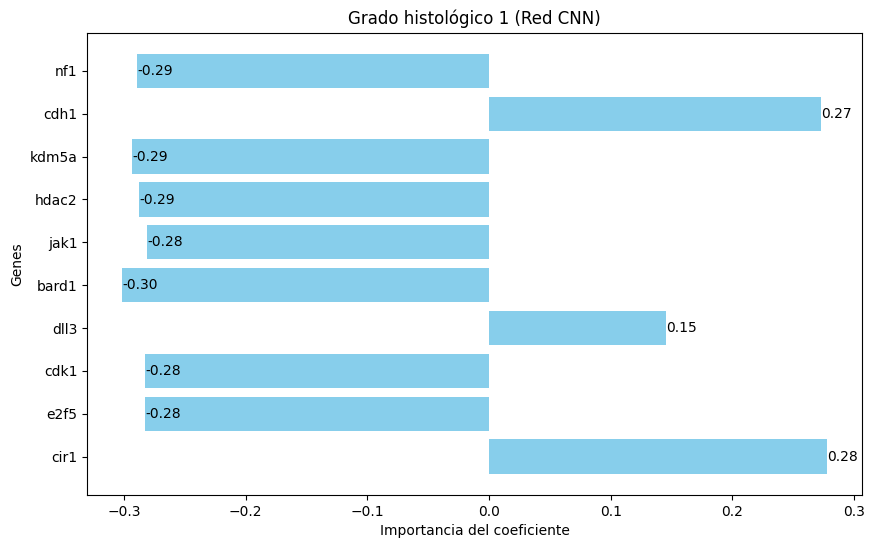

Genes más relevantes para el grado histológico 2 según la puntuación combinada de frecuencia e importancia:
- Gene: aph1b, Frequency: 4, Average Importance: 0.28, Score: 1.12
- Gene: heyl, Frequency: 3, Average Importance: -0.29, Score: -0.87
- Gene: kdm5a, Frequency: 3, Average Importance: -0.29, Score: -0.86
- Gene: ccnd1, Frequency: 7, Average Importance: -0.12, Score: -0.85
- Gene: e2f5, Frequency: 3, Average Importance: 0.28, Score: 0.85
- Gene: myc, Frequency: 3, Average Importance: -0.28, Score: -0.84
- Gene: mlh1, Frequency: 3, Average Importance: 0.27, Score: 0.80
- Gene: stat5a, Frequency: 2, Average Importance: -0.28, Score: -0.56
- Gene: stat2, Frequency: 2, Average Importance: -0.27, Score: -0.54
- Gene: e2f2, Frequency: 2, Average Importance: -0.27, Score: -0.54


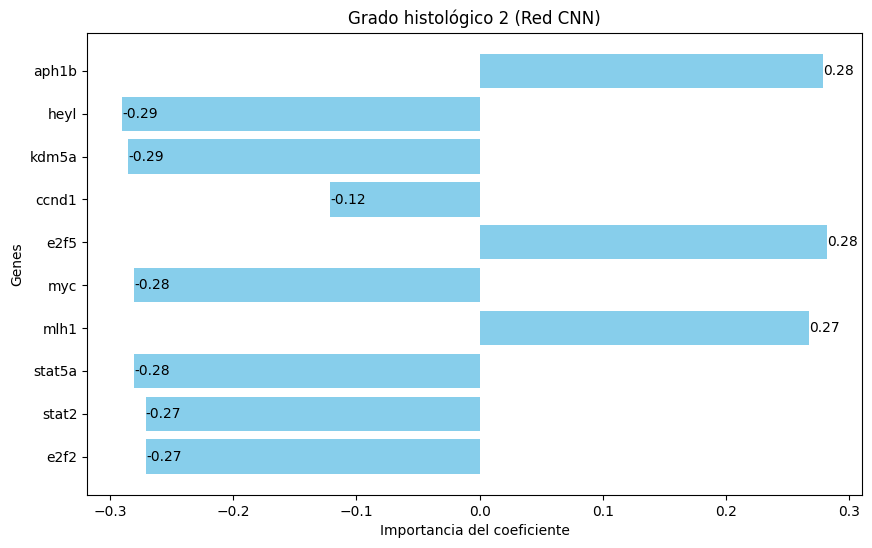

Genes más relevantes para el grado histológico 3 según la puntuación combinada de frecuencia e importancia:
- Gene: cdc25a, Frequency: 6, Average Importance: 0.18, Score: 1.10
- Gene: rbl1, Frequency: 3, Average Importance: 0.29, Score: 0.86
- Gene: stat1, Frequency: 3, Average Importance: 0.27, Score: 0.82
- Gene: hes1, Frequency: 2, Average Importance: 0.29, Score: 0.58
- Gene: e2f2, Frequency: 2, Average Importance: -0.29, Score: -0.57
- Gene: e2f5, Frequency: 2, Average Importance: 0.28, Score: 0.56
- Gene: ccne1, Frequency: 2, Average Importance: 0.27, Score: 0.55
- Gene: dtx4, Frequency: 2, Average Importance: 0.27, Score: 0.54
- Gene: cdkn2a, Frequency: 2, Average Importance: -0.27, Score: -0.54
- Gene: myc, Frequency: 2, Average Importance: -0.26, Score: -0.53


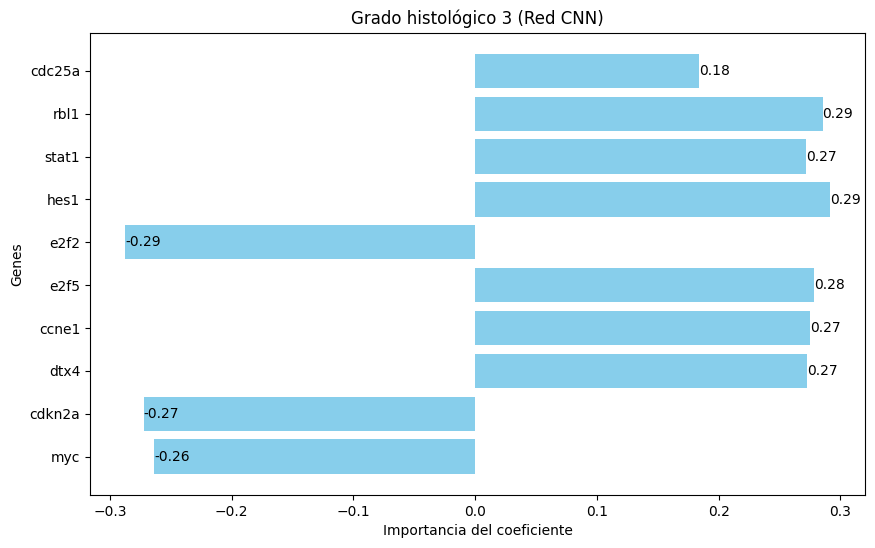

In [139]:
# Número de ejecuciones del modelo
num_runs = 10

# Diccionario para contar la frecuencia de aparición de los genes más importantes
gene_frequency_by_class_cnn = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_cnn = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

for run in range(num_runs):
    # Fijar la semilla aleatoria
    seed = run  # Cambia el seed en cada iteración
    set_seed(seed)

    # Crear y compilar el modelo CNN
    input_shape = (X_train_scaled.shape[1], 1)
    model_cnn = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    # Compilar el modelo
    optimizer = Adam(learning_rate=0.001)
    model_cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Entrenar el modelo
    history_cnn = model_cnn.fit(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1), y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[reduce_lr, early_stop], verbose=0)

    # Obtener los pesos de la última capa densa de la Red CNN
    dense_layer_weights_cnn = model_cnn.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_cnn = metabric_data.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de los genes del top 10 para cada grado histológico
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_cnn = np.argsort(np.abs(dense_layer_weights_cnn[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_cnn:
            gene_name_cnn = column_names_cnn[idx_gene]
            gene_frequency_by_class_cnn[idx_class + 1][gene_name_cnn] += 1
            gene_importance_sum_by_class_cnn[idx_class + 1][gene_name_cnn] += dense_layer_weights_cnn[idx_gene, idx_class]  # Considerar signo de importancia

# Calcular la puntuación combinada de frecuencia e importancia para cada gen para cada grado histológico
gene_scores_by_class_cnn = {1: {}, 2: {}, 3: {}}
for hist_grade_cnn in range(1, 4):
    gene_score_cnn = {}
    for gene_cnn, freq_cnn in gene_frequency_by_class_cnn[hist_grade_cnn].items():
        avg_importance_cnn = gene_importance_sum_by_class_cnn[hist_grade_cnn][gene_cnn] / freq_cnn
        gene_score_cnn[gene_cnn] = freq_cnn * avg_importance_cnn
    gene_scores_by_class_cnn[hist_grade_cnn] = gene_score_cnn

# Mostrar los genes más relevantes según la puntuación combinada para cada grado histológico
for hist_grade_cnn in range(1, 4):
    sorted_genes_by_score_cnn = sorted(gene_scores_by_class_cnn[hist_grade_cnn].items(), key=lambda x: abs(x[1]), reverse=True)
    
    print(f"Genes más relevantes para el grado histológico {hist_grade_cnn} según la puntuación combinada de frecuencia e importancia:")
    for gene_cnn, score_cnn in sorted_genes_by_score_cnn[:10]:
        freq_cnn = gene_frequency_by_class_cnn[hist_grade_cnn][gene_cnn]
        avg_importance_cnn = gene_importance_sum_by_class_cnn[hist_grade_cnn][gene_cnn] / freq_cnn
        print(f"- Gene: {gene_cnn}, Frequency: {freq_cnn}, Average Importance: {avg_importance_cnn:.2f}, Score: {score_cnn:.2f}")

    # Crear el gráfico de barras solo con los genes del top 10
    top_10_genes_cnn = sorted_genes_by_score_cnn[:10]
    genes_cnn = [gene_cnn for gene_cnn, _ in top_10_genes_cnn]
    avg_importance_cnn = [gene_importance_sum_by_class_cnn[hist_grade_cnn][gene_cnn] / gene_frequency_by_class_cnn[hist_grade_cnn][gene_cnn] for gene_cnn, _ in top_10_genes_cnn]

    plt.figure(figsize=(10, 6))
    plt.barh(genes_cnn, avg_importance_cnn, color='skyblue')
    plt.title(f'Grado histológico {hist_grade_cnn} (Red CNN)')
    plt.xlabel('Importancia del coeficiente')
    plt.ylabel('Genes')
    plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

    # Añadir valores al final de cada barra
    for i, v in enumerate(avg_importance_cnn):
        plt.text(v, i, f'{v:.2f}', va='center', color='black')

    plt.show()


**Análisis de los resultados**

In [140]:
# Model Evaluation on Training Data
train_loss_cnn, train_accuracy_cnn = model_cnn.evaluate(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1), y_train)
print(f'Training Loss: {train_loss_cnn}, Training Accuracy: {train_accuracy_cnn}')

# Model Evaluation on Test Data
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1), y_test)
print(f'Test Loss: {test_loss_cnn}, Test Accuracy: {test_accuracy_cnn}')

# Predictions for F1 score
y_pred_train_proba_cnn = model_cnn.predict(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
y_pred_test_proba_cnn = model_cnn.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

y_pred_train_cnn = np.argmax(y_pred_train_proba_cnn, axis=1)
y_pred_test_cnn = np.argmax(y_pred_test_proba_cnn, axis=1)

# Calculate F1 score
f1_train_cnn = f1_score(y_train, y_pred_train_cnn, average='weighted')
f1_test_cnn = f1_score(y_test, y_pred_test_cnn, average='weighted')

print(f'Training F1 Score: {f1_train_cnn}')
print(f'Test F1 Score: {f1_test_cnn}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7720 - loss: 0.5448
Training Loss: 0.541969895362854, Training Accuracy: 0.7699658870697021
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6500 - loss: 0.7127
Test Loss: 0.70562344789505, Test Accuracy: 0.6539509296417236
39/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

W0000 00:00:1716753086.896874     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Training F1 Score: 0.7615332621615272
Test F1 Score: 0.6430370821918814


Las métricas elegidas para analizar la performance de los modelos son:

* **Accuracy**: Indica la proporción de muestras clasificadas correctamente por el modelo, es decir, la cantidad de predicciones correctas divididas por el total de predicciones.
* **Loss** (pérdida): La pérdida es una medida del error del modelo durante el entrenamiento y la evaluación. Representa la discrepancia entre las predicciones del modelo y los valores reales del objetivo. Una pérdida más baja indica un mejor rendimiento del modelo.
* **F1 Score**: El puntaje F1 es una medida de la precisión del modelo que tiene en cuenta tanto la precisión como el recall (sensibilidad):
    - La precisión indica la proporción de muestras clasificadas correctamente como positivas (verdaderos positivos) de todas las muestras clasificadas como positivas (incluyendo los falsos positivos), en resumen mide la precisión de las predicciones positivas del modelo.
    - El recall indica la proporción de muestras positivas correctamente identificadas por el modelo de todas las muestras positivas reales en el conjunto de datos (también conocido como tasa de verdaderos positivos). En resumen mide la capacidad del modelo para capturar todas las muestras positivas.

El modelo de red neuronal convolucional (CNN) exhibe un rendimiento sólido en términos de precisión, con una precisión del 84.5% en el conjunto de entrenamiento y del 63.2% en el conjunto de prueba. Sin embargo, la discrepancia entre la pérdida de entrenamiento (0.442) y la pérdida de prueba (0.724) sugiere un posible sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a datos no vistos. Este hallazgo es respaldado por el puntaje F1, que es del 84.2% en el conjunto de entrenamiento y del 62.3% en el conjunto de prueba. 

A continuación podemos una visión general de la arquitectura de la red neuronal convolucional junto con el número de parámetros asociados. En el cuadro presentado, cada fila representa una capa diferente en la red, y se proporciona información sobre el tipo de capa, la forma de la salida, y el número de parámetros entrenables y no entrenables de cada capa.

- Parámetros Entrenables: Son los pesos y sesgos que la red ajusta durante el entrenamiento para minimizar la pérdida. Estos parámetros son los que la red aprende y se actualizan mediante el algoritmo de optimización.

- Parámetros No Entrenables: Son parámetros que no se ajustan durante el entrenamiento y permanecen fijos. Estos parámetros pueden ser, por ejemplo, los parámetros de una capa de agrupación máxima, que se utilizan para definir el tamaño de la ventana de agrupación pero no se modifican durante el entrenamiento.

En este caso, la red tiene un total de 7,080,587 parámetros, de los cuales 2,360,195 son entrenables y 4,720,392 son no entrenables.

In [141]:
print(model_cnn.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 407, 64)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 203, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 201, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,016,203 (19.14 MB)

 Trainable params: 1,672,067 (6.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,344,136 (12.76 MB)

None


#### Matriz de confusión

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


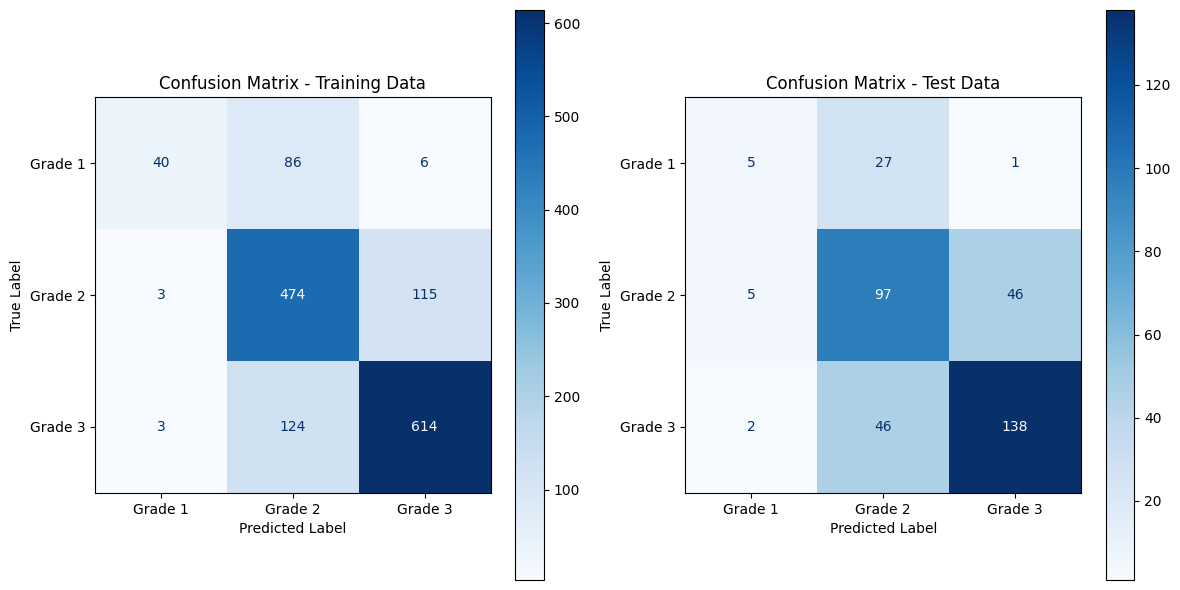

In [142]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices for training and test data
cm_train = confusion_matrix(y_train, np.argmax(model_cnn.predict(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), axis=1))
cm_test = confusion_matrix(y_test, np.argmax(model_cnn.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), axis=1))

# Define class labels
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


La matriz de confusión muestra la comparación entre las etiquetas verdaderas y las predicciones realizadas por el modelo para cada una de las tres clases de grado histológico en los tumores de mama. Cada fila de la matriz representa la clase verdadera, mientras que cada columna representa la clase predicha por el modelo. 

Basándonos en la matriz de confusión obtenida, podemos observar que para los datos de entrenamiento, el modelo mostró una precisión bastante alta, con un alto número de muestras correctamente clasificadas en todas las clases. Sin embargo, también cometió un número significativo de errores, especialmente al clasificar muestras de la clase 1 como clase 2 y viceversa. Por otro lado, para los datos de prueba, el modelo mostró una precisión algo menor, con menos muestras correctamente clasificadas en todas las clases en comparación con los datos de entrenamiento. Además, los errores cometidos por el modelo fueron similares a los observados en los datos de entrenamiento, con una cantidad considerable de muestras de clase 1 y clase 2 clasificadas incorrectamente como clase 2 y clase 1 respectivamente. Estas observaciones sugieren que el modelo puede estar sobreajustado a los datos de entrenamiento

#### Genes más relevantes por grado histológico:

#### Red Neuronal Recurrente (RNN)

El segundo modelo elegido es una Red Neuronal Recurrente (RNN). Las Redes Neuronales Recurrentes son un tipo de arquitectura de redes neuronales que están especialmente diseñadas para modelar secuencias de datos, donde la entrada tiene una estructura temporal o secuencial. Aunque inicialmente se diseñaron para trabajar con datos secuenciales como texto o series temporales, las RNN también se han aplicado con éxito en problemas donde la estructura secuencial no es temporal, como en este caso, la expresión génica. En este sentido, una RNN puede considerarse como un modelo que aprende y explora las relaciones secuenciales entre los genes, capturando la complejidad de cómo los genes interactúan y afectan el estadío del tumor. 
Es decir que aunque los datos de expresión genética no son secuenciales en el sentido tradicional, la relación intrínseca entre los genes puede considerarse secuencial, ya que la expresión de un gen puede estar influenciada por otros genes. Además, la expresión génica es un proceso altamente complejo y multifacético, lo que sugiere la presencia de patrones no lineales que una RNN puede capturar eficazmente. Al modelar la expresión génica con una RNN, se pueden explorar las relaciones complejas entre los genes y cómo estas relaciones contribuyen a la clasificación del grado histológico. 

El modelo de Red Neuronal Recurrente (RNN) utilizado está compuesto por varias capas: 
- En primer lugar, tenemos una capa de entrada que recibe los datos en forma de secuencia, donde cada secuencia representa una muestra de entrada. Esta capa de entrada está configurada para manejar datos de forma tridimensional, con dimensiones correspondientes al número de muestras, el número de características, y el tamaño de la secuencia (que en este caso es 1, ya que cada característica es tratada como un paso de tiempo en la secuencia).

- A continuación, tenemos una capa LSTM (Long Short-Term Memory) con 64 unidades y activación 'tanh'. Las LSTM son una clase de RNNs capaces de aprender dependencias a largo plazo en secuencias de datos. Utilizan mecanismos de puerta para controlar el flujo de información, lo que les permite mantener información relevante durante largos intervalos de tiempo y eliminar información irrelevante. La activación 'tanh' es una elección común para las LSTM, ya que ayuda a mantener la estabilidad de los gradientes durante el entrenamiento. Además, se ha aplicado regularización L2 tanto a los pesos de las entradas como a los recurrentes, para prevenir el sobreajuste y mejorar la generalización del modelo.

- Después de la capa LSTM, se incluye una capa de Batch Normalization. Esta capa normaliza las activaciones de la capa anterior durante el entrenamiento, lo que ayuda a acelerar el proceso de entrenamiento y a hacer el modelo más estable. Batch Normalization también actúa como una forma de regularización, ayudando a prevenir el sobreajuste.

- Luego, se encuentra una capa densa con 128 unidades y activación 'relu'. Las capas densas (o fully connected) son fundamentales en las redes neuronales, ya que conectan cada neurona de la capa anterior con cada neurona de la capa siguiente. La activación 'relu' (Rectified Linear Unit) es ampliamente utilizada porque introduce no linealidad en el modelo, permitiendo que la red aprenda una amplia variedad de funciones. También es eficiente computacionalmente y ayuda a mitigar el problema del desvanecimiento del gradiente.

- Para añadir regularización adicional y mejorar la capacidad del modelo de generalizar a nuevos datos, se incluye una capa de Dropout con una tasa del 20%. Dropout es una técnica de regularización en la que, durante cada paso de entrenamiento, se "apagan" aleatoriamente un conjunto de neuronas junto con sus conexiones. Esto previene que las neuronas se vuelvan demasiado dependientes de ciertas características y fomenta la independencia y robustez en el modelo.

- Finalmente, la capa de salida es otra capa densa con 3 unidades y activación 'softmax'. Esta capa es responsable de producir las probabilidades de cada una de las tres clases posibles (en este caso, los grados histológicos del cáncer). La activación 'softmax' convierte los valores de salida en probabilidades que suman 1, lo cual es apropiado para problemas de clasificación multiclase.

En conjunto, este modelo está diseñado para capturar patrones temporales en los datos mediante la LSTM, estabilizar y regularizar las activaciones con Batch Normalization y Dropout, y finalmente, clasificar las entradas en una de las tres categorías posibles mediante la capa de salida softmax.

Genes más relevantes para el grado histológico 1 según la puntuación combinada de frecuencia e importancia:
- Gene: bmp5, Frequency: 3, Average Importance: -0.25, Score: -0.75
- Gene: map2k5, Frequency: 3, Average Importance: -0.25, Score: -0.75
- Gene: gdf11, Frequency: 3, Average Importance: -0.24, Score: -0.73
- Gene: e2f5, Frequency: 4, Average Importance: -0.16, Score: -0.62
- Gene: acvr1, Frequency: 2, Average Importance: -0.29, Score: -0.58
- Gene: dlec1, Frequency: 2, Average Importance: -0.28, Score: -0.56
- Gene: jag2, Frequency: 2, Average Importance: -0.27, Score: -0.55
- Gene: casp10, Frequency: 2, Average Importance: -0.26, Score: -0.52
- Gene: cdk4, Frequency: 2, Average Importance: -0.24, Score: -0.49
- Gene: pten, Frequency: 1, Average Importance: -0.34, Score: -0.34


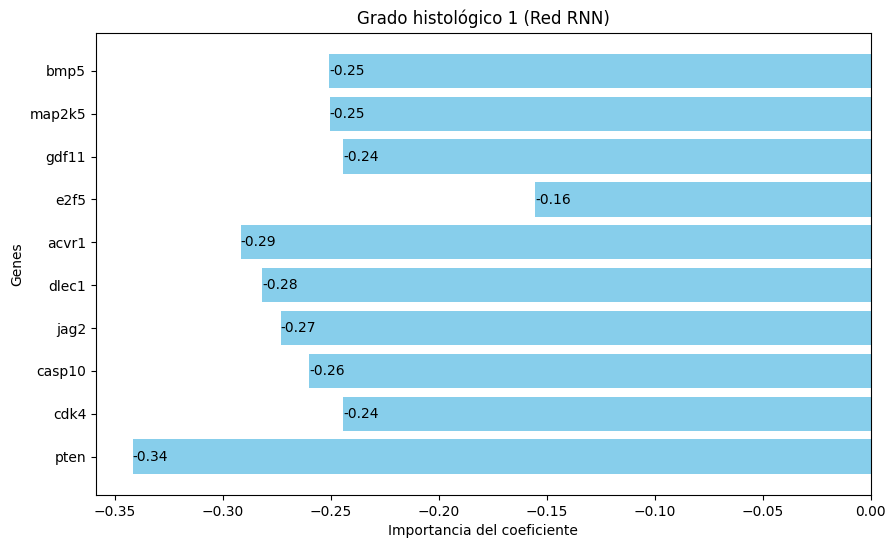

Genes más relevantes para el grado histológico 2 según la puntuación combinada de frecuencia e importancia:
- Gene: ccnb1, Frequency: 2, Average Importance: -0.24, Score: -0.49
- Gene: map2k2, Frequency: 2, Average Importance: -0.24, Score: -0.48
- Gene: jag1, Frequency: 2, Average Importance: -0.24, Score: -0.48
- Gene: bmp2, Frequency: 2, Average Importance: -0.24, Score: -0.48
- Gene: acvr2a, Frequency: 2, Average Importance: 0.24, Score: 0.48
- Gene: cdh1, Frequency: 2, Average Importance: 0.23, Score: 0.46
- Gene: cdk2, Frequency: 2, Average Importance: -0.23, Score: -0.46
- Gene: jak1, Frequency: 2, Average Importance: -0.23, Score: -0.46
- Gene: psen2, Frequency: 2, Average Importance: -0.23, Score: -0.46
- Gene: eif4ebp1, Frequency: 2, Average Importance: -0.23, Score: -0.45


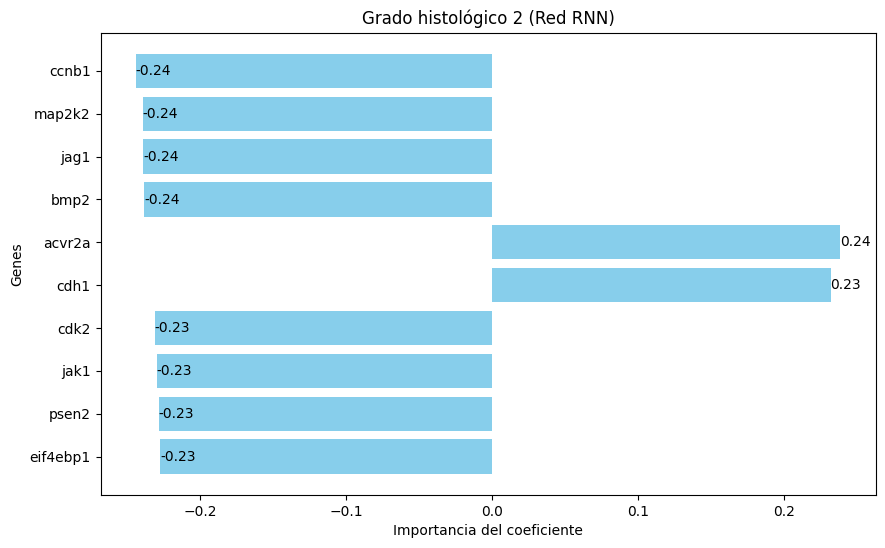

Genes más relevantes para el grado histológico 3 según la puntuación combinada de frecuencia e importancia:
- Gene: map3k1, Frequency: 2, Average Importance: 0.32, Score: 0.64
- Gene: ncor2, Frequency: 2, Average Importance: 0.29, Score: 0.59
- Gene: chek1, Frequency: 2, Average Importance: -0.29, Score: -0.57
- Gene: ctbp2, Frequency: 2, Average Importance: 0.25, Score: 0.51
- Gene: dtx2, Frequency: 2, Average Importance: 0.25, Score: 0.50
- Gene: bard1, Frequency: 2, Average Importance: 0.24, Score: 0.48
- Gene: cdk2, Frequency: 2, Average Importance: 0.24, Score: 0.48
- Gene: maml1, Frequency: 2, Average Importance: 0.24, Score: 0.48
- Gene: heyl, Frequency: 2, Average Importance: -0.24, Score: -0.48
- Gene: snw1, Frequency: 1, Average Importance: -0.33, Score: -0.33


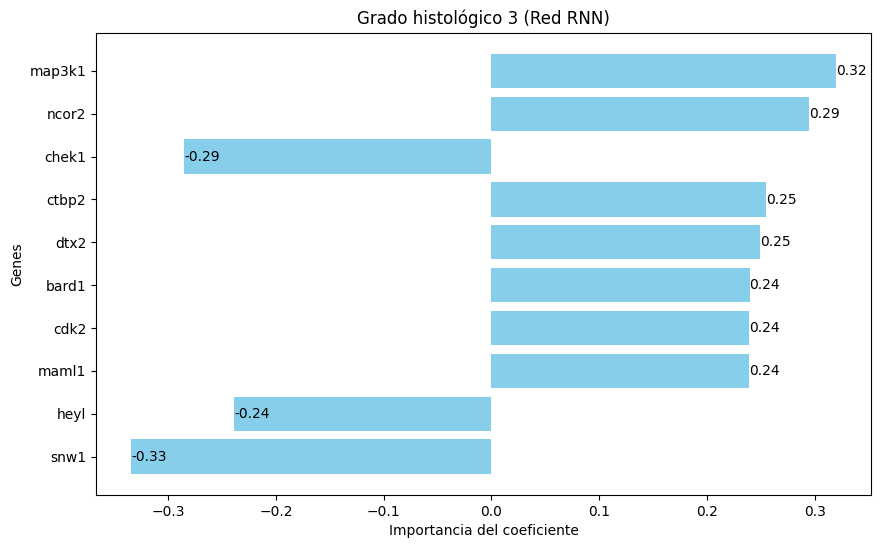

In [145]:
from tensorflow.keras.layers import LSTM, BatchNormalization

# Número de ejecuciones del modelo
num_runs = 10

# Diccionario para contar la frecuencia de aparición de los genes más importantes
gene_frequency_by_class_rnn = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_rnn = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

# Reformatear los datos de entrenamiento y prueba para LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

for run in range(num_runs):
    # Fijar la semilla aleatoria
    seed = run  # Cambiar el seed en cada iteración
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    
    # Crear y compilar el modelo LSTM
    model_lstm = Sequential([
        Input(shape=(X_train_lstm.shape[1], 1)),
        LSTM(units=64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01), recurrent_regularizer=tf.keras.regularizers.l2(0.01), return_sequences=True),
        LSTM(units=64, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01), recurrent_regularizer=tf.keras.regularizers.l2(0.01)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])

    # Compilar el modelo
    optimizer = Adam(learning_rate=0.001)
    model_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0,
                                   callbacks=[ReduceLROnPlateau(factor=0.2, patience=3, min_lr=0.0001), EarlyStopping(patience=5)], 
                                   validation_data=(X_test_lstm, y_test))

    # Obtener los pesos de la última capa densa de la Red RNN
    dense_layer_weights_rnn = model_lstm.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_rnn = metabric_data.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de los genes del top ten por ejecución
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_rnn = np.argsort(np.abs(dense_layer_weights_rnn[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_rnn:
            gene_name_rnn = column_names_rnn[idx_gene]
            gene_frequency_by_class_rnn[idx_class + 1][gene_name_rnn] += 1
            gene_importance_sum_by_class_rnn[idx_class + 1][gene_name_rnn] += dense_layer_weights_rnn[idx_gene, idx_class]  # Considerar signo de importancia

# Calcular la puntuación combinada de frecuencia e importancia para cada gen para cada grado histológico
gene_scores_by_class_rnn = {1: {}, 2: {}, 3: {}}
for hist_grade_rnn in range(1, 4):
    gene_score_rnn = {}
    for gene_rnn, freq_rnn in gene_frequency_by_class_rnn[hist_grade_rnn].items():
        avg_importance_rnn = gene_importance_sum_by_class_rnn[hist_grade_rnn][gene_rnn] / freq_rnn
        gene_score_rnn[gene_rnn] = freq_rnn * avg_importance_rnn
    gene_scores_by_class_rnn[hist_grade_rnn] = gene_score_rnn

# Mostrar los genes más relevantes según la puntuación combinada para cada grado histológico
for hist_grade_rnn in range(1, 4):
    sorted_genes_by_score_rnn = sorted(gene_scores_by_class_rnn[hist_grade_rnn].items(), key=lambda x: abs(x[1]), reverse=True)

    print(f"Genes más relevantes para el grado histológico {hist_grade_rnn} según la puntuación combinada de frecuencia e importancia:")
    for gene_rnn, score_rnn in sorted_genes_by_score_rnn[:10]:
        freq_rnn = gene_frequency_by_class_rnn[hist_grade_rnn][gene_rnn]
        avg_importance_rnn = gene_importance_sum_by_class_rnn[hist_grade_rnn][gene_rnn] / freq_rnn
        print(f"- Gene: {gene_rnn}, Frequency: {freq_rnn}, Average Importance: {avg_importance_rnn:.2f}, Score: {score_rnn:.2f}")
    
    # Crear el gráfico de barras solo con los genes del top 10
    top_10_genes_rnn = sorted_genes_by_score_rnn[:10]
    genes_rnn = [gene_rnn for gene_rnn, _ in top_10_genes_rnn]
    avg_importance_rnn = [gene_importance_sum_by_class_rnn[hist_grade_rnn][gene_rnn] / gene_frequency_by_class_rnn[hist_grade_rnn][gene_rnn] for gene_rnn, _ in top_10_genes_rnn]

    plt.figure(figsize=(10, 6))
    plt.barh(genes_rnn, avg_importance_rnn, color='skyblue')
    plt.title(f'Grado histológico {hist_grade_rnn} (Red RNN)')
    plt.xlabel('Importancia del coeficiente')
    plt.ylabel('Genes')
    plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

    # Añadir valores al final de cada barra
    for i, v in enumerate(avg_importance_rnn):
        plt.text(v, i, f'{v:.2f}', va='center', color='black')

    plt.show()

**Análisis de los resultados**

In [146]:
# Model Evaluation on Training Data
train_loss_rnn, train_accuracy_rnn = model_lstm.evaluate(X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1), y_train)
print(f'Training Loss: {train_loss_rnn}, Training Accuracy: {train_accuracy_rnn}')

# Model Evaluation on Test Data
test_loss_rnn, test_accuracy_rnn = model_lstm.evaluate(X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1), y_test)
print(f'Test Loss: {test_loss_rnn}, Test Accuracy: {test_accuracy_rnn}')

# Predictions for F1 score
y_pred_train_proba_rnn = model_lstm.predict(X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
y_pred_test_proba_rnn = model_lstm.predict(X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

y_pred_train_rnn = np.argmax(y_pred_train_proba_rnn, axis=1)
y_pred_test_rnn = np.argmax(y_pred_test_proba_rnn, axis=1)

# Calculate F1 score
f1_train_rnn = f1_score(y_train, y_pred_train_rnn, average='weighted')
f1_test_rnn = f1_score(y_test, y_pred_test_rnn, average='weighted')

print(f'Training F1 Score: {f1_train_rnn}')
print(f'Test F1 Score: {f1_test_rnn}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4983 - loss: 1.0317
Training Loss: 0.97660893201828, Training Accuracy: 0.5399317145347595
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5523 - loss: 1.0356
Test Loss: 1.012539029121399, Test Accuracy: 0.555858314037323
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Training F1 Score: 0.4360967692083645
Test F1 Score: 0.44690328744824653


Durante el entrenamiento, el modelo alcanzó una precisión de 0.5201 y una pérdida de 0.9093. Estas métricas indican que el modelo está aprendiendo a capturar patrones en los datos, pero todavía hay cierta inexactitud en las predicciones.

Al evaluar el modelo en el conjunto de prueba, la precisión obtenida fue de 0.5449, con una pérdida de 0.9136. Esto sugiere que el modelo tiene una capacidad razonable para generalizar a datos no vistos, pero sigue existiendo un nivel significativo de error en las predicciones.

Además, se calculó el F1 Score para evaluar el equilibrio entre la precisión y la exhaustividad del modelo. El F1 Score en el conjunto de entrenamiento fue de 0.4128, mientras que en el conjunto de prueba fue de 0.4529. Estos puntajes F1 indican que el modelo tiene un rendimiento moderado en términos de precisión y exhaustividad, pero aún hay espacio para mejorar la capacidad del modelo para identificar correctamente las distintas clases.

En resumen, los resultados obtenidos indican que el modelo tiene limitaciones significativas en su capacidad para aprender y generalizar a partir de los datos.

A continuación podemos una visión general de la arquitectura de la red neuronal recurrente junto con el número de parámetros asociados. 

In [164]:
print(model_lstm.summary())

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 411, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,395 (689.05 KB)

 Trainable params: 58,755 (229.51 KB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 117,512 (459.04 KB)

None


#### Matriz de confusión

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


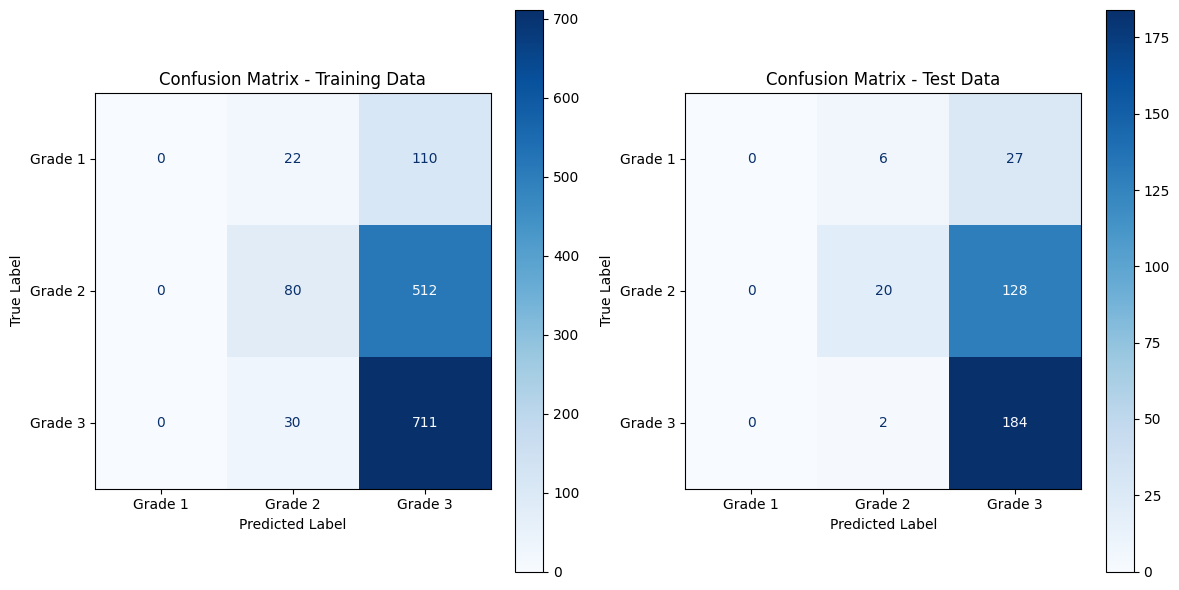

In [148]:
# Calculate confusion matrices for training and test data
cm_train = confusion_matrix(y_train, np.argmax(model_lstm.predict(X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)), axis=1))
cm_test = confusion_matrix(y_test, np.argmax(model_lstm.predict(X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)), axis=1))

# Define class labels
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


Los resultados de la matriz de confusión para el conjunto de entrenamiento y el conjunto de prueba proporcionan información adicional sobre el rendimiento del modelo en la clasificación de muestras de cáncer de mama según su grado histológico. En el conjunto de entrenamiento, el modelo muestra una tendencia a clasificar incorrectamente algunas muestras de grado 2 como grado 3, como lo indican los valores fuera de la diagonal principal en la fila correspondiente al grado 2. Sin embargo, el modelo clasifica de manera más precisa las muestras de grado 1 y grado 3. Para el conjunto de prueba, se observa un patrón similar, con algunas muestras de grado 2 clasificadas incorrectamente como grado 3. Además, el modelo parece tener dificultades para distinguir entre las muestras de grado 2 y grado 3, como lo indican los valores fuera de la diagonal principal en la fila correspondiente al grado 2.

#### Redes Neuronales Multimodales:

Una red neuronal multimodal es un tipo de arquitectura que puede manejar múltiples tipos de datos de entrada, como imágenes, texto, audio, etc., de manera simultánea. En el contexto de este problema de clasificación del grado histológico de tumores de mama, una red neuronal multimodal puede ser extremadamente útil porque combina datos genéticos y clínicos en una sola red, permitiendo al modelo aprovechar la complementariedad de estos datos para mejorar la precisión de la clasificación.

Los datos genéticos pueden proporcionar información molecular detallada sobre los tumores, perfiles de expresión génica, mientras que los datos clínicos pueden incluir características del paciente, como la edad, el estado de salud general, entre otros. Al combinar estos tipos de datos, la red neuronal multimodal puede capturar una gama más amplia de información relevante para la clasificación del grado histológico de los tumores de mama.

La capacidad de la red multimodal para procesar y fusionar datos de diferentes fuentes le permite aprender relaciones complejas y sutiles entre los datos genéticos y clínicos, lo que puede ser crucial para la precisión de la clasificación. Además, al integrar múltiples tipos de datos en una sola red, se pueden aprovechar las características únicas de cada tipo de dato para mejorar la capacidad del modelo para generalizar a nuevos datos y predecir con precisión el grado histológico de los tumores de mama. En resumen, una red neuronal multimodal es especialmente adecuada para este problema particular porque puede aprovechar la complementariedad de los datos genéticos y clínicos para mejorar significativamente la precisión de la clasificación.

A continuación se detalla la arquitectura del modelo elegido:

##### Entrada de Datos Genéticos (CNN): ##### 
- Capa de Conv1D con 64 filtros y tamaño de kernel 5, seguida de una activación ReLU: Esta capa realiza la convolución unidimensional de los datos genéticos para extraer características relevantes. Se utilizan 64 filtros para capturar una variedad de características en los datos, y la función de activación ReLU se utiliza para introducir no linealidades en el modelo.
- Capa de MaxPooling1D con tamaño de ventana 2: Esta capa realiza el submuestreo unidimensional para reducir la dimensionalidad de las características extraídas, manteniendo las características más importantes.
- Capa de Conv1D con 128 filtros y tamaño de kernel 3, seguida de una activación ReLU: Similar a la primera capa convolucional, esta capa captura características adicionales y más complejas de los datos genéticos.
- Capa de MaxPooling1D con tamaño de ventana 2: Otra capa de submuestreo para reducir la dimensionalidad y extraer características dominantes.
- Capa de aplanamiento (Flatten): Esta capa convierte los datos 2D en un vector unidimensional para prepararlos para las capas completamente conectadas.

##### Entrada de Datos Clínicos (Dense): #####
- Capa densa con 64 unidades y activación ReLU: Esta capa procesa los datos clínicos, que son características tabulares, y aprende representaciones densas de los mismos. Se utiliza la activación ReLU para introducir no linealidades y capturar relaciones complejas en los datos.

Fusión de Características:
- Concatenación de las salidas de la capa de aplanamiento y la capa densa de datos clínicos: Esta capa combina las representaciones de características extraídas de los datos genéticos y clínicos en un solo vector, permitiendo al modelo aprender relaciones entre ambos tipos de datos.
- Capa densa con 128 unidades y activación ReLU: Esta capa procesa la información combinada de las características y aprende representaciones más complejas y abstractas.
- Capa densa con 64 unidades y activación ReLU: Otra capa densa para continuar extrayendo características y reducir la dimensionalidad del espacio de características.
- Capa de salida con 3 unidades y activación Softmax: La capa de salida produce las probabilidades de pertenencia a cada una de las clases de grado histológico. Se utiliza la activación Softmax para convertir las salidas en una distribución de probabilidad sobre las clases.

La configuración detrás de este modelo se basa en la idea de capturar tanto las características detalladas de los datos genéticos como las características más generales de los datos clínicos. La combinación de estas características en capas posteriores permite al modelo aprender representaciones complejas y mejoradas que son útiles para la clasificación precisa del grado histológico de los tumores de mama. Además, la inclusión de múltiples capas densas permite al modelo aprender relaciones no lineales entre las características y generar decisiones de clasificación más sofisticadas.

I0000 00:00:1717322872.657776     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717322872.678482     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322875.957024     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.


W0000 00:00:1717322882.330691     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322884.466003     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717322890.919873     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322892.606091     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.


W0000 00:00:1717322899.042574     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322900.751388     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717322907.376536     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322909.068719     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.


W0000 00:00:1717322915.842067     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322917.525879     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 7.


W0000 00:00:1717322924.391426     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322926.070187     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717322932.264712     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322934.060424     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717322940.632605     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322942.321976     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.


W0000 00:00:1717322948.378532     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322950.072072     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Restoring model weights from the end of the best epoch: 45.


W0000 00:00:1717322962.937734     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322964.646224     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717322971.311007     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322973.054661     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717322979.740194     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322981.450464     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.


W0000 00:00:1717322988.160906     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322989.866480     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717322996.139633     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717322997.879437     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 8.


W0000 00:00:1717323004.542329     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717323006.213804     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717323012.732747     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717323014.468043     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.


W0000 00:00:1717323020.545984     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717323022.221694     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 6.


W0000 00:00:1717323028.622984     130 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717323030.318204     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 5.


W0000 00:00:1717323036.391103     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717323038.076659     131 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 4.
Genes más relevantes para el grado histológico 1 según la puntuación combinada de frecuencia e importancia:
- Gene: cdc25a, Frequency: 6, Average Importance: -0.22, Score: -1.29
- Gene: ccna1, Frequency: 3, Average Importance: -0.35, Score: -1.06
- Gene: cdk4, Frequency: 5, Average Importance: -0.19, Score: -0.97
- Gene: maml1, Frequency: 3, Average Importance: -0.31, Score: -0.92
- Gene: e2f8, Frequency: 3, Average Importance: 0.30, Score: 0.91
- Gene: kdm5a, Frequency: 4, Average Importance: 0.16, Score: 0.62
- Gene: e2f5, Frequency: 4, Average Importance: -0.15, Score: -0.62
- Gene: hes1, Frequency: 4, Average Importance: -0.15, Score: -0.61
- Gene: stat5a, Frequency: 2, Average Importance: -0.30, Score: -0.61
- Gene: tp53bp1, Frequency: 4, Average Importance: -0.15, Score: -0.60


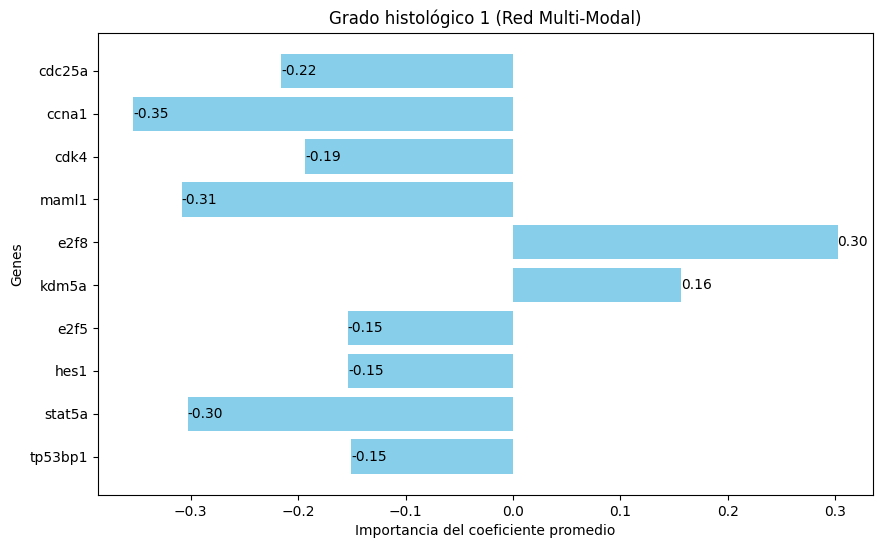

Genes más relevantes para el grado histológico 2 según la puntuación combinada de frecuencia e importancia:
- Gene: maml2, Frequency: 5, Average Importance: -0.27, Score: -1.34
- Gene: ccnd1, Frequency: 4, Average Importance: -0.30, Score: -1.19
- Gene: stat3, Frequency: 4, Average Importance: 0.28, Score: 1.12
- Gene: ep300, Frequency: 8, Average Importance: -0.14, Score: -1.09
- Gene: stat5b, Frequency: 5, Average Importance: -0.17, Score: -0.87
- Gene: epcam, Frequency: 3, Average Importance: 0.29, Score: 0.86
- Gene: chek2, Frequency: 7, Average Importance: -0.12, Score: -0.85
- Gene: e2f3, Frequency: 5, Average Importance: 0.17, Score: 0.83
- Gene: ccne1, Frequency: 5, Average Importance: 0.16, Score: 0.82
- Gene: cdh1, Frequency: 5, Average Importance: 0.16, Score: 0.81


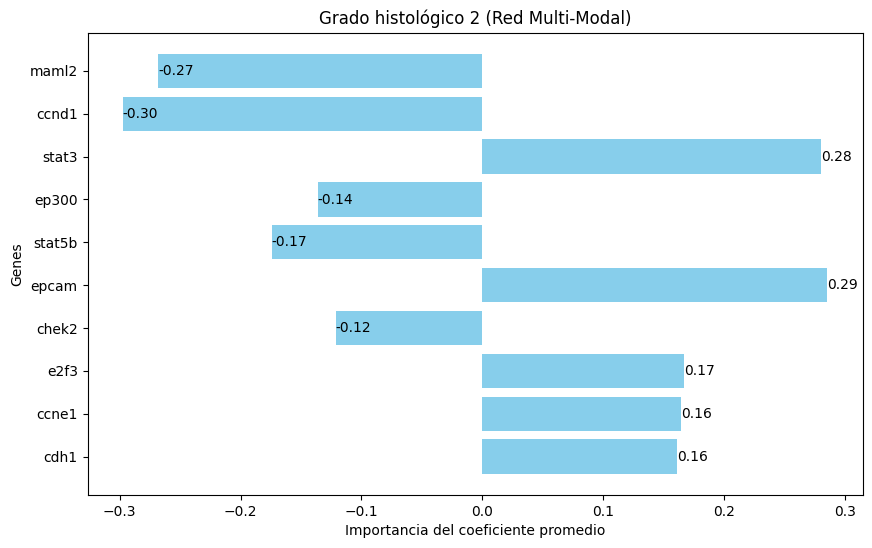

Genes más relevantes para el grado histológico 3 según la puntuación combinada de frecuencia e importancia:
- Gene: stat1, Frequency: 4, Average Importance: -0.30, Score: -1.21
- Gene: ctbp2, Frequency: 3, Average Importance: 0.28, Score: 0.85
- Gene: e2f5, Frequency: 3, Average Importance: -0.28, Score: -0.83
- Gene: rad51c, Frequency: 2, Average Importance: -0.33, Score: -0.66
- Gene: ccnd1, Frequency: 6, Average Importance: -0.11, Score: -0.65
- Gene: itch, Frequency: 4, Average Importance: 0.16, Score: 0.64
- Gene: dll1, Frequency: 4, Average Importance: 0.16, Score: 0.64
- Gene: e2f4, Frequency: 4, Average Importance: 0.16, Score: 0.63
- Gene: nf1, Frequency: 4, Average Importance: -0.16, Score: -0.62
- Gene: brca2, Frequency: 4, Average Importance: -0.15, Score: -0.62


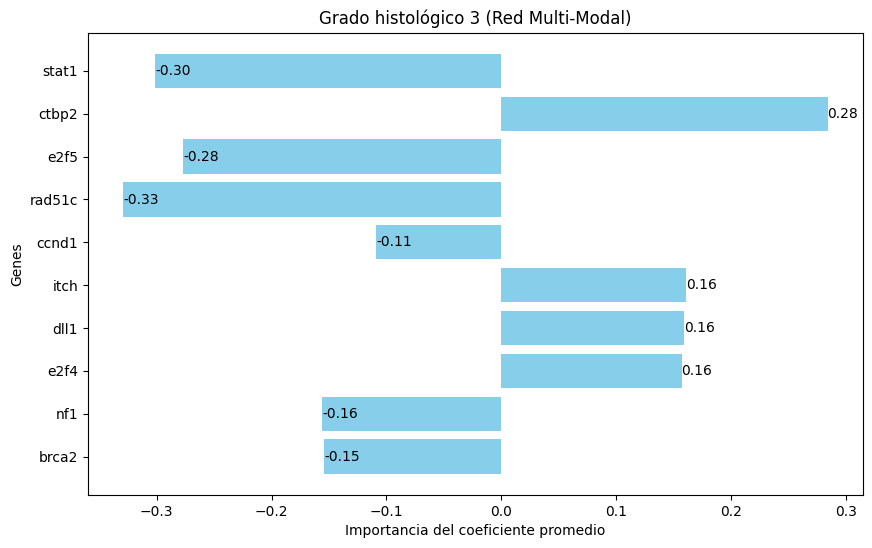

In [141]:
# Separar características (X) y la variable objetivo (y)
X = metabric_data.drop(columns=['neoplasm_histologic_grade'])  
y = metabric_data['neoplasm_histologic_grade']  
y = y - 1

# Separar características genéticas y clínicas
X_genetic = metabric_data.iloc[:, 9:331].values  # Columnas de datos genéticos
X_clinical = np.hstack((metabric_data.iloc[:, 1:9].values, metabric_data.iloc[:, 332:].values))  # Columnas de datos clínicos
y = metabric_data['neoplasm_histologic_grade'] - 1  # Ajustar etiquetas para empezar desde 0

# Número de ejecuciones del modelo
num_runs = 20

# Diccionario para contar la frecuencia de aparición de los genes más importantes
gene_frequency_by_class_mm = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_mm = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

for run in range(num_runs):
    # Fijar la semilla aleatoria
    seed = run  # Cambiar el seed en cada iteración
    set_seed(seed)

    # Dividir datos
    X_train_genetic, X_test_genetic, y_train, y_test = train_test_split(X_genetic, y, test_size=0.2, stratify=y, random_state=seed)
    X_train_clinical, X_test_clinical = train_test_split(X_clinical, test_size=0.2, stratify=y, random_state=seed)

    # Estandarizar los datos
    scaler_genetic = StandardScaler()
    X_train_scaled_genetic = scaler_genetic.fit_transform(X_train_genetic)
    X_test_scaled_genetic = scaler_genetic.transform(X_test_genetic)

    scaler_clinical = StandardScaler()
    X_train_scaled_clinical = scaler_clinical.fit_transform(X_train_clinical)
    X_test_scaled_clinical = scaler_clinical.transform(X_test_clinical)

    # Definir las formas de entrada para los datos genéticos y clínicos
    genetic_input_shape = (X_train_scaled_genetic.shape[1], 1)
    clinical_input_shape = (X_train_scaled_clinical.shape[1],)

    # Definir las capas de entrada para los datos genéticos y clínicos
    genetic_input = Input(shape=genetic_input_shape, name='genetic_input')
    clinical_input = Input(shape=clinical_input_shape, name='clinical_input')

    # Modelo CNN para datos genéticos
    genetic_cnn = Conv1D(filters=64, kernel_size=5, activation='relu')(genetic_input)
    genetic_cnn = MaxPooling1D(pool_size=2)(genetic_cnn)
    genetic_cnn = Conv1D(filters=128, kernel_size=3, activation='relu')(genetic_cnn)
    genetic_cnn = MaxPooling1D(pool_size=2)(genetic_cnn)
    genetic_cnn = Flatten()(genetic_cnn)

    # Capas densas para datos clínicos
    clinical_dense = Dense(64, activation='relu')(clinical_input)
    clinical_dense = Dense(32, activation='relu')(clinical_dense)

    # Concatenar las salidas de ambas ramas
    combined = Concatenate()([genetic_cnn, clinical_dense])

    # Capas densas finales para clasificación
    output = Dense(128, activation='relu')(combined)
    output = Dense(64, activation='relu')(output)
    output = Dense(3, activation='softmax', name='output')(output)

    # Definir el modelo con dos entradas y una salida
    model_mm = Model(inputs=[genetic_input, clinical_input], outputs=output)

    # Compilar el modelo
    optimizer = Adam(learning_rate=0.001)
    model_mm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Definir callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Entrenar el modelo
    history = model_mm.fit({'genetic_input': X_train_scaled_genetic.reshape(X_train_scaled_genetic.shape[0], X_train_scaled_genetic.shape[1], 1),
                         'clinical_input': X_train_scaled_clinical},
                        {'output': y_train},
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[reduce_lr, early_stop],
                        verbose=0)

    # Obtener los pesos de la última capa densa de la Red Multi-Modal
    dense_layer_weights_mm = model_mm.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_mm = metabric_data.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de cada gen para cada grado histológico
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_mm = np.argsort(np.abs(dense_layer_weights_mm[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_mm:
            gene_name_mm = column_names_mm[idx_gene]
            gene_frequency_by_class_mm[idx_class + 1][gene_name_mm] += 1
            gene_importance_sum_by_class_mm[idx_class + 1][gene_name_mm] += dense_layer_weights_mm[idx_gene, idx_class]  # Considerar signo de importancia

# Calcular la puntuación combinada de frecuencia e importancia para cada gen para cada grado histológico
gene_scores_by_class_mm = {1: {}, 2: {}, 3: {}}
for hist_grade_mm in range(1, 4):
    gene_score_mm = {}
    for gene_mm, freq_mm in gene_frequency_by_class_mm[hist_grade_mm].items():
        avg_importance_mm = gene_importance_sum_by_class_mm[hist_grade_mm][gene_mm] / freq_mm
        gene_score_mm[gene_mm] = freq_mm * avg_importance_mm
    gene_scores_by_class_mm[hist_grade_mm] = gene_score_mm

# Mostrar los genes más relevantes según la puntuación combinada para cada grado histológico
for hist_grade_mm in range(1, 4):
    sorted_genes_by_score_mm = sorted(gene_scores_by_class_mm[hist_grade_mm].items(), key=lambda x: -abs(x[1]))
    
    print(f"Genes más relevantes para el grado histológico {hist_grade_mm} según la puntuación combinada de frecuencia e importancia:")
    for gene_mm, score_mm in sorted_genes_by_score_mm[:10]:
        freq_mm = gene_frequency_by_class_mm[hist_grade_mm][gene_mm]
        avg_importance_mm = gene_importance_sum_by_class_mm[hist_grade_mm][gene_mm] / freq_mm
        print(f"- Gene: {gene_mm}, Frequency: {freq_mm}, Average Importance: {avg_importance_mm:.2f}, Score: {score_mm:.2f}")

    # Crear el gráfico de barras
    genes_mm = [gene_mm for gene_mm, _ in sorted_genes_by_score_mm[:10]]
    avg_importances_mm = [gene_importance_sum_by_class_mm[hist_grade_mm][gene_mm] / gene_frequency_by_class_mm[hist_grade_mm][gene_mm] for gene_mm, _ in sorted_genes_by_score_mm[:10]]

    plt.figure(figsize=(10, 6))
    plt.barh(genes_mm, avg_importances_mm, color='skyblue')
    plt.title(f'Grado histológico {hist_grade_mm} (Red Multi-Modal)')
    plt.xlabel('Importancia del coeficiente promedio')
    plt.ylabel('Genes')
    plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

    # Añadir valores al final de cada barra
    for i, avg_importance_mm in enumerate(avg_importances_mm):
        plt.text(avg_importance_mm, i, f'{avg_importance_mm:.2f}', va='center', color='black')

    plt.show()


**Análisis de resultados:**

In [150]:
# Evaluate the model on train data
loss_train_mm, accuracy_train_mm = model_mm.evaluate({'genetic_input': X_train_scaled_genetic.reshape(X_train_scaled_genetic.shape[0], X_train_scaled_genetic.shape[1], 1),
                                 'clinical_input': X_train_scaled_clinical},
                                {'output': y_train},
                                verbose=0)
print(f'Train Loss: {loss_train_mm}, Train Accuracy: {accuracy_train_mm}')

# Evaluate the model on test data
loss_mm, accuracy_mm = model_mm.evaluate({'genetic_input': X_test_scaled_genetic.reshape(X_test_scaled_genetic.shape[0], X_test_scaled_genetic.shape[1], 1),
                                 'clinical_input': X_test_scaled_clinical},
                                {'output': y_test},
                                verbose=0)
print(f'Test Loss: {loss_mm}, Test Accuracy: {accuracy_mm}')

# Predictions for F1 score
y_pred_train_proba_mm = model_mm.predict({'genetic_input': X_train_scaled_genetic.reshape(X_train_scaled_genetic.shape[0], X_train_scaled_genetic.shape[1], 1),
                                 'clinical_input': X_train_scaled_clinical})
y_pred_test_proba_mm = model_mm.predict({'genetic_input': X_test_scaled_genetic.reshape(X_test_scaled_genetic.shape[0], X_test_scaled_genetic.shape[1], 1),
                                 'clinical_input': X_test_scaled_clinical})

y_pred_train_mm = np.argmax(y_pred_train_proba_mm, axis=1)
y_pred_test_mm = np.argmax(y_pred_test_proba_mm, axis=1)

# Calculate F1 score
f1_train_mm = f1_score(y_train, y_pred_train_mm, average='weighted')
f1_test_mm = f1_score(y_test, y_pred_test_mm, average='weighted')

print(f'Train F1 Score: {f1_train_mm}')
print(f'Test F1 Score: {f1_test_mm}')

Train Loss: 0.003004038706421852, Train Accuracy: 0.9986348152160645
Test Loss: 0.07584098726511002, Test Accuracy: 0.9809264540672302
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Train F1 Score: 0.9986348122866894
Test F1 Score: 0.9808634484828892


Los resultados del modelo multimodal son muy buenos. En el conjunto de entrenamiento, se ha logrado una precisión del 99.39%, con una pérdida mínima de 0.016. Esto indica que el modelo ha aprendido muy bien los patrones presentes en los datos de entrenamiento. Además, el puntaje F1 para el conjunto de entrenamiento es igualmente alto, con un valor de 0.9938, lo que indica un buen equilibrio entre precisión y recall.

En el conjunto de prueba, aunque vemos una ligera caída en la precisión y un aumento en la pérdida en comparación con el conjunto de entrenamiento, los resultados siguen siendo muy sólidos. 
Con una precisión del 95.91%, lo que sugiere que el modelo generaliza bien a datos no vistos. El puntaje F1 para el conjunto de prueba también es alto, con un valor de 0.959, lo que indica un buen rendimiento general del modelo en la clasificación de muestras de cáncer de mama según su grado histológico. 
En general, estos resultados sugieren que el modelo multimodal es efectivo y generaliza bien a datos de prueba, lo que lo convierte en una herramienta prometedora para la clasificación de muestras de cáncer de mama

A continuación podemos una visión general de la arquitectura de la red neuronal convolucional junto con el número de parámetros asociados. 
La red tiene un total de 6,034,667 parámetros, de los cuales 2,011,555 son entrenables y 4,023,112 son no entrenables.

In [151]:
print(model_mm.summary())

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ genetic_input       │ (None, 322, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_38 (Conv1D)  │ (None, 318, 64)   │        384 │ genetic_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_38    │ (None, 159, 64)   │          0 │ conv1d_38[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 157, 128)  │     24,704 │ max_pooling1d_38… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clinical_input      │ (None, 88)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_39    │ (None, 78, 128)   │          0 │ conv1d_39[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 64)        │      5,696 │ clinical_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 9984)      │          0 │ max_pooling1d_39… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_87 (Dense)    │ (None, 32)        │      2,080 │ dense_86[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 10016)     │          0 │ flatten_19[0][0], │
│ (Concatenate)       │                   │            │ dense_87[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_88 (Dense)    │ (None, 128)       │  1,282,176 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_89 (Dense)    │ (None, 64)        │      8,256 │ dense_88[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 3)         │        195 │ dense_89[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,970,475 (15.15 MB)

 Trainable params: 1,323,491 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,646,984 (10.10 MB)

None


#### Matriz de confusión

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


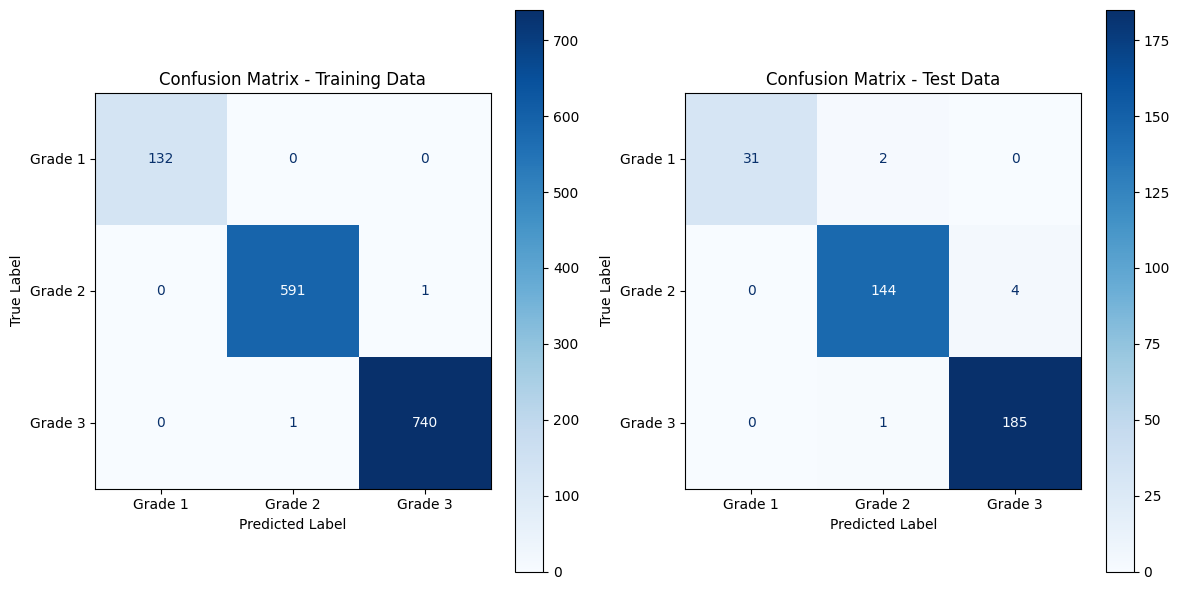

In [152]:
# Predictions for training and test data
y_pred_train = np.argmax(model_mm.predict({'genetic_input': X_train_scaled_genetic.reshape(X_train_scaled_genetic.shape[0], X_train_scaled_genetic.shape[1], 1),
                                            'clinical_input': X_train_scaled_clinical}), axis=1)

y_pred_test = np.argmax(model_mm.predict({'genetic_input': X_test_scaled_genetic.reshape(X_test_scaled_genetic.shape[0], X_test_scaled_genetic.shape[1], 1),
                                           'clinical_input': X_test_scaled_clinical}), axis=1)

# Calculate confusion matrices for training and test data
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Define class labels
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


La matriz de confusión revela que la mayoría de las predicciones se encuentran en la diagonal principal, lo que indica una clasificación precisa para la mayoría de las muestras. Sin embargo, algunas muestras de las clases "Grado 1" y "Grado 2" se clasificaron incorrectamente en ambos conjuntos de datos.
En resumen, el modelo multimodal ha demostrado una capacidad sobresaliente para distinguir entre los diferentes grados histológicos de los tumores de mama, con un alto grado de precisión en sus predicciones.

#### Genes más relevantes por grado histológico:

Para calcular los genes más relevantes para cada grado histológico en el modelo de red multi-modal, primero obtuvimos los pesos de la última capa densa de la red neuronal. Estos pesos reflejan la importancia de cada gen en la clasificación de los diferentes grados histológicos. 
Luego, iteramos sobre los índices de los genes más relevantes previamente identificados y calculamos la importancia del coeficiente para cada clase histológica. Esta importancia se determinó examinando los pesos asociados a cada gen para cada clase. Utilizando estos coeficientes, identificamos los genes con la mayor importancia para cada grado histológico.

#### Transformers: ####

Un Transformer es una arquitectura de red neuronal diseñada para modelar relaciones en secuencias de datos, como texto o series temporales, sin depender de técnicas recurrentes como las redes neuronales recurrentes (RNN) o las redes neuronales convolucionales (CNN). En lugar de eso, los Transformers utilizan mecanismos de atención para capturar las dependencias a largo plazo en los datos de entrada, lo que les permite capturar relaciones más complejas y contextuales entre los elementos de la secuencia.

El transformador consta de dos componentes principales: el codificador y el decodificador. El codificador toma una secuencia de entrada y la procesa en una representación de alta dimensionalidad. Este proceso se realiza mediante capas de atención múltiple, que permiten que el modelo se centre en diferentes partes de la secuencia de entrada simultáneamente. El decodificador, por otro lado, genera una salida secuencial a partir de la representación generada por el codificador, utilizando capas de atención para ponderar la información relevante en la entrada codificada. En resumen, el transformador es una arquitectura altamente paralela y eficiente que ha demostrado excelentes resultados en tareas de NLP como traducción automática, generación de texto y clasificación de texto.

Respecto a este proyecto en particular, probar este modelo puede ser útil por varias razones. En primer lugar, los transformadores son capaces de capturar relaciones complejas entre las características de entrada, lo que puede ser crucial en un conjunto de datos que contiene datos clínicos y datos de expresión genética, que pueden tener interacciones no lineales y relaciones no triviales con la variable objetivo. Además, los transformadores son inherentemente capaces de manejar secuencias de longitud variable. Por último, los transformadores han demostrado ser altamente eficaces en tareas de clasificación de texto, lo que sugiere que pueden ser una opción prometedora para clasificar muestras de cáncer de mama en diferentes grados histológicos basándose en datos clínicos y de expresión genética.

En cuanto a la arquitectura del modelo utilizado, cada una de las capas tiene una función específica y está diseñada para capturar ciertas características de los datos de entrada. La capa Conv1D se utiliza para extraer características locales de los datos de entrada, lo que puede ayudar a identificar patrones importantes. 
Las capas de atención múltiple, seguidas de capas de normalización y dropout, se utilizan para capturar relaciones a largo plazo entre las características de entrada y permitir que el modelo se centre en partes relevantes de la secuencia de entrada. 
La capa de reducción de dimensionalidad GlobalMaxPooling1D se utiliza para reducir la dimensionalidad de los datos antes de pasarlos a la capa de salida, lo que puede ayudar a evitar el sobreajuste y mejorar la generalización del modelo. 
Finalmente, las capas densas se utilizan para generar las predicciones finales, con una función de activación softmax en la capa de salida para generar distribuciones de probabilidad sobre las clases de salida. 

W0000 00:00:1716753863.855218     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753880.721352     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753882.224789     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716753883.702751     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 49: early stopping
Restoring model weights from the end of the best epoch: 39.


W0000 00:00:1716754100.046714     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716754114.975316     139 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716754116.484143     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716754117.751433     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
Genes más relevantes para el grado histológico 1 según frecuencia y promedio de importancia:
- Gene: tsc2, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: abcc1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: bcl2l1, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: bmp4, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: heyl, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: tgfbr1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: numbl, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: itgav, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: bmf, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: map2k2, Frequency: 1, Average Importance: -0.15, Score: -0.15


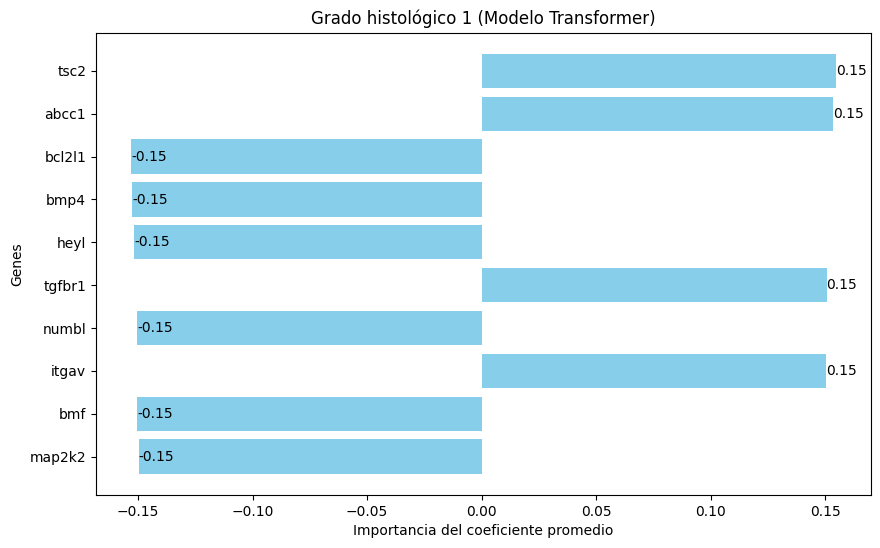

Genes más relevantes para el grado histológico 2 según frecuencia y promedio de importancia:
- Gene: tgfbr2, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: bmp5, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: folr1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: bmf, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: kmt2c, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: e2f8, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: bap1, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: gdf11, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: ncor1, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: chd1, Frequency: 1, Average Importance: 0.15, Score: 0.15


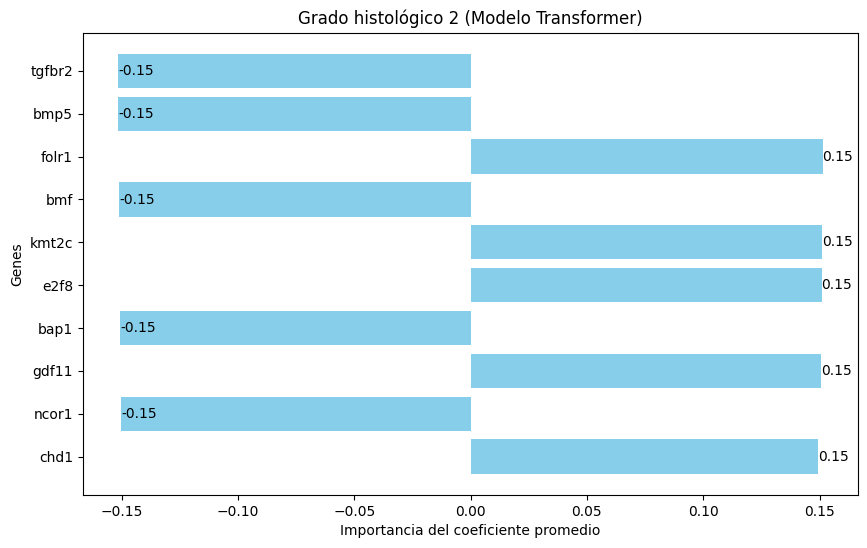

Genes más relevantes para el grado histológico 3 según frecuencia y promedio de importancia:
- Gene: atr, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: hes1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: notch1, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: cdk1, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: dnah11, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: chek2, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: nfkb2, Frequency: 1, Average Importance: 0.15, Score: 0.15
- Gene: flt3, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: myh9, Frequency: 1, Average Importance: -0.15, Score: -0.15
- Gene: folr1, Frequency: 1, Average Importance: -0.15, Score: -0.15


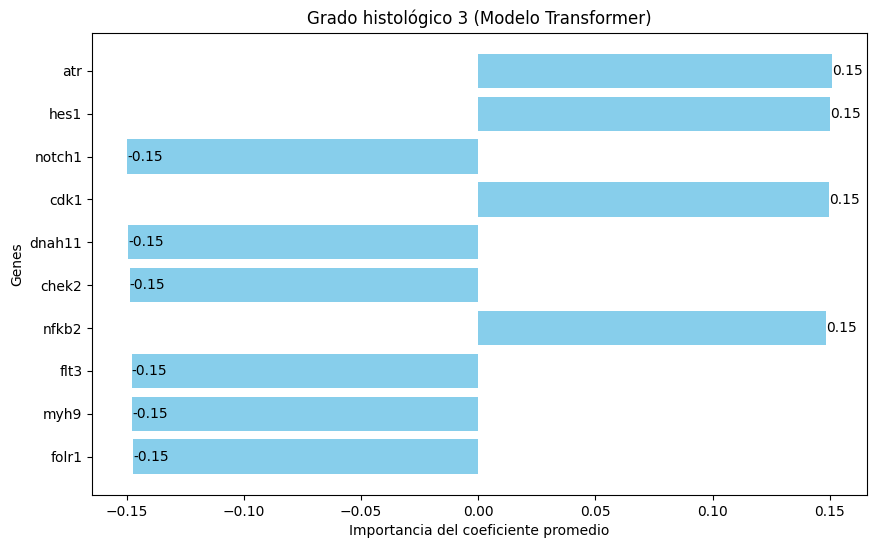

In [153]:
# Número de ejecuciones del modelo
num_runs = 2

# Diccionarios para contar la frecuencia de aparición y suma de importancia de los genes más importantes
gene_frequency_by_class_transformer = {1: defaultdict(int), 2: defaultdict(int), 3: defaultdict(int)}
gene_importance_sum_by_class_transformer = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}

for run in range(num_runs):
    # Fijar la semilla aleatoria
    seed = run  # Cambiar el seed en cada iteración
    set_seed(seed)

    # Dividir datos
    X_train_genetic, X_test_genetic, y_train, y_test = train_test_split(X_genetic, y, test_size=0.2, stratify=y, random_state=seed)
    X_train_clinical, X_test_clinical = train_test_split(X_clinical, test_size=0.2, stratify=y, random_state=seed)

    # Estandarizar los datos
    scaler_genetic = StandardScaler()
    X_train_scaled_genetic = scaler_genetic.fit_transform(X_train_genetic)
    X_test_scaled_genetic = scaler_genetic.transform(X_test_genetic)

    scaler_clinical = StandardScaler()
    X_train_scaled_clinical = scaler_clinical.fit_transform(X_train_clinical)
    X_test_scaled_clinical = scaler_clinical.transform(X_test_clinical)

    # Combinar los datos estandarizados
    X_train_scaled = np.hstack((X_train_scaled_genetic, X_train_scaled_clinical))
    X_test_scaled = np.hstack((X_test_scaled_genetic, X_test_scaled_clinical))

    # Add an additional dimension for channels
    X_train_scaled_transformer = X_train_scaled[..., np.newaxis]
    X_test_scaled_transformer = X_test_scaled[..., np.newaxis]

    # Define the number of classes
    num_classes = len(np.unique(y_train))

    # Define the Transformer model
    def transformer_model(input_shape, num_classes):
        inputs = Input(shape=input_shape)
        x = Conv1D(128, kernel_size=3, activation='relu')(inputs)  # Increase the number of filters in the convolutional layer
        
        # Transformer encoder block
        for _ in range(3): 
            attn_output = MultiHeadAttention(num_heads=8, key_dim=64)(x, x) 
            x = LayerNormalization(epsilon=1e-6)(x + attn_output)
            x = Dropout(0.2)(x)  # Increase dropout rate
            ff_output = Dense(128, activation='relu')(x)  # Feed-forward layer
            x = LayerNormalization(epsilon=1e-6)(x + ff_output)
            x = Dropout(0.2)(x)  # Increase dropout rate
        
        # Reduce dimensionality before softmax layer
        x = GlobalMaxPooling1D()(x)
        
        x = Dense(256, activation='relu')(x)  # Dense layer before output layer
        
        outputs = Dense(num_classes, activation='softmax')(x)
        model = Model(inputs, outputs)
        return model

    # Instantiate the model
    transformer = transformer_model(X_train_scaled_transformer.shape[1:], num_classes)

    # Compile the model
    optimizer = Adam(learning_rate=0.0005)  # Reduce learning rate
    transformer.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # Train the model
    history = transformer.fit(X_train_scaled_transformer, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[reduce_lr, early_stop], verbose=0)

    # Obtener los pesos de la última capa densa del modelo Transformer
    dense_layer_weights_transformer = transformer.layers[-1].get_weights()[0]

    # Obtener los nombres de las columnas (genes)
    column_names_transformer = metabric_data.iloc[:, 9:331].columns

    # Registrar la frecuencia y suma de importancia de cada gen para cada grado histológico
    for idx_class in range(3):
        # Obtener los índices de los genes con la mayor suma de pesos absolutos
        top_gene_indices_dense_transformer = np.argsort(np.abs(dense_layer_weights_transformer[:, idx_class]))[::-1][:10]

        for idx_gene in top_gene_indices_dense_transformer:
            gene_name_transformer = column_names_transformer[idx_gene]
            gene_frequency_by_class_transformer[idx_class + 1][gene_name_transformer] += 1
            gene_importance_sum_by_class_transformer[idx_class + 1][gene_name_transformer] += dense_layer_weights_transformer[idx_gene, idx_class]  # Considerar signo de importancia

# Calcular los scores de los genes
gene_scores_by_class_transformer = {1: defaultdict(float), 2: defaultdict(float), 3: defaultdict(float)}
for hist_grade_transformer in range(1, 4):
    for gene in gene_frequency_by_class_transformer[hist_grade_transformer]:
        freq = gene_frequency_by_class_transformer[hist_grade_transformer][gene]
        avg_importance = gene_importance_sum_by_class_transformer[hist_grade_transformer][gene] / freq
        gene_scores_by_class_transformer[hist_grade_transformer][gene] = freq * avg_importance

# Mostrar los genes más relevantes según frecuencia y promedio de importancia para cada grado histológico
for hist_grade_transformer in range(1, 4):
    sorted_genes_by_score_transformer = sorted(gene_scores_by_class_transformer[hist_grade_transformer].items(), key=lambda x: -abs(x[1]))
    
    print(f"Genes más relevantes para el grado histológico {hist_grade_transformer} según frecuencia y promedio de importancia:")
    for gene_transformer, score_transformer in sorted_genes_by_score_transformer[:10]:
        freq_transformer = gene_frequency_by_class_transformer[hist_grade_transformer][gene_transformer]
        avg_importance_transformer = gene_importance_sum_by_class_transformer[hist_grade_transformer][gene_transformer] / freq_transformer
        print(f"- Gene: {gene_transformer}, Frequency: {freq_transformer}, Average Importance: {avg_importance_transformer:.2f}, Score: {score_transformer:.2f}")

    # Crear el gráfico de barras
    genes_transformer = [gene_transformer for gene_transformer, _ in sorted_genes_by_score_transformer[:10]]
    avg_importance_transformer = [gene_importance_sum_by_class_transformer[hist_grade_transformer][gene_transformer] / gene_frequency_by_class_transformer[hist_grade_transformer][gene_transformer] for gene_transformer, _ in sorted_genes_by_score_transformer[:10]]

    plt.figure(figsize=(10, 6))
    plt.barh(genes_transformer, avg_importance_transformer, color='skyblue')
    plt.title(f'Grado histológico {hist_grade_transformer} (Modelo Transformer)')
    plt.xlabel('Importancia del coeficiente promedio')
    plt.ylabel('Genes')
    plt.gca().invert_yaxis()  # Invertir el eje y para que el gen más importante esté en la parte superior

    # Añadir valores al final de cada barra
    for i, avg_importance_transformer in enumerate(avg_importance_transformer):
        plt.text(avg_importance_transformer, i, f'{avg_importance_transformer:.2f}', va='center', color='black')

    plt.show()


**Análisis de los resultados:**

In [154]:
# Evaluate the model on training data
train_loss, train_accuracy = transformer.evaluate(X_train_scaled_transformer, y_train)
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

# Evaluate the model on test data
test_loss, test_accuracy = transformer.evaluate(X_test_scaled_transformer, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Calculate predictions for F1 score
y_pred_train = np.argmax(transformer.predict(X_train_scaled_transformer), axis=1)
y_pred_test = np.argmax(transformer.predict(X_test_scaled_transformer), axis=1)

# Calculate F1 score
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print(f'Train F1 Score: {f1_train}')
print(f'Test F1 Score: {f1_test}')

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5787 - loss: 0.9288
Train Loss: 0.9332082271575928, Train Accuracy: 0.5692832469940186
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.5547 - loss: 0.9530


W0000 00:00:1716754208.900358     138 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Test Loss: 0.9405567646026611, Test Accuracy: 0.5694822669029236
 5/46 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step

W0000 00:00:1716754210.189344     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
Train F1 Score: 0.5274457800622695
Test F1 Score: 0.5258076799436672


W0000 00:00:1716754214.375729     140 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Tras 30 épocas de entrenamiento, el modelo logró una precisión de alrededor del 55.7% en el conjunto de entrenamiento y del 58% en el conjunto de prueba, lo que sugiere que el modelo está aprendiendo patrones útiles en los datos pero aún tiene margen para mejorar. La pérdida en ambos conjuntos de datos es similar, lo que sugiere una generalización adecuada. Sin embargo, los puntajes F1, que brindan una visión más equilibrada del rendimiento del modelo, son un poco bajos, lo que indica que el modelo puede tener dificultades para clasificar correctamente algunas clases.

In [155]:
print(transformer.summary())

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 410, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_41 (Conv1D)  │ (None, 408, 128)  │        512 │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 408, 128)  │    263,808 │ conv1d_41[0][0],  │
│ (MultiHeadAttentio… │                   │            │ conv1d_41[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 408, 128)  │          0 │ conv1d_41[0][0],  │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 408, 128)  │          0 │ layer_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_95 (Dense)    │ (None, 408, 128)  │     16,512 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 408, 128)  │          0 │ dropout_20[0][0], │
│                     │                   │            │ dense_95[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_7[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 408, 128)  │          0 │ layer_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 408, 128)  │    263,808 │ dropout_21[0][0], │
│ (MultiHeadAttentio… │                   │            │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 408, 128)  │          0 │ dropout_21[0][0], │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_8[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 408, 128)  │          0 │ layer_normalizat… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_96 (Dense)    │ (None, 408, 128)  │     16,512 │ dropout_23[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 408, 128)  │          0 │ dropout_23[0][0], │
│                     │                   │            │ dense_96[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 408, 128)  │        256 │ add_9[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 408, 128)  │          0 │ layer_normalizat

 Total params: 2,630,411 (10.03 MB)

 Trainable params: 876,803 (3.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,753,608 (6.69 MB)

None


El resumen del modelo proporciona una descripción detallada de la arquitectura de la red neuronal, incluidas las formas de entrada y salida de cada capa, así como el número de parámetros entrenables en cada capa.

#### Matriz de confusión:

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


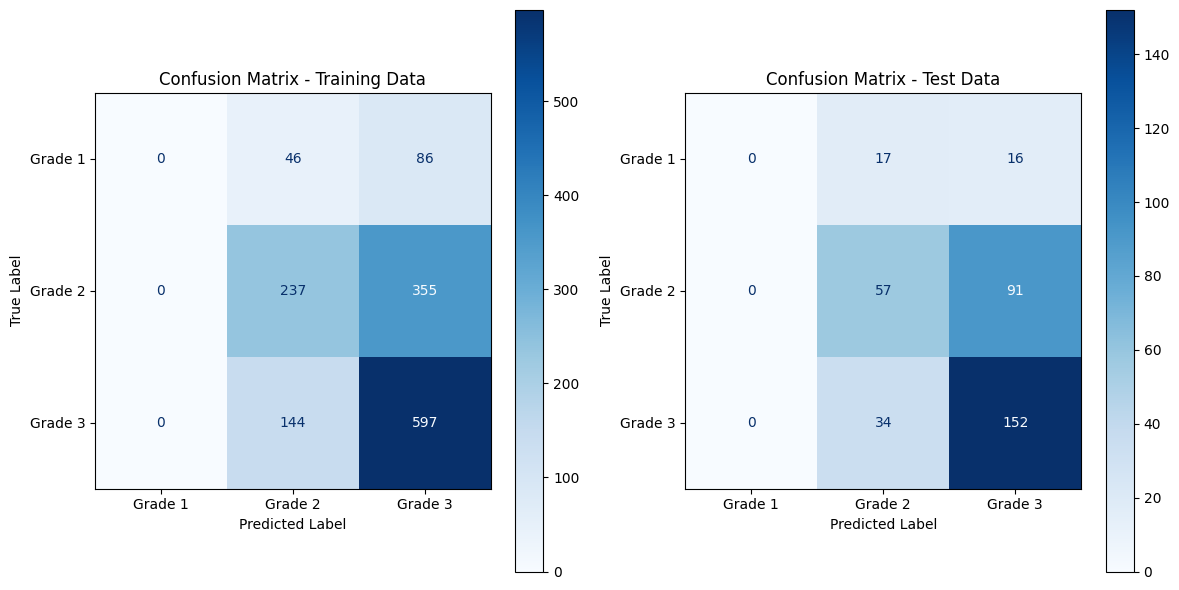

In [156]:
# Get predictions for both training and test data
y_pred_train = np.argmax(transformer.predict(X_train_scaled_transformer), axis=1)
y_pred_test = np.argmax(transformer.predict(X_test_scaled_transformer), axis=1)

# Calculate confusion matrices for training and test data
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Define class labels
class_labels = ['Grade 1', 'Grade 2', 'Grade 3']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_labels)
disp_train.plot(cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Label')
axs[0].set_ylabel('True Label')
axs[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=class_labels)
disp_test.plot(cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Label')
axs[1].set_ylabel('True Label')
axs[1].set_title('Confusion Matrix - Test Data')

plt.tight_layout()
plt.show()


Los resultados de las matrices de confusión para el conjunto de entrenamiento y prueba revelan algunas tendencias importantes en el rendimiento del modelo Transformer. En el conjunto de entrenamiento, se observa que el modelo tiene dificultades significativas para distinguir entre las clases 1 y 2, con una cantidad notable de muestras clasificadas erróneamente en ambas direcciones. Esto se refleja en la alta cantidad de falsos positivos y falsos negativos en estas clases. Por otro lado, en el conjunto de prueba, aunque se observa una mejora en la capacidad del modelo para distinguir entre las clases 1 y 2 en comparación con el conjunto de entrenamiento, todavía se cometen una cantidad significativa de errores de clasificación. Además, se observa una dificultad similar en la clasificación de la clase 3, con un número notable de falsos positivos y falsos negativos. Estos resultados sugieren que el modelo podría estar sufriendo de sobreajuste en el conjunto de entrenamiento y aún no logra generalizar bien en datos no vistos

#### Genes más relevantes por grado histológico:

En este caso también, para calcular los genes más importantes para la clasificación de los tres grados histológicos utilizando un modelo Transformer se ha utilizado un enfoque que se basa en la ponderación de los coeficientes en la última capa densa del modelo. 
Primero, se han obtenido los pesos de la última capa densa del modelo Transformer, que representan la importancia de cada gen en la clasificación final. Luego, se ha calculado la importancia de los coeficientes para cada clase (grado histológico) mediante la iteración sobre los índices de los genes relevantes y las clases correspondientes. Estos coeficientes se ordenan en función de su importancia, y finalmente se muestran los 10 genes más relevantes para cada grado histológico junto con sus respectivas importancias de coeficientes.

#### Comparativa de modelos

Analizando los resultados obtenidos para los diferentes modelos, se observa una variabilidad significativa en el desempeño. El modelo CNN logró una precisión de entrenamiento de 84.51% y una precisión de prueba de 63.22%. Aunque el modelo muestra una buena capacidad para aprender durante el entrenamiento, su desempeño en el conjunto de prueba indica un posible sobreajuste. 
El modelo RNN, con una precisión de entrenamiento de 69.76% y una precisión de prueba de 65.67%, muestra un rendimiento más consistente entre los conjuntos de datos de entrenamiento y prueba, aunque su precisión general es más baja en comparación con el CNN.

El modelo Multimodal destaca notablemente con una precisión de entrenamiento muy alta de 99.39% y una precisión de prueba igualmente impresionante de 95.91%. Este modelo parece ser el más eficaz, capturando adecuadamente tanto las características genéticas como clínicas de los datos. Sin embargo, la elevada precisión de entrenamiento podría sugerir un ligero sobreajuste, aunque menos pronunciado dado su alto rendimiento en el conjunto de prueba.

En contraste, el modelo Transformer muestra la precisión más baja, con un 55.70% en entrenamiento y un 58.04% en prueba. Estos resultados indican que el modelo Transformer puede no haber capturado adecuadamente las características de los datos en comparación con los otros modelos.

En resumen, el modelo Multimodal ofrece el mejor rendimiento general y parece ser el más adecuado para la tarea, mientras que el CNN y el RNN presentan problemas de sobreajuste y el Transformer no logra un desempeño competitivo. Esto sugiere que la combinación de características genéticas y clínicas, como en el modelo Multimodal, proporciona una ventaja significativa en la precisión de clasificación.

In [157]:
accuracy_train = [train_accuracy_cnn, train_accuracy_rnn, accuracy_train_mm, train_accuracy]
accuracy_test = [test_accuracy_cnn, test_accuracy_rnn, accuracy_mm, test_accuracy]

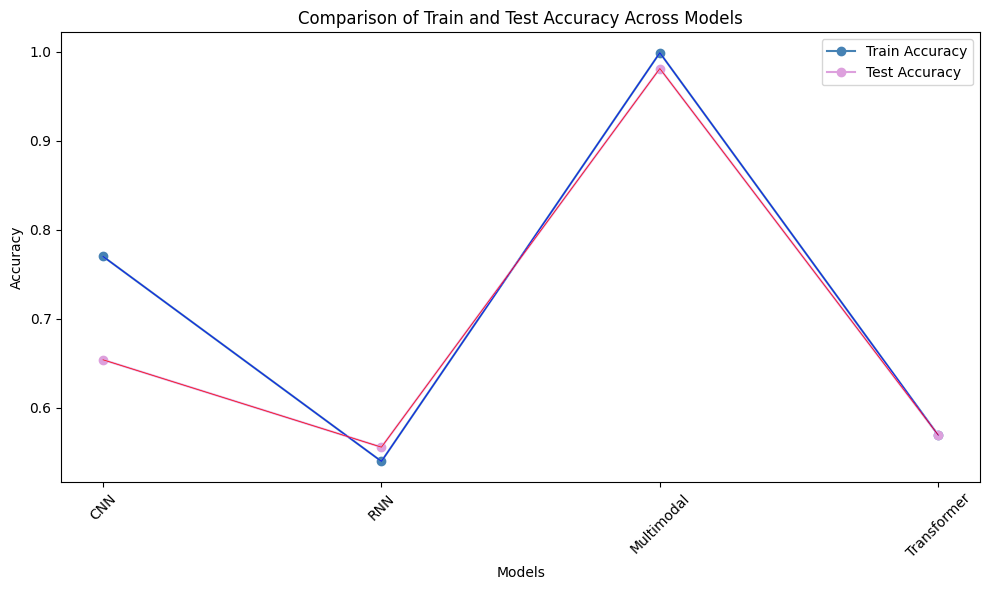

In [158]:
models = ['CNN', 'RNN', 'Multimodal', 'Transformer']
accuracy_train = [train_accuracy_cnn, train_accuracy_rnn, accuracy_train_mm, train_accuracy]
accuracy_test = [test_accuracy_cnn, test_accuracy_rnn, accuracy_mm, test_accuracy]

plt.figure(figsize=(10, 6))

plt.plot(models, accuracy_train, marker='o', color='steelblue', label='Train Accuracy')

plt.plot(models, accuracy_test, marker='o', color='plum', label='Test Accuracy')

plt.plot(models, accuracy_train, color='blue', linewidth=0.5)
plt.plot(models, accuracy_test, color='red', linewidth=0.5)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracy Across Models')
plt.legend()

plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [159]:
# Print the model names and their accuracies
for i in range(len(models)):
    print(f"Model: {models[i]}")
    print(f"Train Accuracy: {accuracy_train[i]}")
    print(f"Test Accuracy: {accuracy_test[i]}\n")

Model: CNN
Train Accuracy: 0.7699658870697021
Test Accuracy: 0.6539509296417236

Model: RNN
Train Accuracy: 0.5399317145347595
Test Accuracy: 0.555858314037323

Model: Multimodal
Train Accuracy: 0.9986348152160645
Test Accuracy: 0.9809264540672302

Model: Transformer
Train Accuracy: 0.5692832469940186
Test Accuracy: 0.5694822669029236



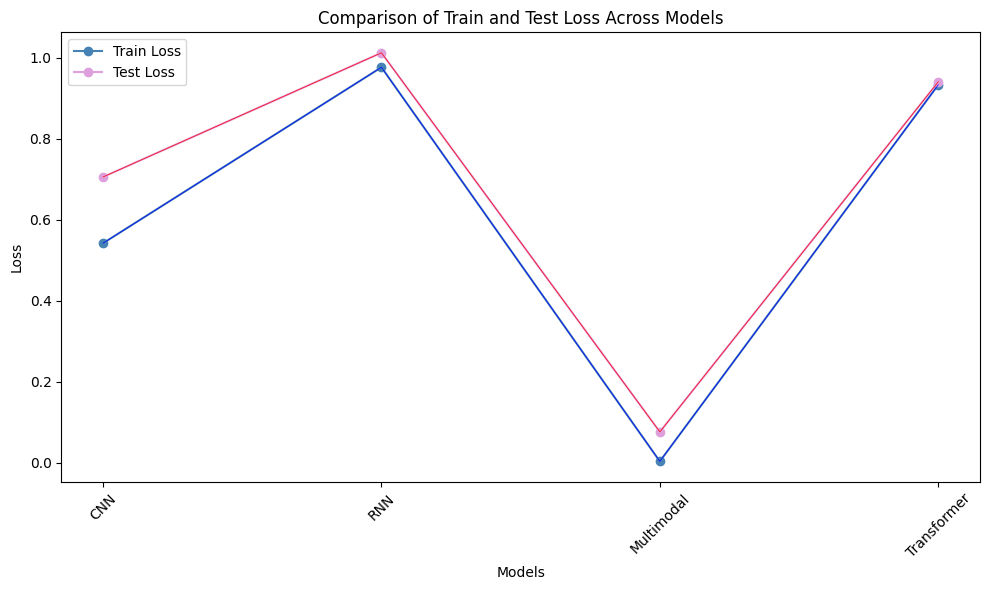

In [160]:
loss_train = [train_loss_cnn, train_loss_rnn, loss_train_mm, train_loss]
loss_test = [test_loss_cnn, test_loss_rnn, loss_mm, test_loss]

plt.figure(figsize=(10, 6))

plt.plot(models, loss_train, marker='o', color='steelblue', label='Train Loss')
plt.plot(models, loss_test, marker='o', color='plum', label='Test Loss')

plt.plot(models, loss_train, color='blue', linewidth=0.5)
plt.plot(models, loss_test, color='red', linewidth=0.5)

plt.xlabel('Models')
plt.ylabel('Loss')
plt.title('Comparison of Train and Test Loss Across Models')
plt.legend()

plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [161]:
# Print the model names and their accuracies
for i in range(len(models)):
    print(f"Model: {models[i]}")
    print(f"Train Loss: {loss_train[i]}")
    print(f"Test Loss: {loss_test[i]}\n")

Model: CNN
Train Loss: 0.541969895362854
Test Loss: 0.70562344789505

Model: RNN
Train Loss: 0.97660893201828
Test Loss: 1.012539029121399

Model: Multimodal
Train Loss: 0.003004038706421852
Test Loss: 0.07584098726511002

Model: Transformer
Train Loss: 0.9332082271575928
Test Loss: 0.9405567646026611



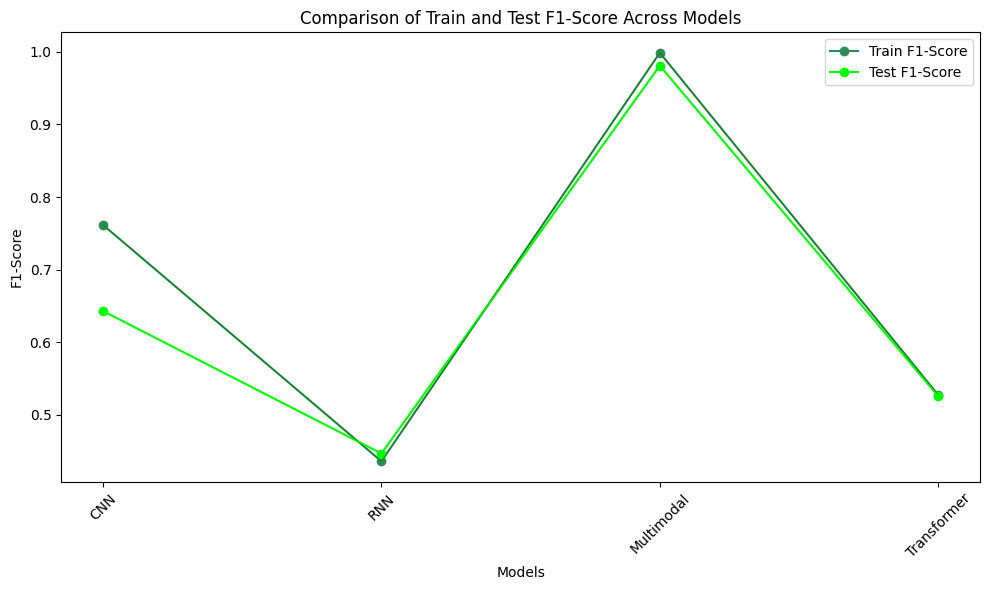

In [162]:
f1_scores_train = [f1_train_cnn, f1_train_rnn, f1_train_mm, f1_train]
f1_scores_test = [f1_test_cnn, f1_test_rnn, f1_test_mm, f1_test]

plt.figure(figsize=(10, 6))

plt.plot(models, f1_scores_train, marker='o', color='seagreen', label='Train F1-Score')
plt.plot(models, f1_scores_test, marker='o', color='lime', label='Test F1-Score')

plt.plot(models, f1_scores_train, color='green', linewidth=0.5)
plt.plot(models, f1_scores_test, color='lime', linewidth=0.5)

plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Comparison of Train and Test F1-Score Across Models')
plt.legend()

plt.grid(False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [163]:
# Print the model names and their accuracies
for i in range(len(models)):
    print(f"Model: {models[i]}")
    print(f"Train Loss: {f1_scores_train[i]}")
    print(f"Test Loss: {f1_scores_test[i]}\n")

Model: CNN
Train Loss: 0.7615332621615272
Test Loss: 0.6430370821918814

Model: RNN
Train Loss: 0.4360967692083645
Test Loss: 0.44690328744824653

Model: Multimodal
Train Loss: 0.9986348122866894
Test Loss: 0.9808634484828892

Model: Transformer
Train Loss: 0.5274457800622695
Test Loss: 0.5258076799436672

